<h1>BIT数据挖掘作业1—Trending YouTube Video Statistics<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据描述:" data-toc-modified-id="数据描述:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据描述:</a></span></li><li><span><a href="#加载数据" data-toc-modified-id="加载数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>加载数据</a></span></li><li><span><a href="#数据摘要" data-toc-modified-id="数据摘要-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数据摘要</a></span><ul class="toc-item"><li><span><a href="#标称属性" data-toc-modified-id="标称属性-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>标称属性</a></span></li><li><span><a href="#数值属性" data-toc-modified-id="数值属性-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>数值属性</a></span><ul class="toc-item"><li><span><a href="#同一国家间的数据属性摘要" data-toc-modified-id="同一国家间的数据属性摘要-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>同一国家间的数据属性摘要</a></span></li><li><span><a href="#不同国家间的数值属性比较" data-toc-modified-id="不同国家间的数值属性比较-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>不同国家间的数值属性比较</a></span></li></ul></li></ul></li><li><span><a href="#数据可视化" data-toc-modified-id="数据可视化-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>数据可视化</a></span><ul class="toc-item"><li><span><a href="#标称属性" data-toc-modified-id="标称属性-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>标称属性</a></span></li><li><span><a href="#数值属性" data-toc-modified-id="数值属性-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>数值属性</a></span></li></ul></li><li><span><a href="#数据缺失处理" data-toc-modified-id="数据缺失处理-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>数据缺失处理</a></span><ul class="toc-item"><li><span><a href="#数据缺失原因" data-toc-modified-id="数据缺失原因-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>数据缺失原因</a></span></li><li><span><a href="#将缺失部分剔除" data-toc-modified-id="将缺失部分剔除-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>将缺失部分剔除</a></span></li><li><span><a href="#利用title字段填充缺失的description字段" data-toc-modified-id="利用title字段填充缺失的description字段-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>利用title字段填充缺失的description字段</a></span></li></ul></li></ul></div>

## 数据描述:
>**video_id:** 视频ID
 **trending_date:** 视频上榜日期  
 **title:** 视频标题  
 **channel_title:** 所属频道标题  
 **category_id:** 分类ID  
 **publish_time:** 发布时间  
 **tags:** 标签  
 **views：** 观看次数  
 **likes：** 点赞次数  
 **dislikes：** 被踩次数  
 **comment_count:** 评论数
 **thumbnail_link:** 缩略图链接  
 **comments_disabled:** 评论是否关闭  
 **ratings_disabled:** 评分是否关闭  
 **video_error_or_removed:** 视频是否出错或被删除  
 **description:** 视频描述  

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
import scipy
import os
import copy
import matplotlib.pyplot as plt
import seaborn as sns

## 加载数据

In [2]:
# JP、KR、MX、RU数据集解码失败，因此暂不使用
def loadData(file_path):
    file_list = os.listdir(file_path)
    df_dict = {}
    name_list = []
    for file_name in file_list:
        path = os.path.join(file_path, file_name)
        df_dict[file_name[:-4]] = pd.read_csv(path, encoding="utf-8").drop_duplicates()
        name_list.append(file_name[:-4]) 
    return df_dict, name_list

In [3]:
file_path = 'D:/Dataset/Trending_YouTube_Video_Statistics'

video_dict, name_list = loadData(file_path)
file_num = len(name_list)

for i in range(file_num):
    print(f'{name_list[i]}:')
    print(video_dict[name_list[i]].dtypes)
    display(video_dict[name_list[i]].head(2))
    print(f'total length:{len(video_dict[name_list[i]])}')
    print('-' * 130)

CAvideos:
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...


total length:40881
----------------------------------------------------------------------------------------------------------------------------------
DEvideos:
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...


total length:40840
----------------------------------------------------------------------------------------------------------------------------------
FRvideos:
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...


total length:40724
----------------------------------------------------------------------------------------------------------------------------------
GBvideos:
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...


total length:38745
----------------------------------------------------------------------------------------------------------------------------------
INvideos:
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."


total length:33089
----------------------------------------------------------------------------------------------------------------------------------
USvideos:
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


total length:40901
----------------------------------------------------------------------------------------------------------------------------------


## 数据摘要

In [4]:
nominal_columns = ['video_id', 'trending_date', 'title', 'channel_title', 'category_id', 'publish_time', 'tags', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
numeric_columns = ['views', 'likes', 'dislikes', 'comment_count']

In [5]:
def calStaticalFeature(df, columns):
    df_desc = df[columns].describe()
    values = {}
    for column in columns:
        values.update({column:df[column].isnull().sum()})
    display(df_desc.append(pd.Series(values, name='NaN number')))
    
    
# 计算标称属性的取值频数
def calFrequency(df, columns, num):
    for column in columns:
        print(f"{column}的前{num}个取值频数：\n{df[column].value_counts()[:num]}")
        print('-' * 50)

### 标称属性

In [6]:
for i in range(file_num):
    print(f"在{name_list[i]}数据集中:")
    calFrequency(video_dict[name_list[i]], nominal_columns, 5)
    print('*' * 130)

在CAvideos数据集中:
video_id的前5个取值频数：
VYOjWnS4cMY    8
UceaB4D0jpo    8
6ZfuNTqbHE8    8
l_lblj8Cq0o    8
YBpdL9hSac4    7
Name: video_id, dtype: int64
--------------------------------------------------
trending_date的前5个取值频数：
18.25.05    200
17.13.12    200
18.01.03    200
17.27.11    200
18.20.03    200
Name: trending_date, dtype: int64
--------------------------------------------------
title的前5个取值频数：
Most Popular Violin Covers of Popular Songs 2018 || Best Instrumental Violin Covers 2018             15
Drake - God's Plan (Official Audio)                                                                  15
Bruno Mars,Charlie Puth,Ed Sheeran Best Christmas Songs,Greatest Hits Pop Playlist Christmas 2018    13
Deleted video                                                                                        11
Merry Christmas 2018 - Top Christmas Songs Playlist 2018 - Best Christmas Songs Ever                 10
Name: title, dtype: int64
--------------------------------------------------
ch

### 数值属性

#### 同一国家间的数据属性摘要

In [7]:
for i in range(file_num):
    print(f"在{name_list[i]}数据集中:")
    calStaticalFeature(video_dict[name_list[i]], numeric_columns)
    print('*' * 130)

在CAvideos数据集中:


,views,likes,dislikes,comment_count
count,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06
NaN number,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


**********************************************************************************************************************************
在DEvideos数据集中:


,views,likes,dislikes,comment_count
count,4.084000e+04,4.084000e+04,4.084000e+04,4.084000e+04
mean,6.034553e+05,2.187550e+04,1.397136e+03,2.785857e+03
std,2.348963e+06,1.018000e+05,1.457738e+04,1.745803e+04
min,5.180000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.706875e+04,5.330000e+02,2.900000e+01,7.900000e+01
50%,1.192770e+05,2.699000e+03,1.340000e+02,3.760000e+02
75%,4.431015e+05,1.179625e+04,5.320000e+02,1.376000e+03
max,1.138762e+08,4.924056e+06,1.470386e+06,1.084435e+06
NaN number,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


**********************************************************************************************************************************
在FRvideos数据集中:


,views,likes,dislikes,comment_count
count,4.072400e+04,4.072400e+04,4.072400e+04,4.072400e+04
mean,4.199219e+05,1.738886e+04,8.149624e+02,1.832453e+03
std,1.772130e+06,8.720509e+04,1.139219e+04,1.404321e+04
min,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.697450e+04,3.380000e+02,1.800000e+01,5.600000e+01
50%,7.372100e+04,1.892500e+03,8.300000e+01,2.350000e+02
75%,2.708088e+05,7.969500e+03,3.350000e+02,8.410000e+02
max,1.009116e+08,4.750254e+06,1.353661e+06,1.040912e+06
NaN number,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


**********************************************************************************************************************************
在GBvideos数据集中:


,views,likes,dislikes,comment_count
count,3.874500e+04,3.874500e+04,3.874500e+04,3.874500e+04
mean,5.911293e+06,1.344673e+05,7.605730e+03,1.308039e+04
std,1.901245e+07,3.498210e+05,5.104554e+04,5.069947e+04
min,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.509390e+05,5.882000e+03,2.000000e+02,6.770000e+02
50%,9.799490e+05,2.516800e+04,8.200000e+02,2.475000e+03
75%,3.675563e+06,1.140220e+05,3.354000e+03,9.223000e+03
max,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06
NaN number,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


**********************************************************************************************************************************
在INvideos数据集中:


,views,likes,dislikes,comment_count
count,3.308900e+04,3.308900e+04,3.308900e+04,33089.000000
mean,9.963425e+05,2.558762e+04,1.576535e+03,2524.777660
std,3.148111e+06,9.647320e+04,1.689573e+04,14769.825108
min,4.024000e+03,0.000000e+00,0.000000e+00,0.000000
25%,1.127190e+05,7.870000e+02,9.800000e+01,72.000000
50%,2.750270e+05,2.757000e+03,2.890000e+02,298.000000
75%,7.320220e+05,1.201100e+04,9.320000e+02,1169.000000
max,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000
NaN number,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


**********************************************************************************************************************************
在USvideos数据集中:


,views,likes,dislikes,comment_count
count,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04
mean,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03
std,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04
min,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02
50%,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03
75%,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03
max,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06
NaN number,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


**********************************************************************************************************************************


#### 不同国家间的数值属性比较

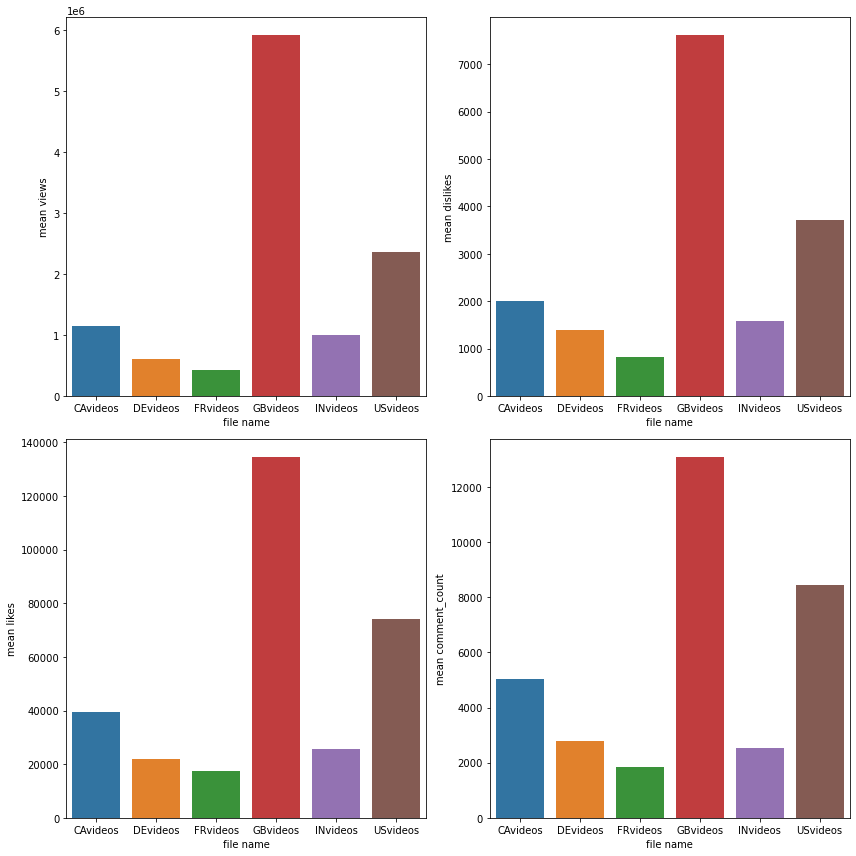

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
for idx, column in enumerate(numeric_columns):
    data_dict = {'file name': name_list}
    statstic_data = []
    for i in range(file_num):
        statstic_data.append(video_dict[name_list[i]][column].mean())
    data_dict.update({f'mean {column}':statstic_data})
    df = pd.DataFrame(data_dict)
    sns.barplot(x='file name', y=f'mean {column}', data=df, ax=ax[idx % 2, idx // 2] )

fig.tight_layout()

## 数据可视化

In [9]:
# 绘制数值属性的箱线图
def drawBoxplotForNumerical(df, columns, figsize=(15, 10)):
    for idx, column in enumerate(columns):
        plt.subplot(2, 2, idx + 1)
        df[column].plot.box(figsize=figsize)
        
# 绘制数值属性的直方图
def drawHistogramForNumerical(df, columns, figsize=(10, 15), bins=[200, 200, 200, 200]):
    col_num = len(columns)
    for idx, column in enumerate(columns):
        plt.subplot(2, 2, idx + 1)
        df[column].plot.hist(title=column, figsize=figsize, bins=bins[idx])

# 绘制标称属性条的形图
def drawPerColumnDistribution(df, columns, ncol=3, nrow=4, nums=10, figsize=(20, 50)):
    for idx, column in enumerate(columns):
        plt.subplot(nrow, ncol, idx + 1)
        df[column].value_counts()[: nums].plot.bar(title=column, figsize=figsize)

### 标称属性

在CAvideos数据集中:


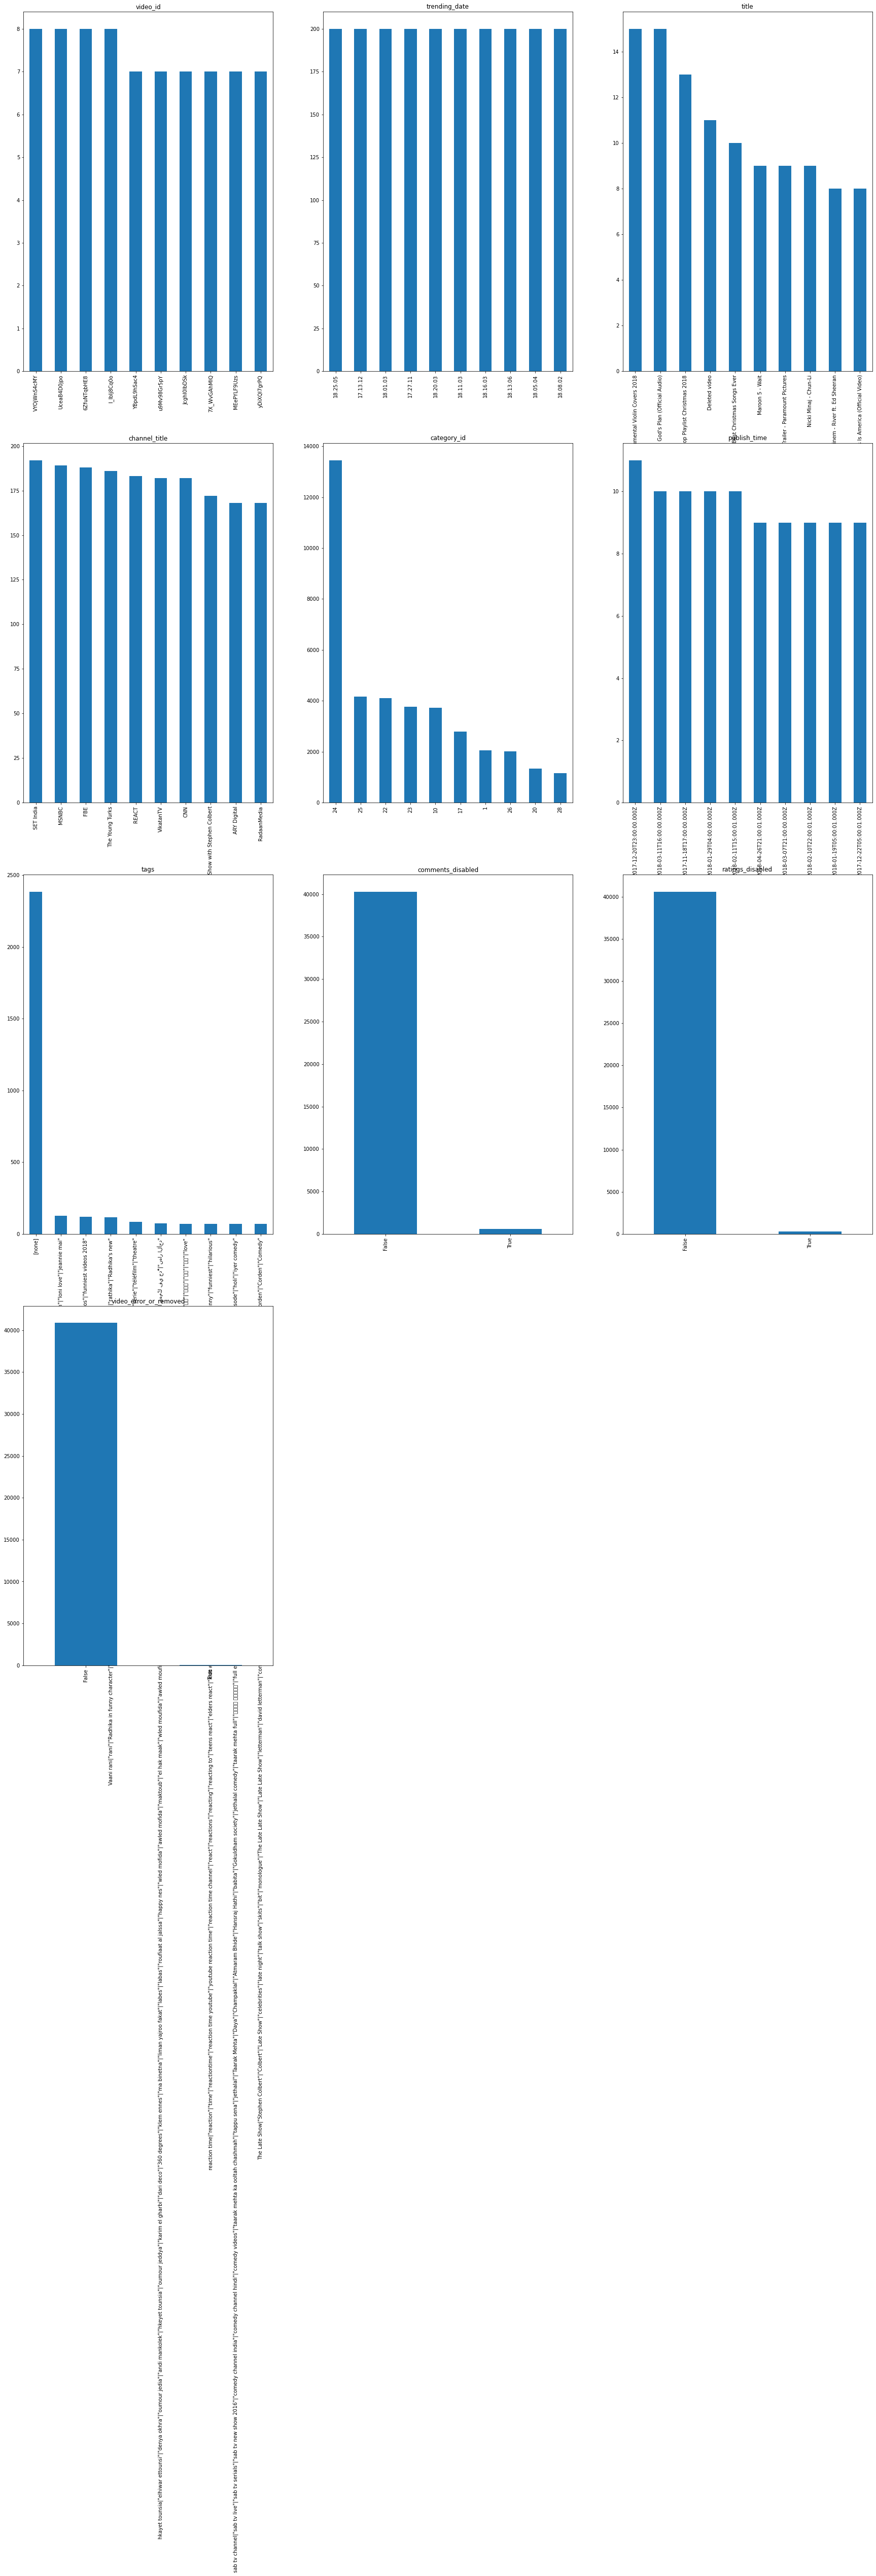

**********************************************************************************************************************************
在DEvideos数据集中:


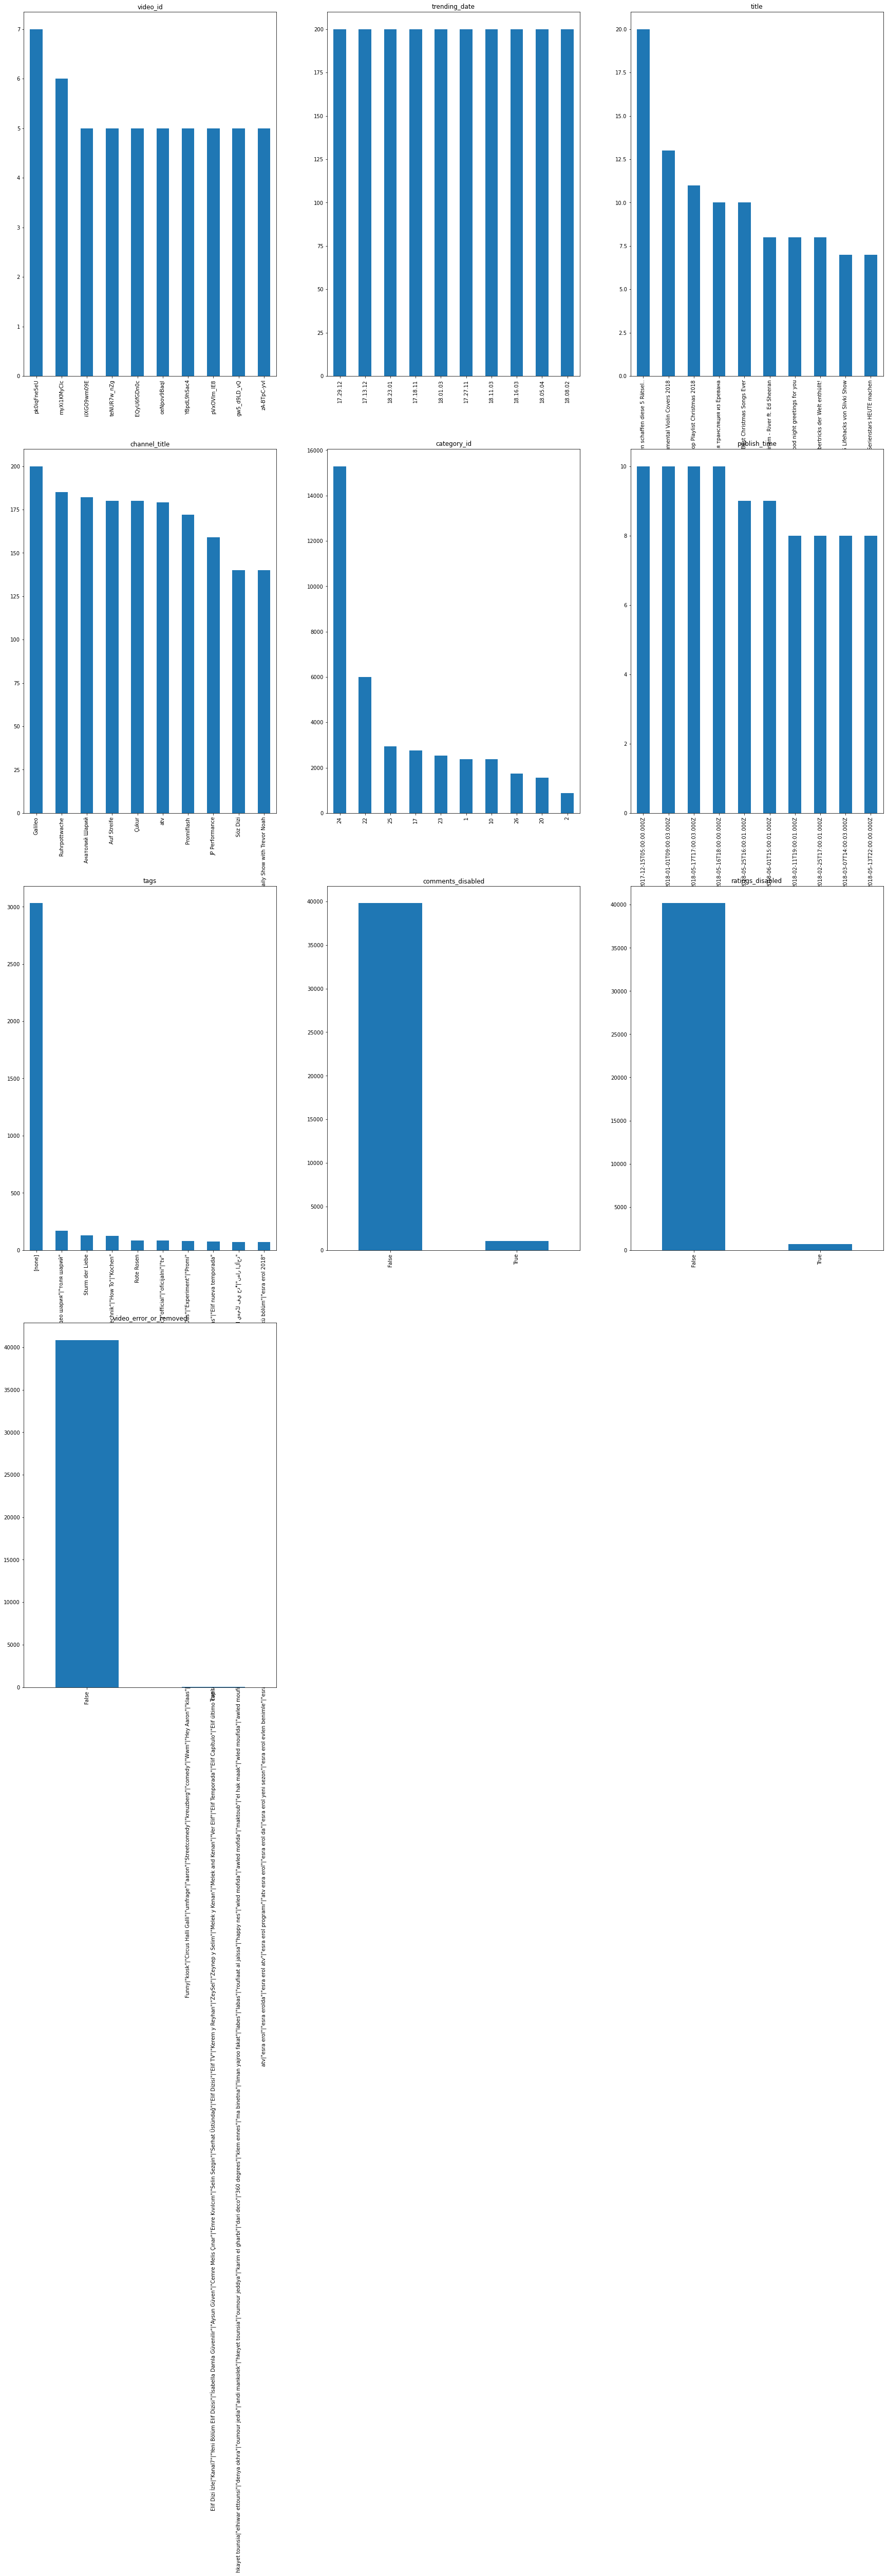

**********************************************************************************************************************************
在FRvideos数据集中:


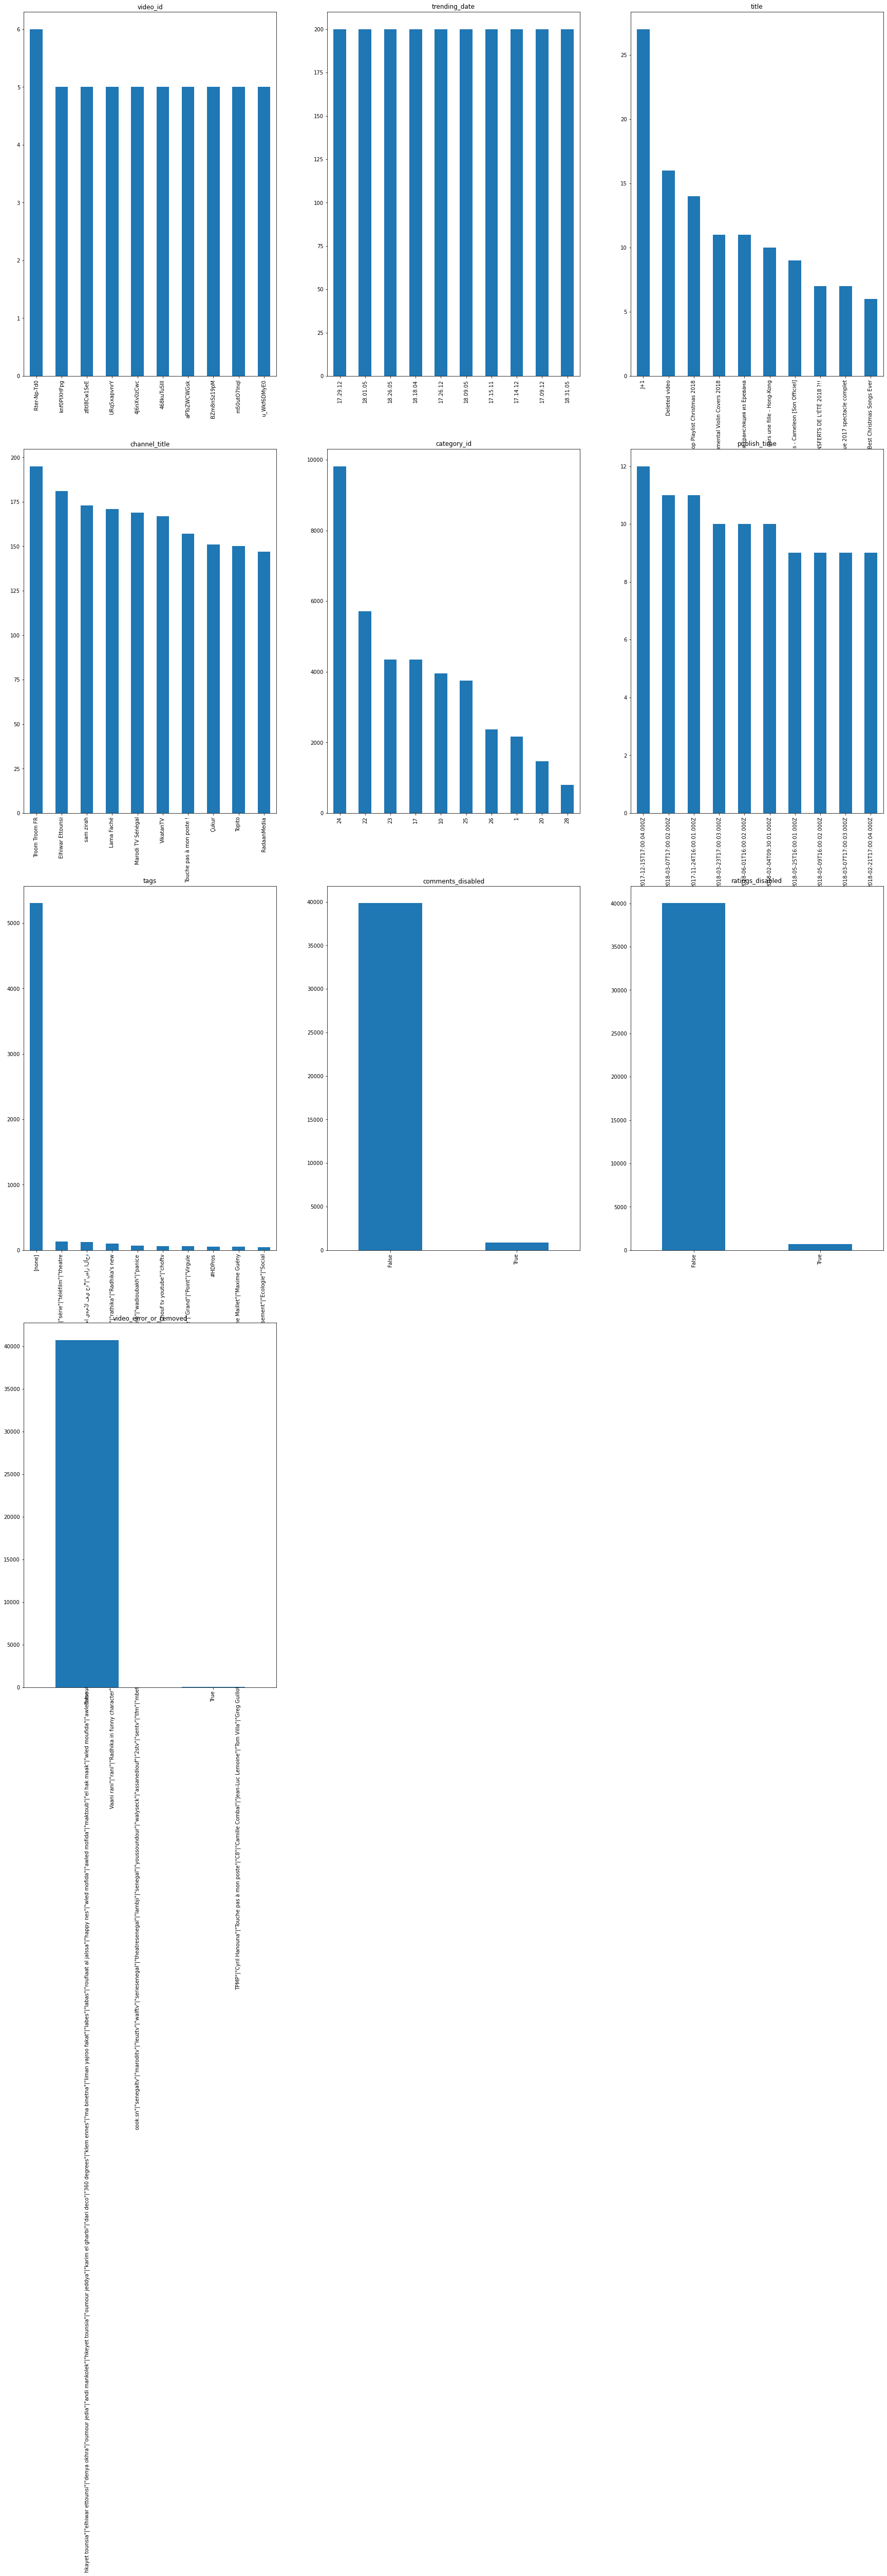

**********************************************************************************************************************************
在GBvideos数据集中:


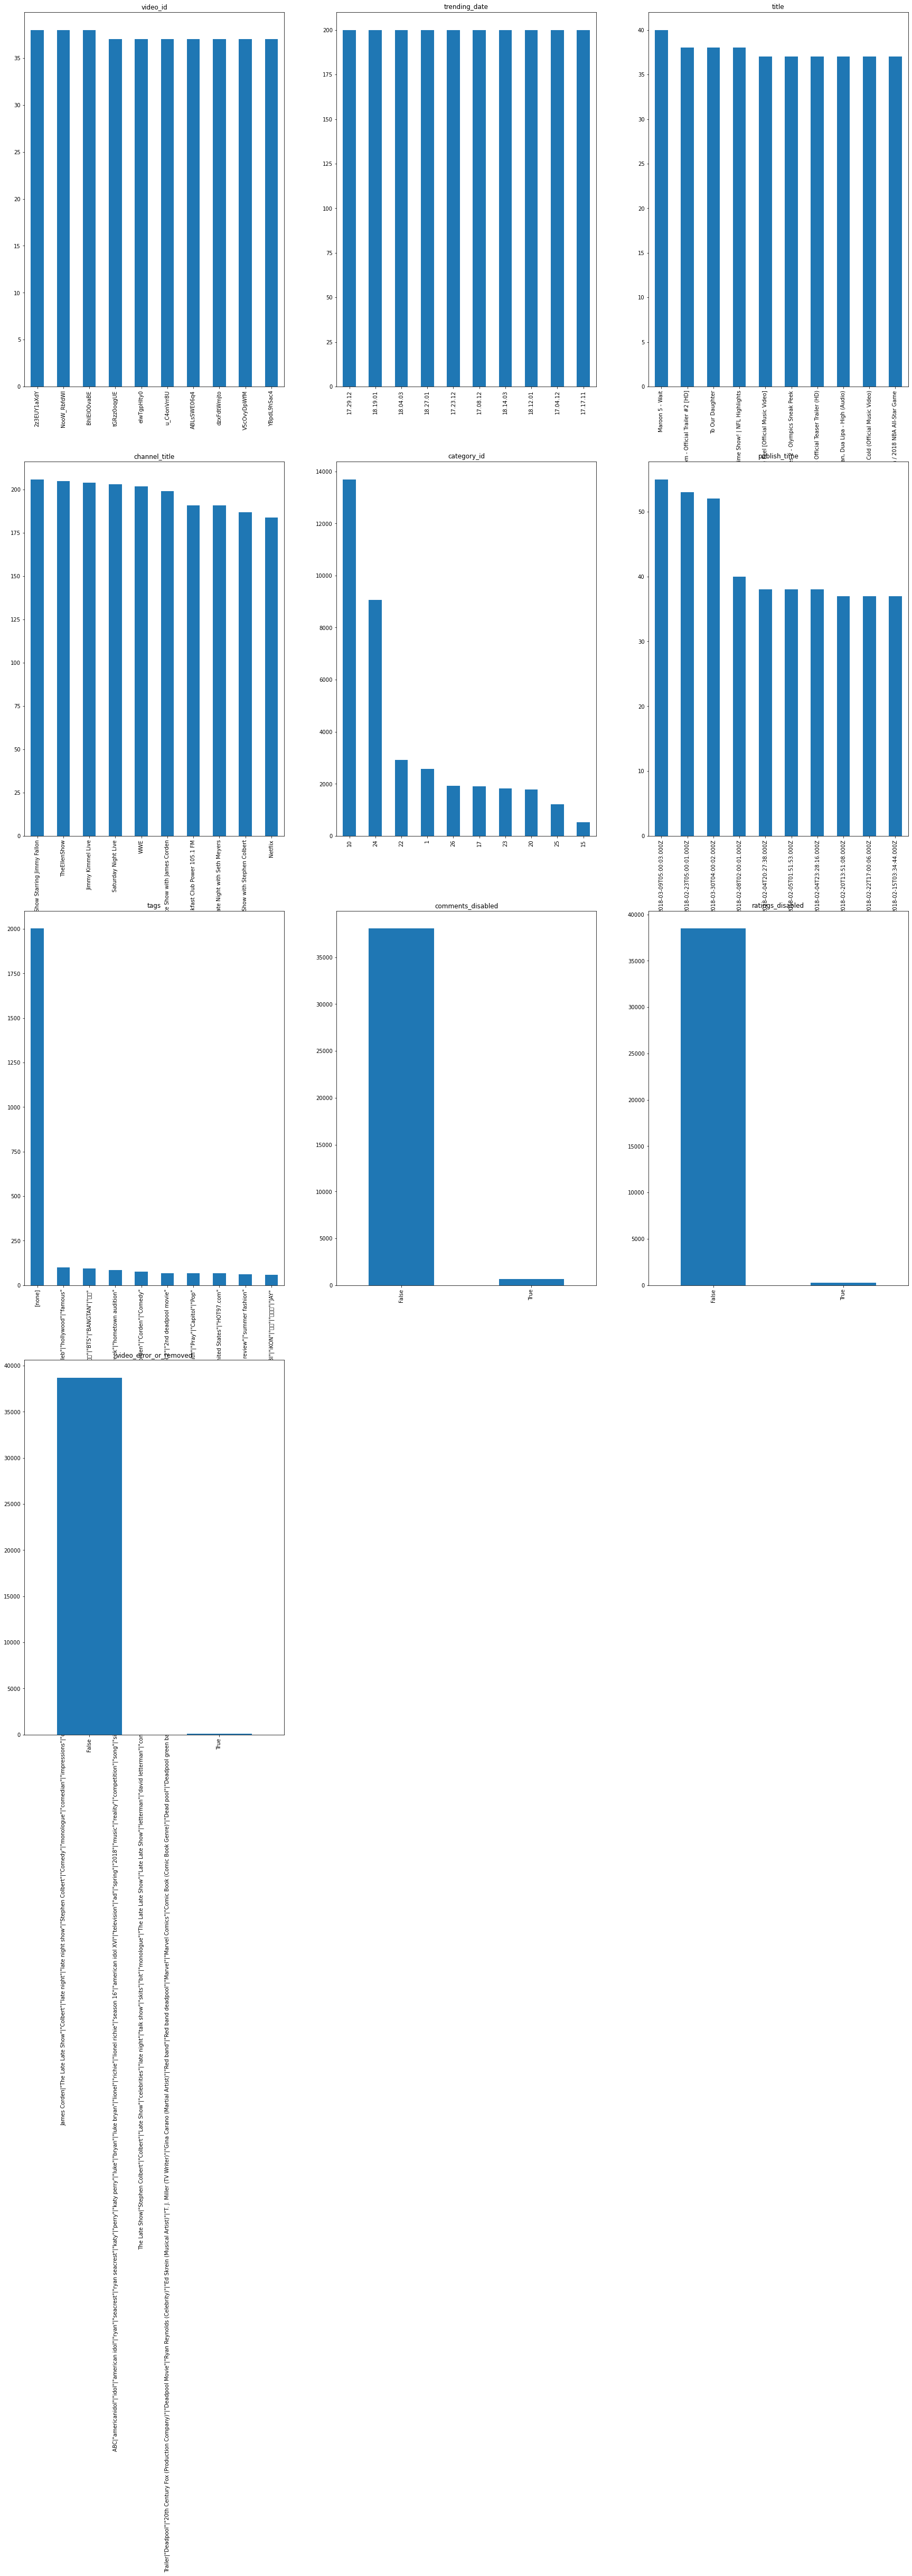

**********************************************************************************************************************************
在INvideos数据集中:


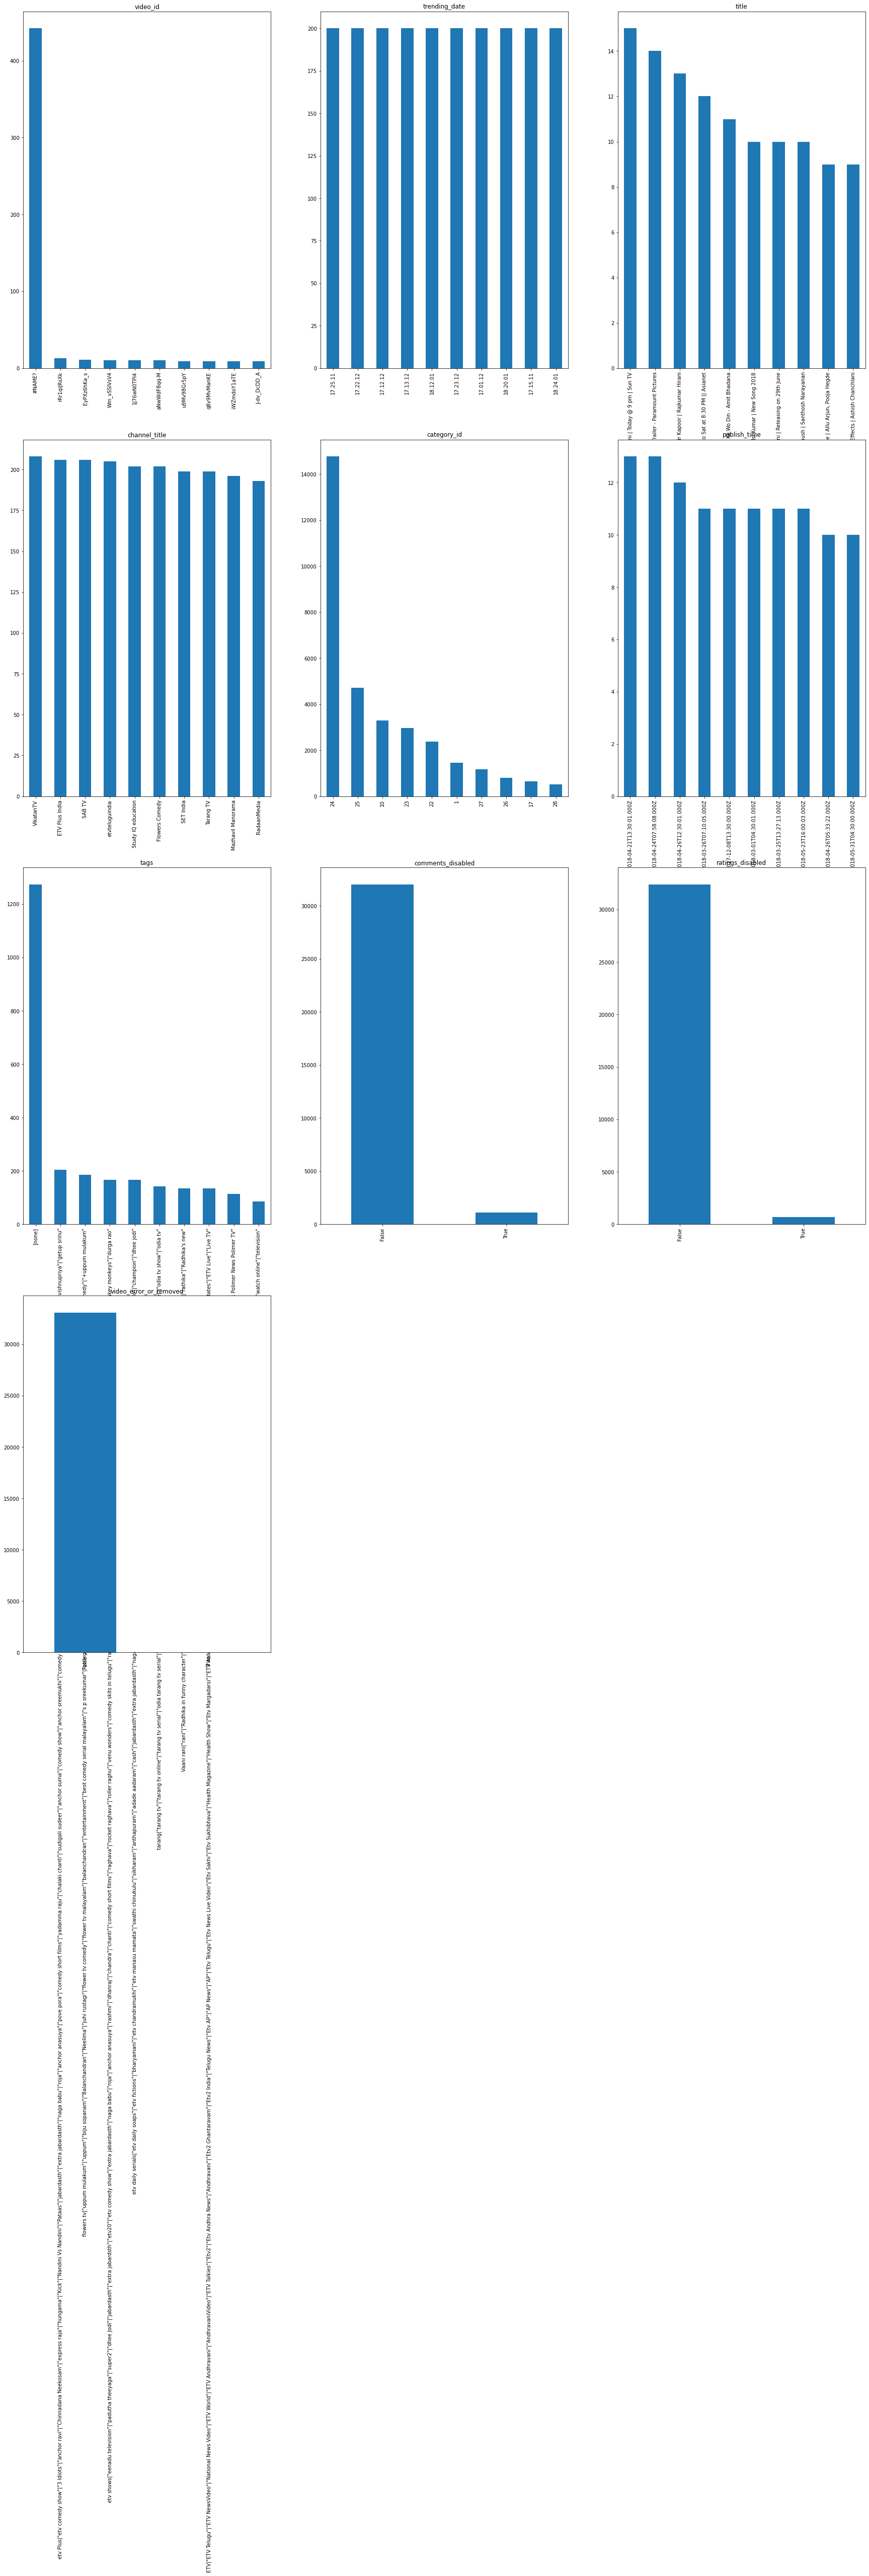

**********************************************************************************************************************************
在USvideos数据集中:


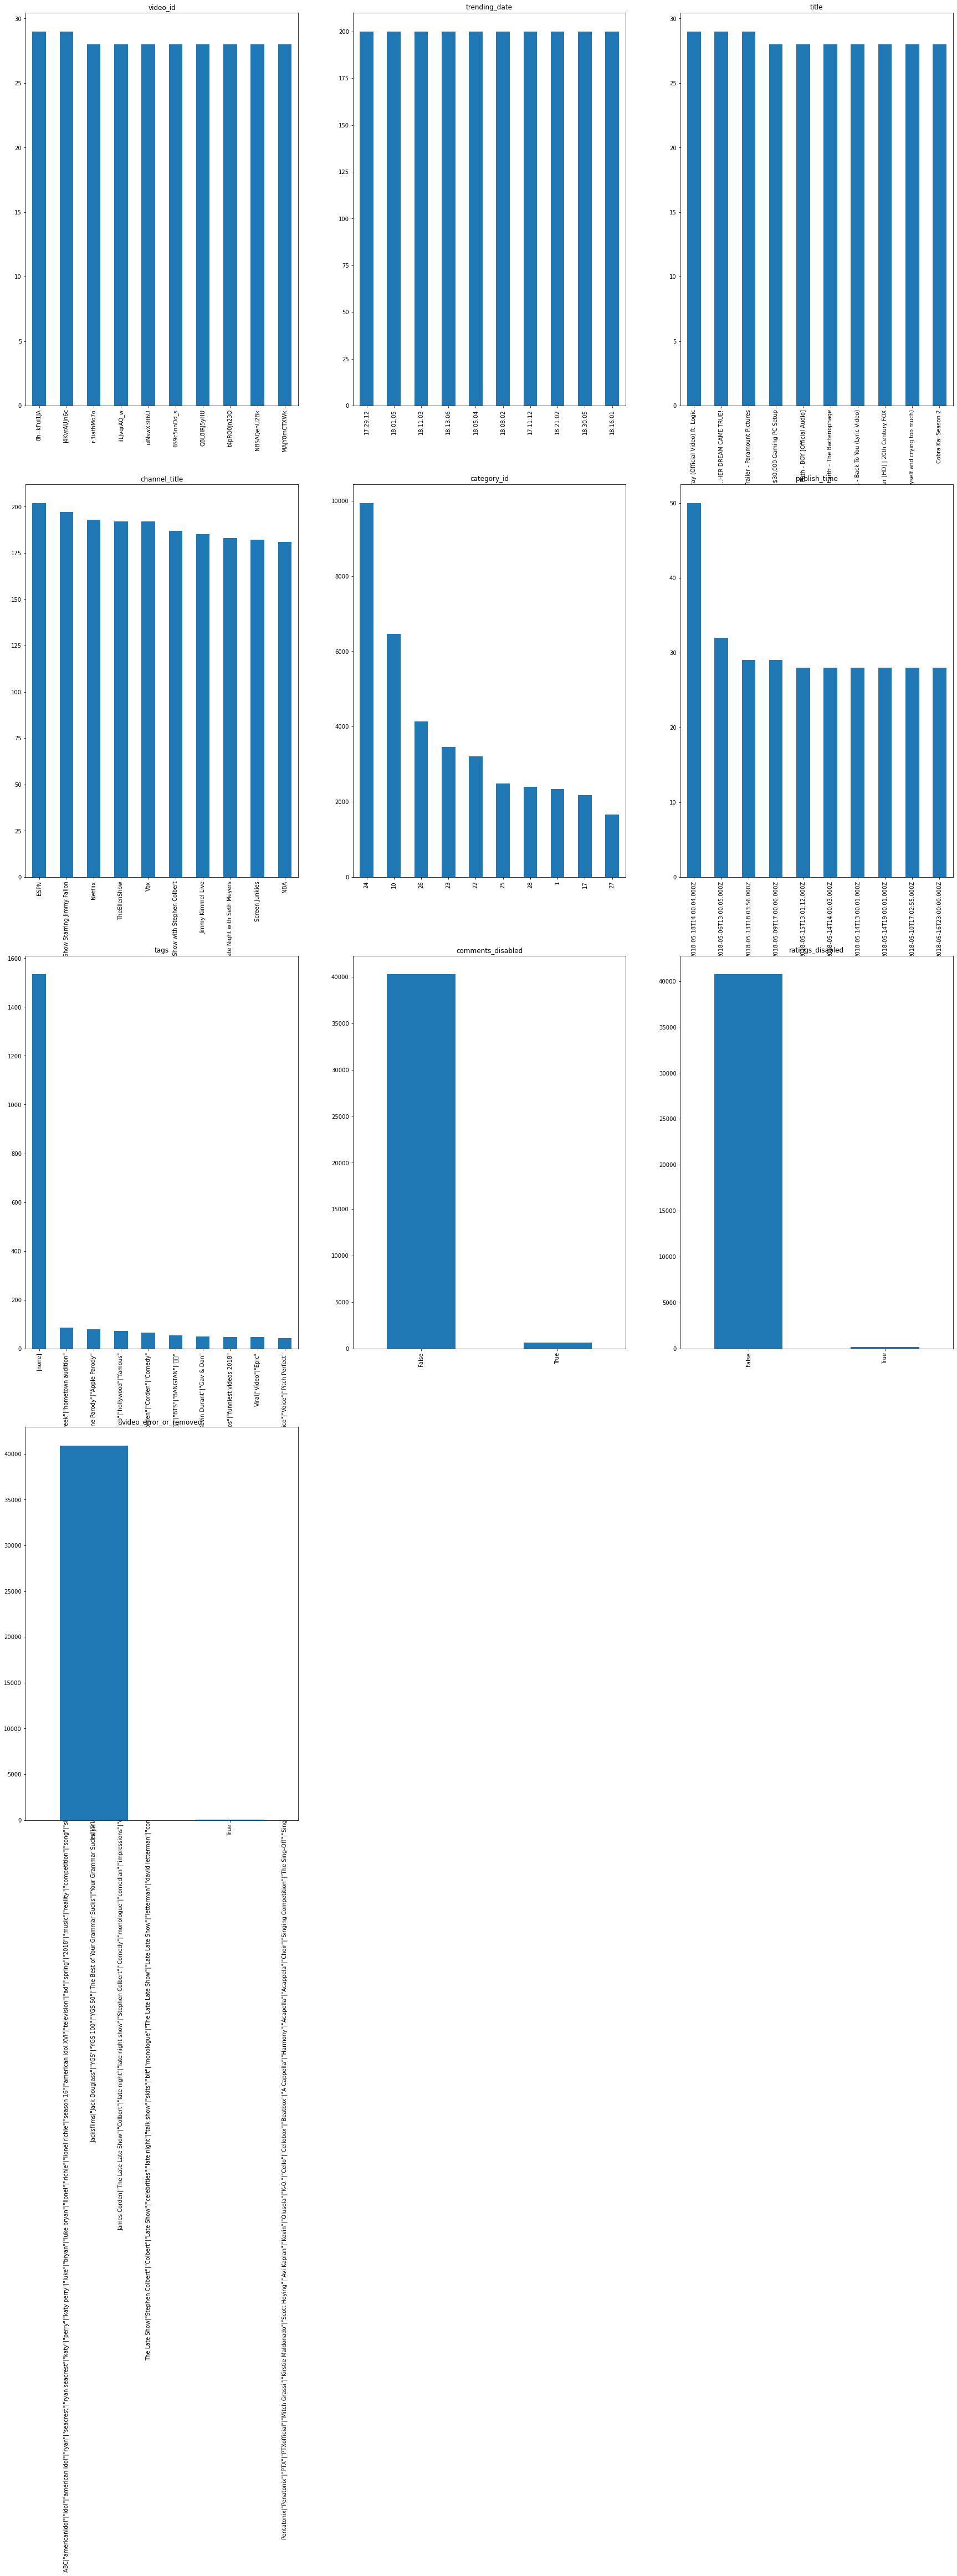

**********************************************************************************************************************************


In [10]:
for i in range(file_num):
    print(f"在{name_list[i]}数据集中:")
    drawPerColumnDistribution(video_dict[name_list[i]], nominal_columns, figsize=(30, 60))
    plt.show()
    print('*' * 130)

### 数值属性

在CAvideos数据集中:


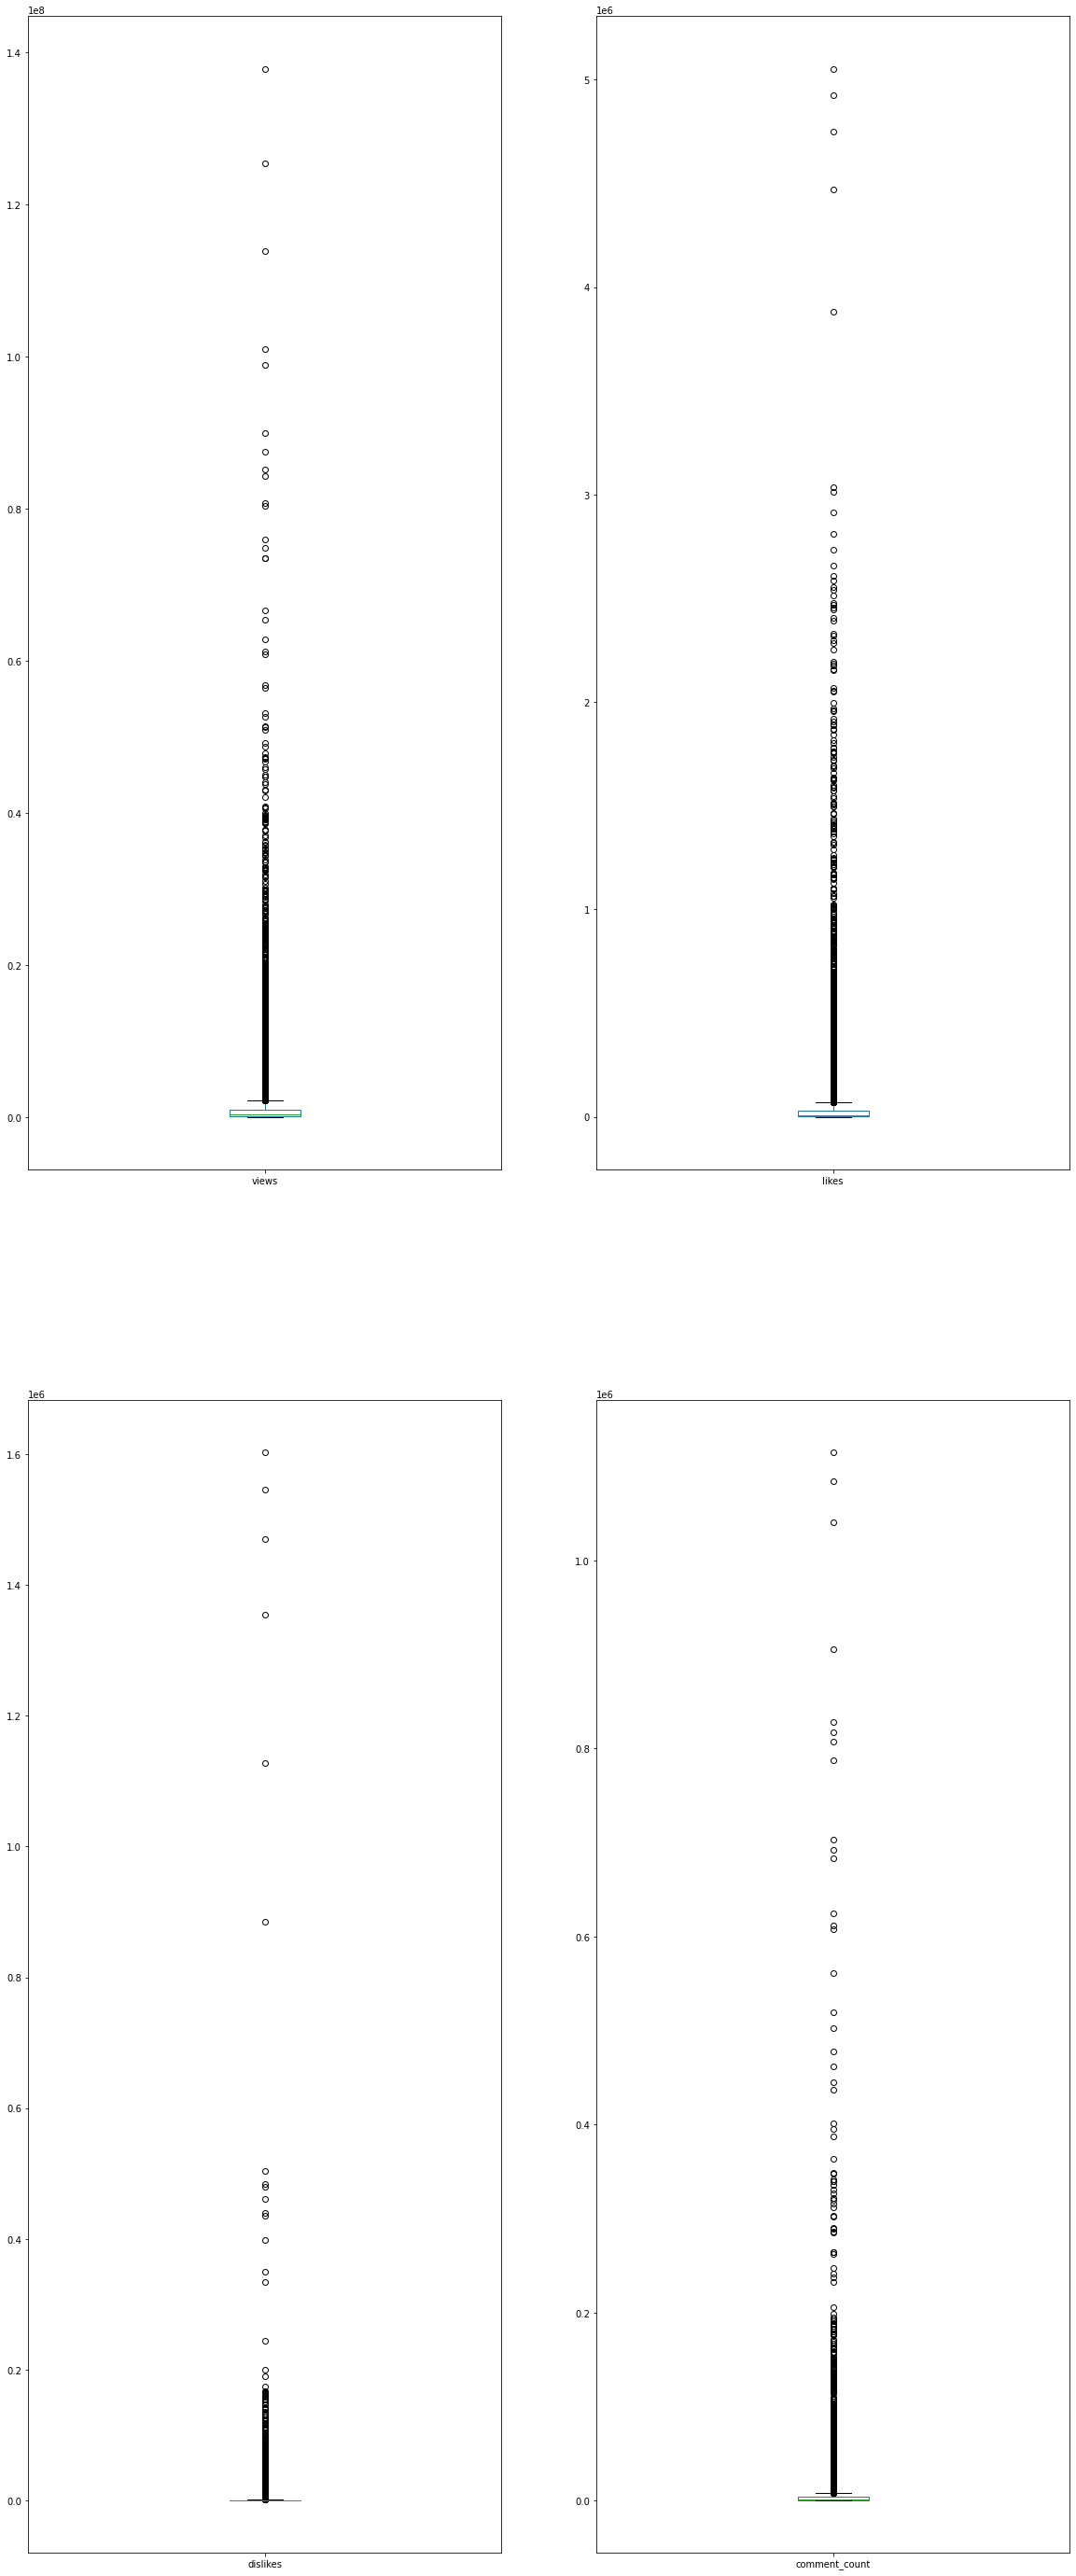

**********************************************************************************************************************************
在DEvideos数据集中:


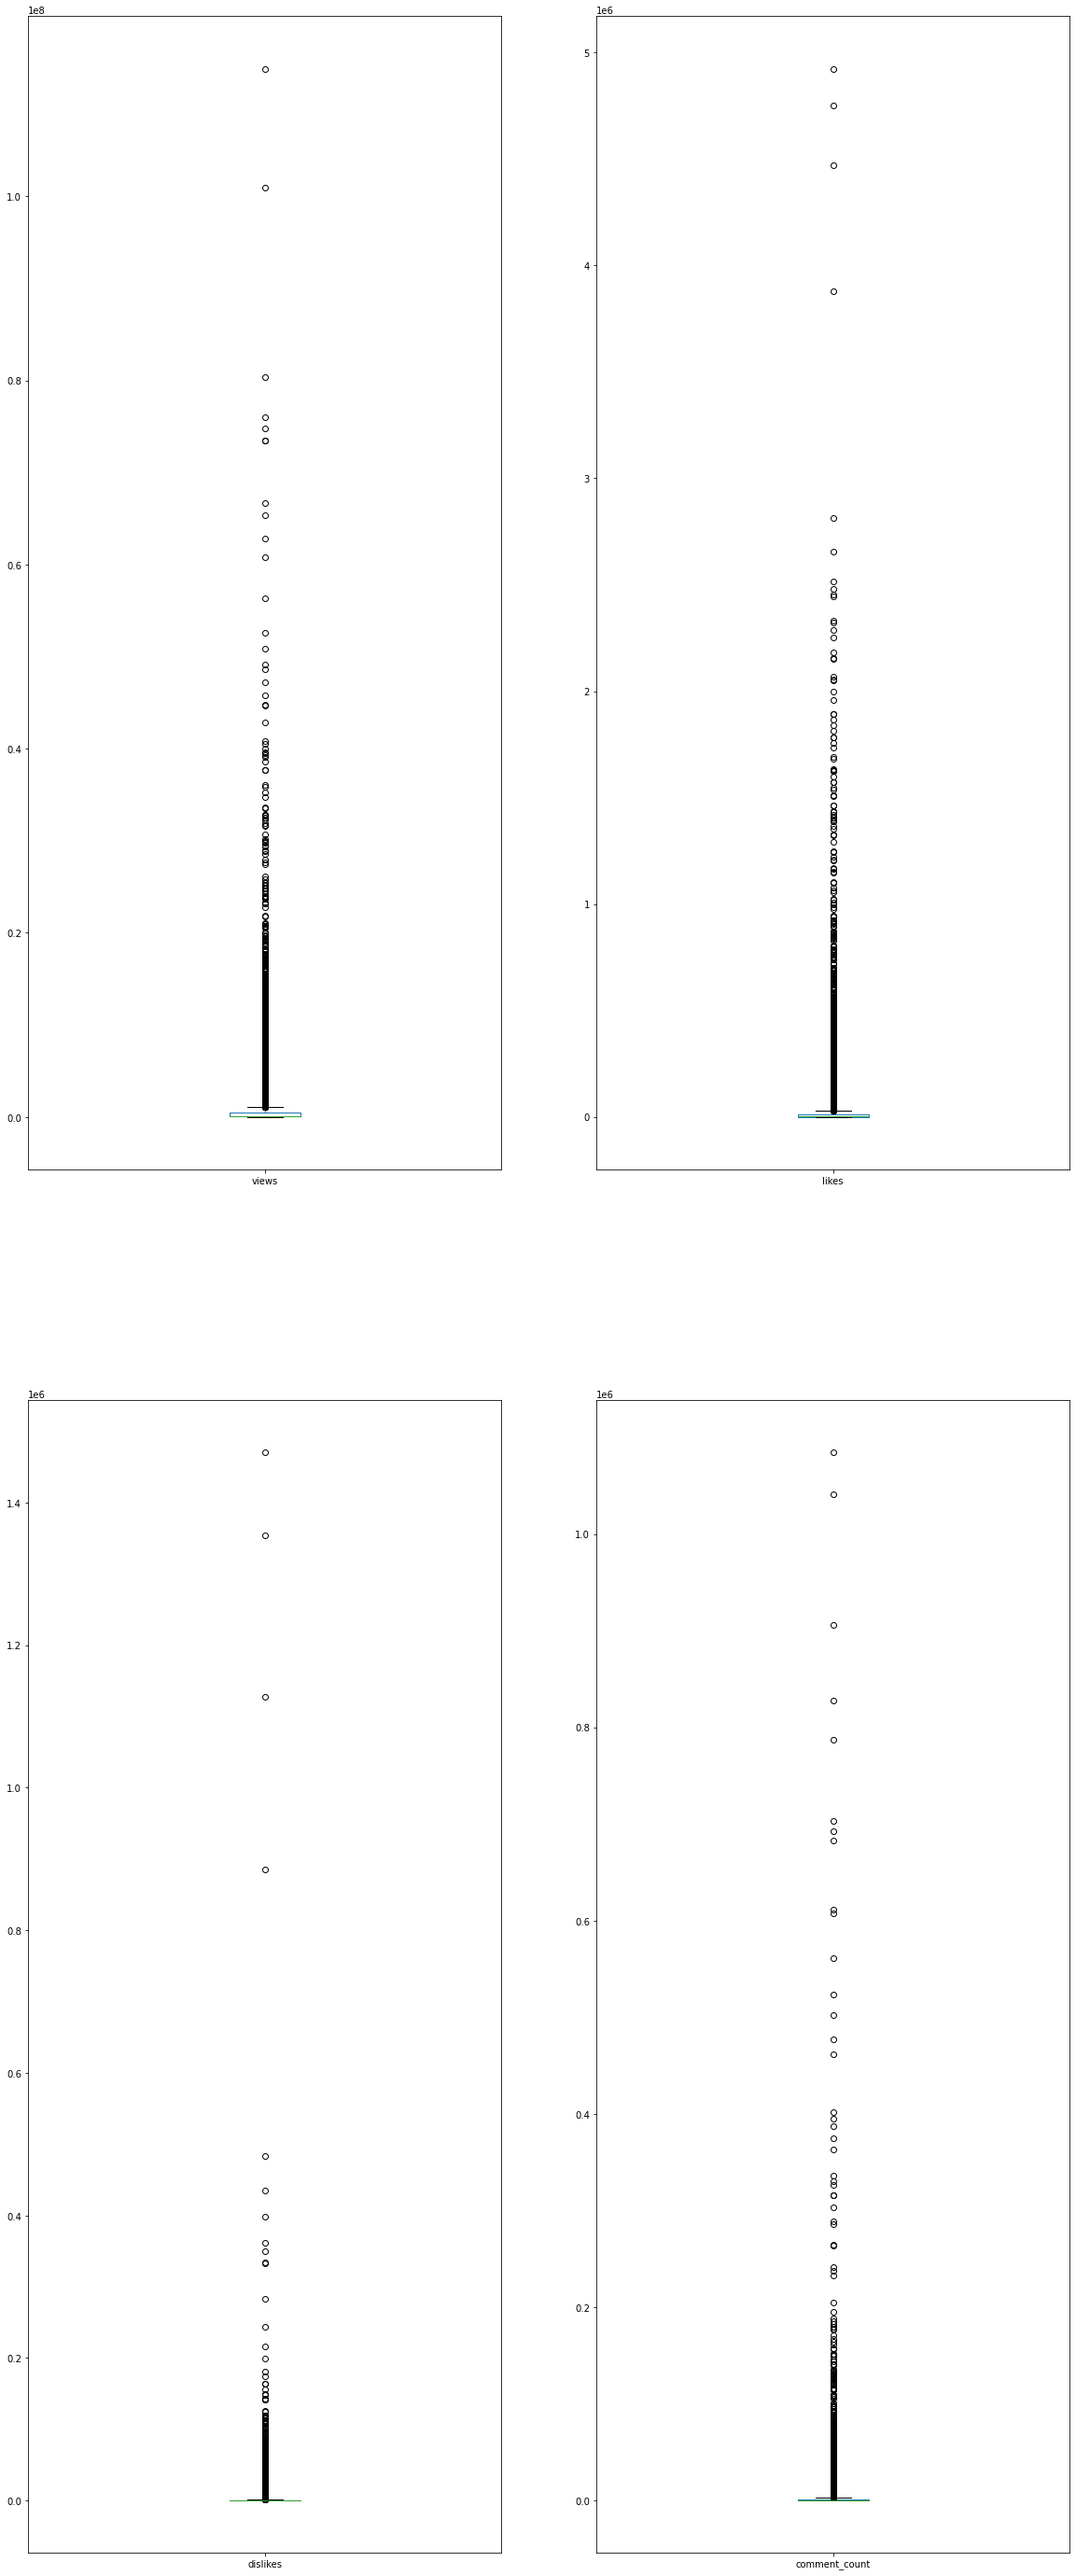

**********************************************************************************************************************************
在FRvideos数据集中:


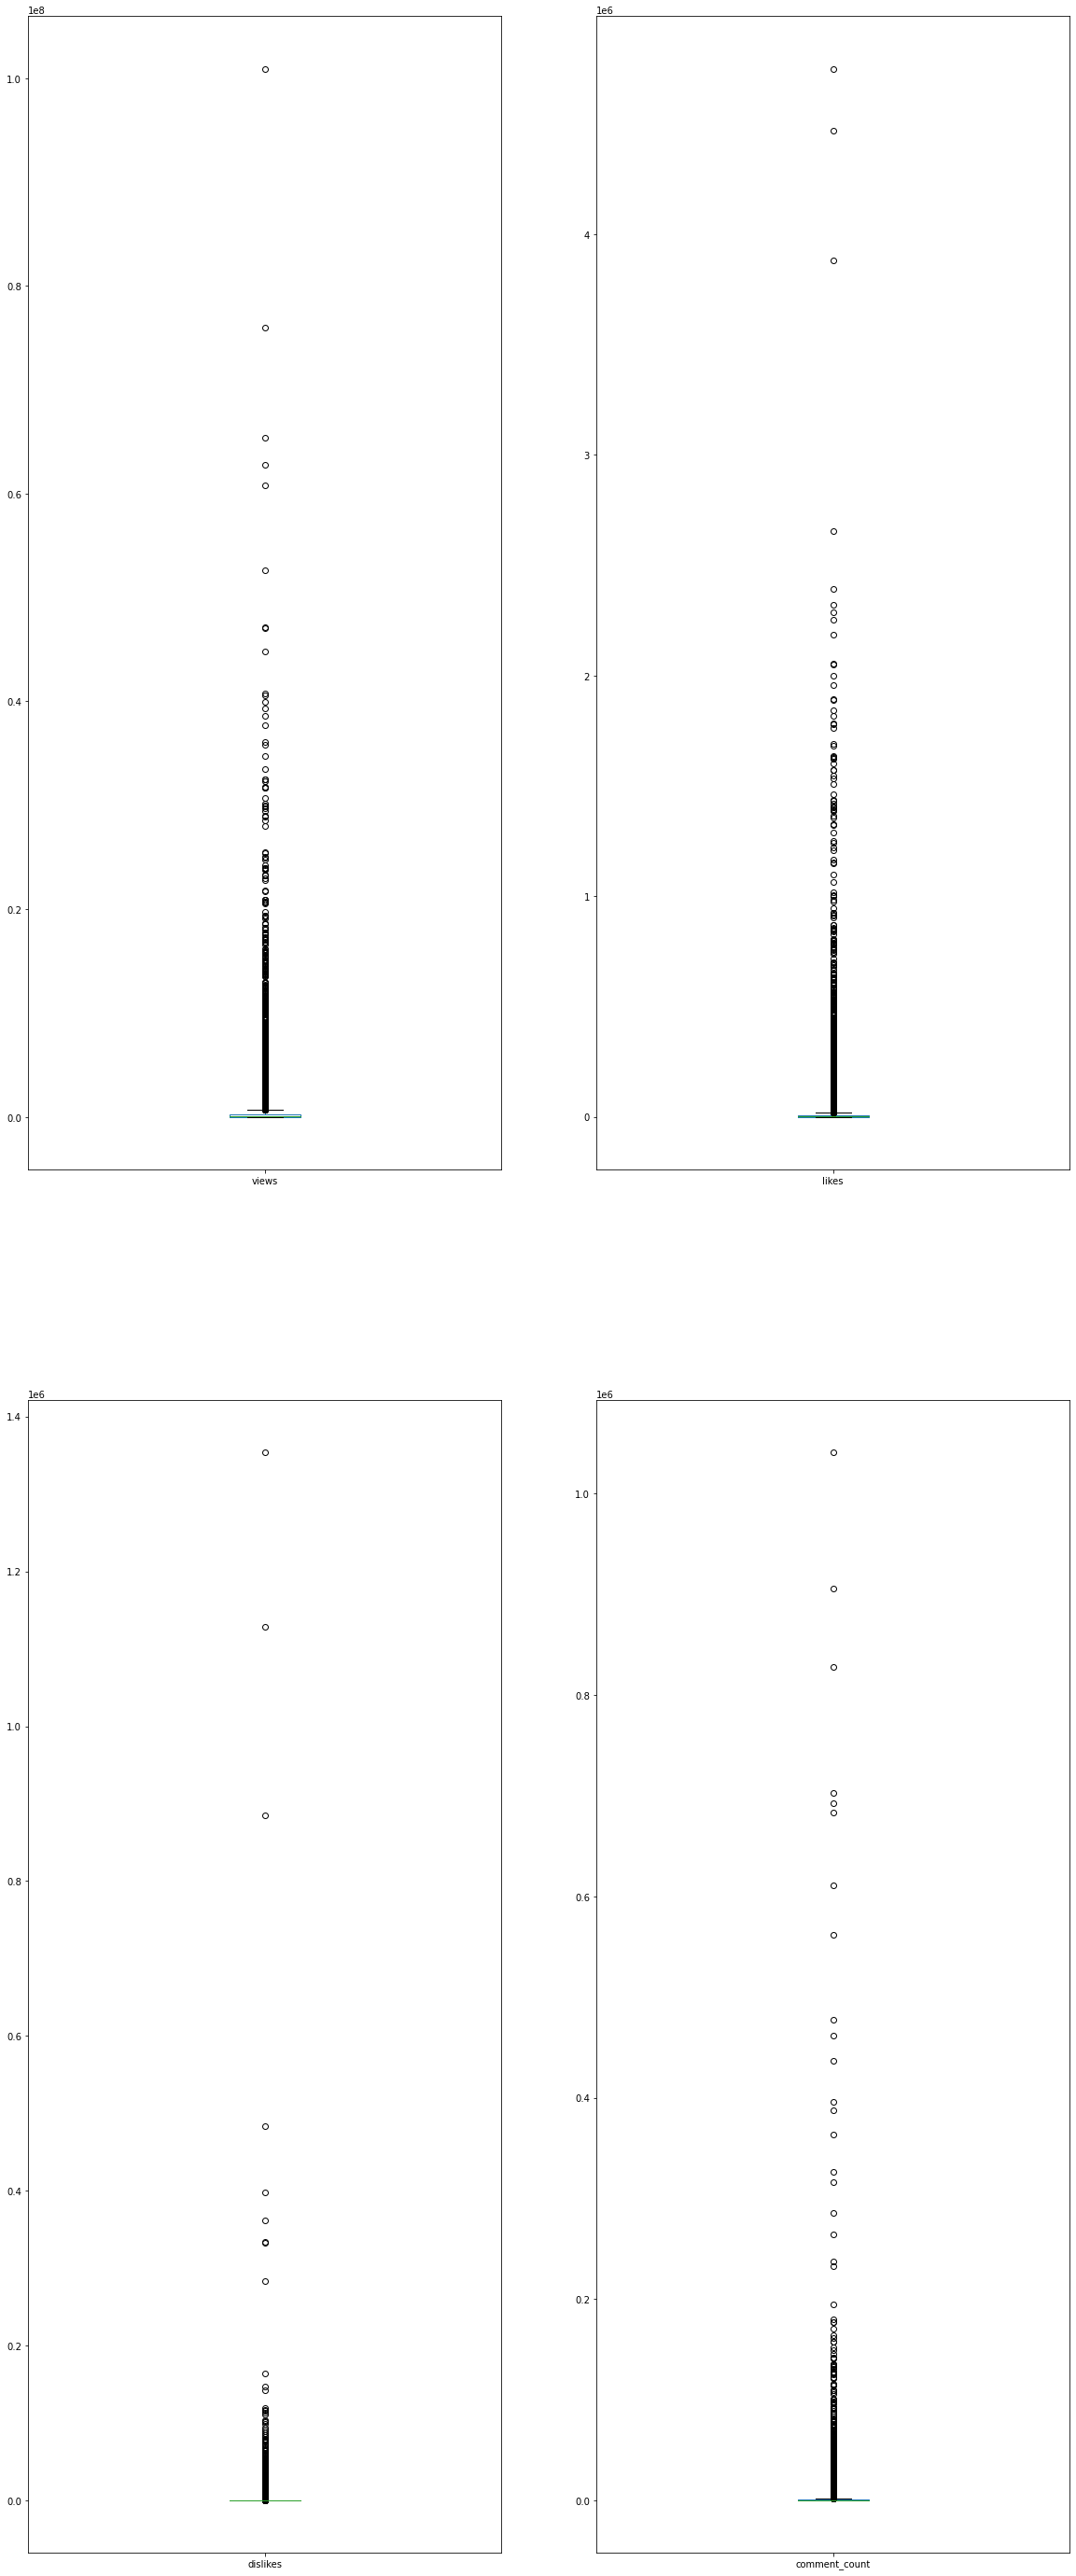

**********************************************************************************************************************************
在GBvideos数据集中:


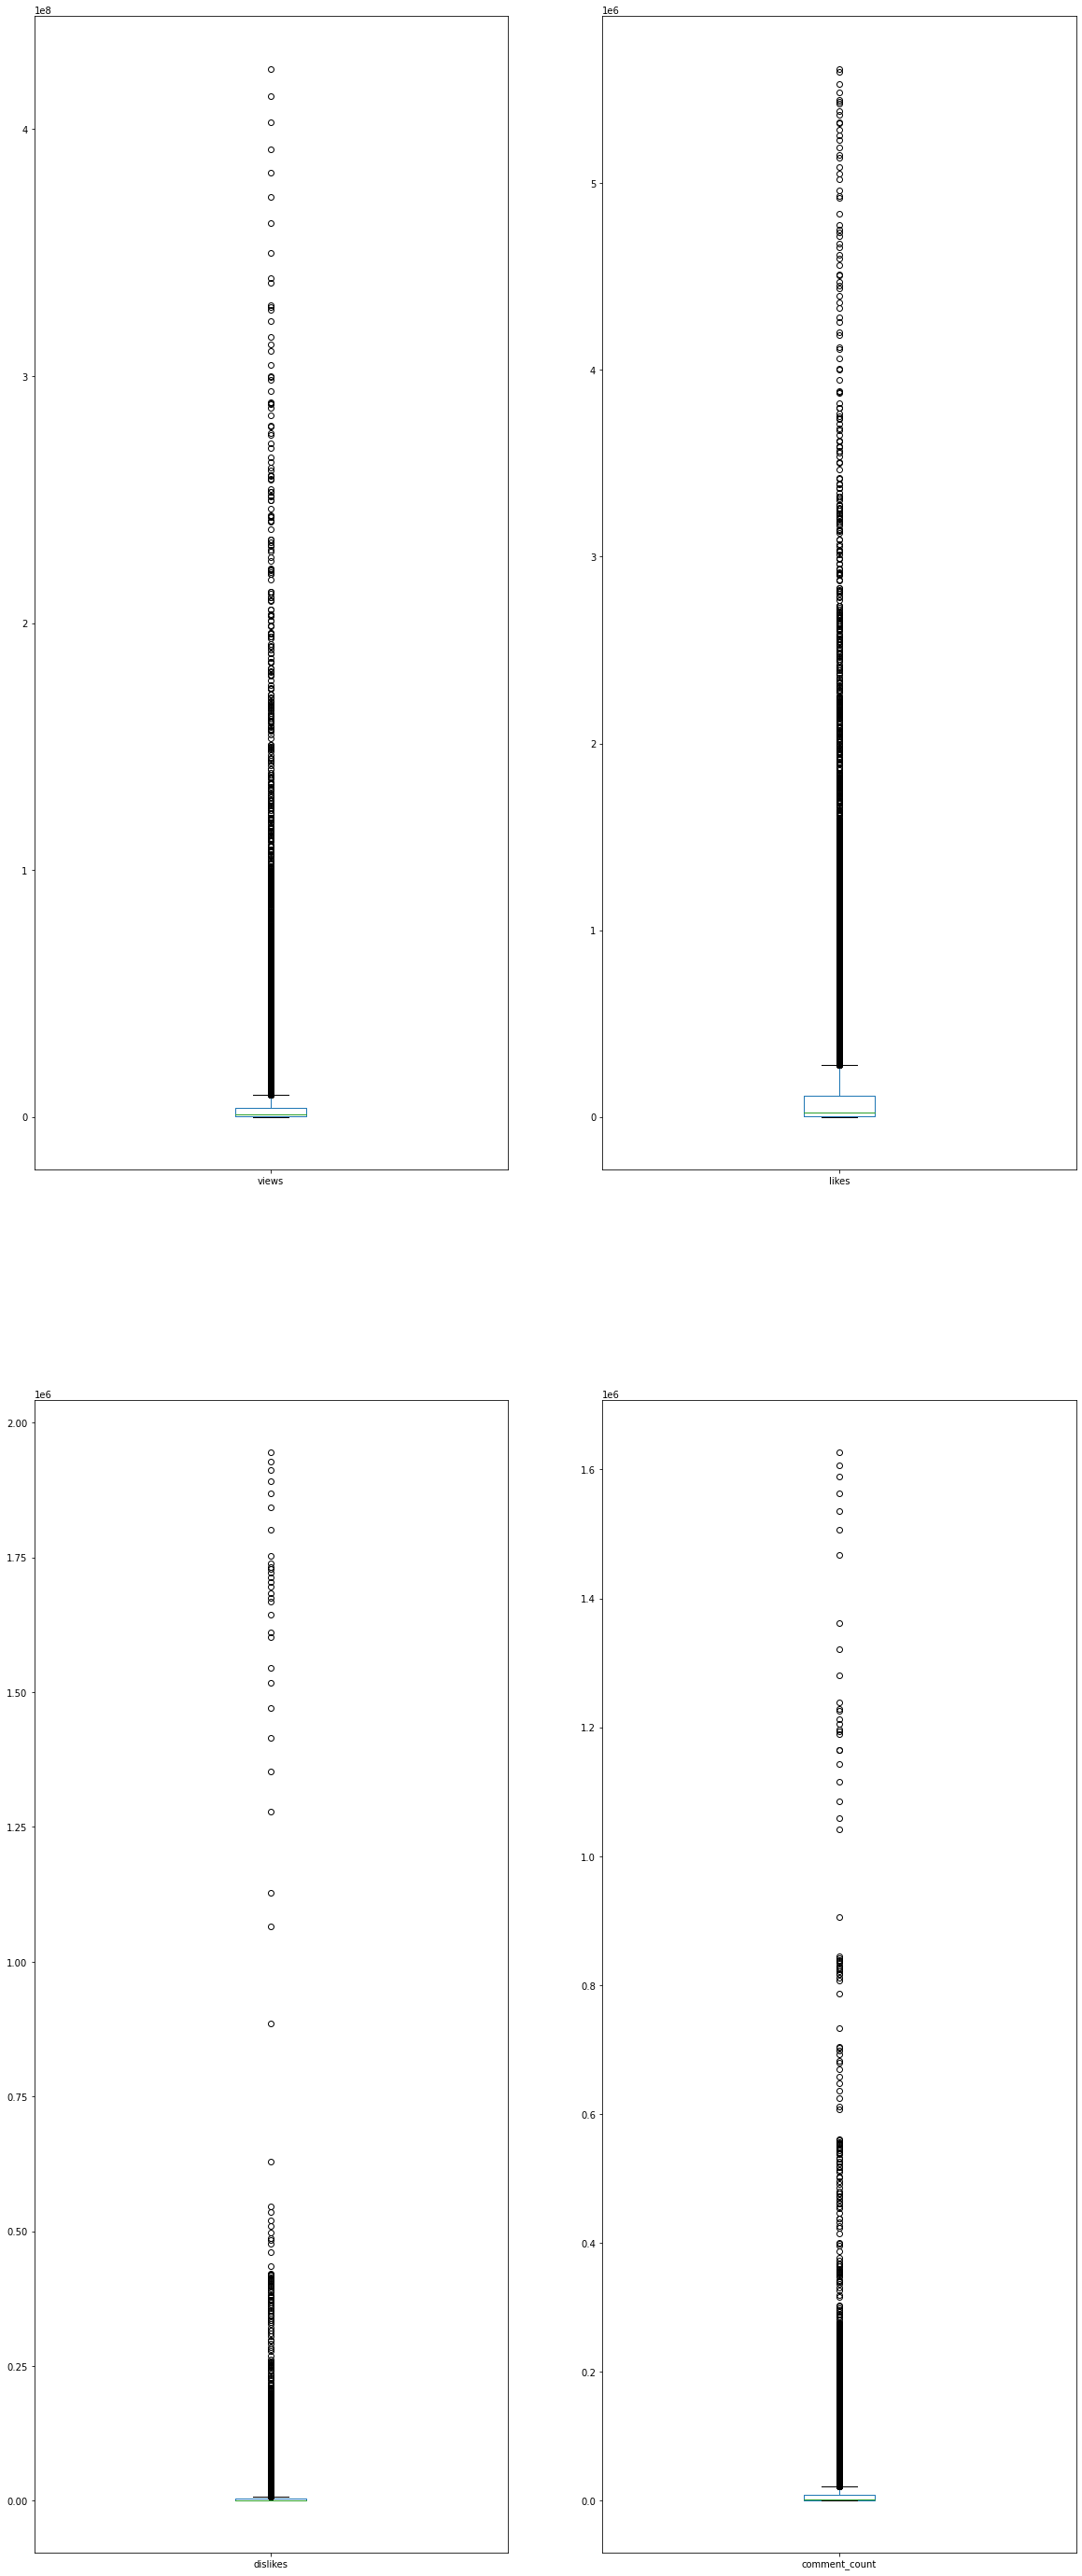

**********************************************************************************************************************************
在INvideos数据集中:


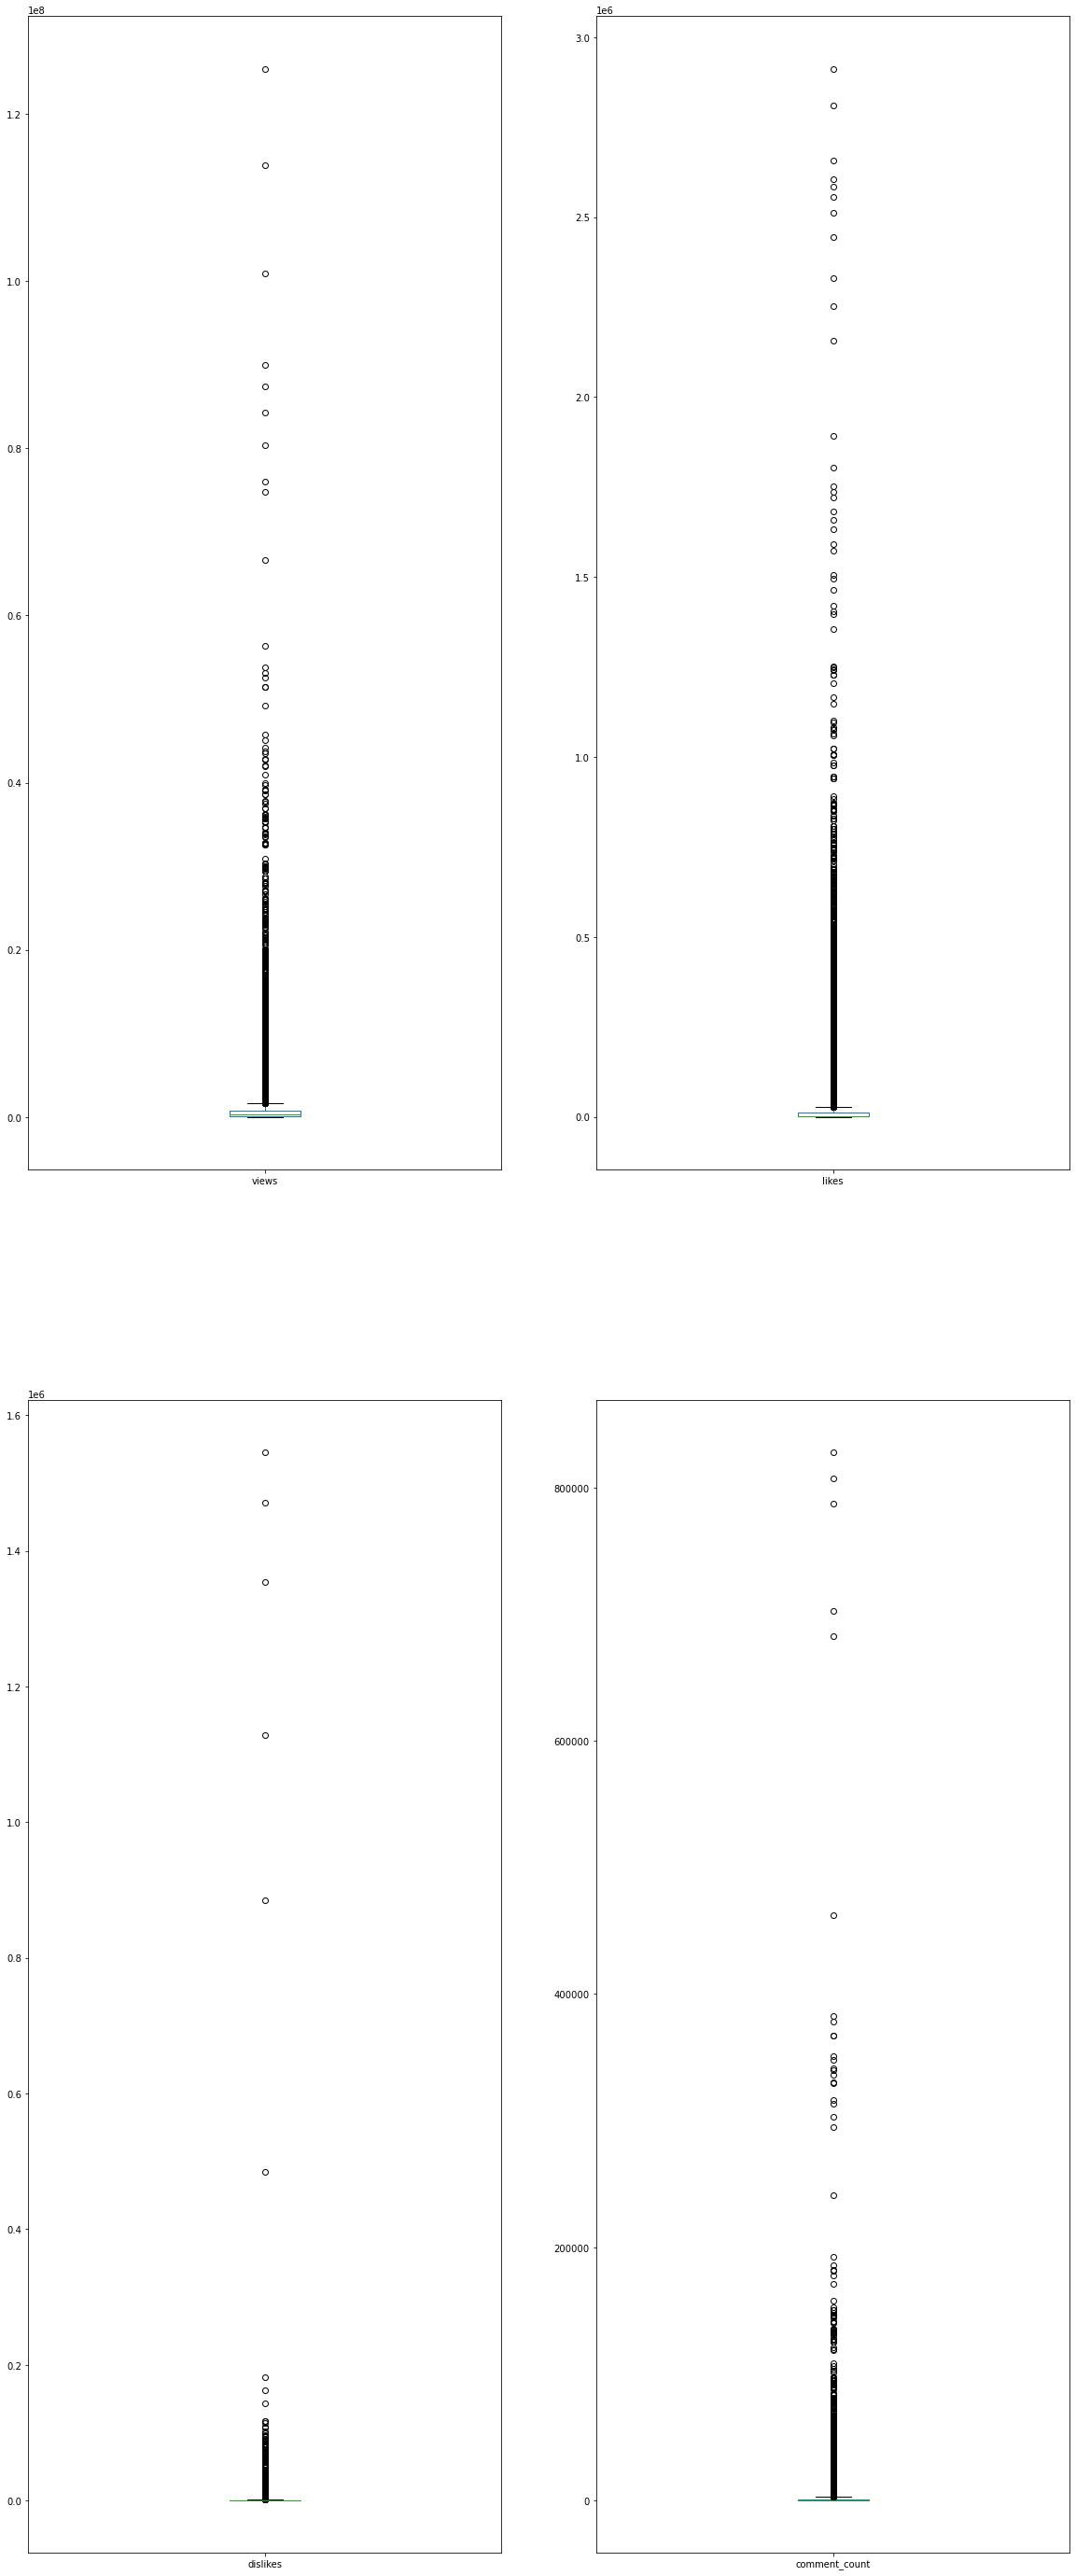

**********************************************************************************************************************************
在USvideos数据集中:


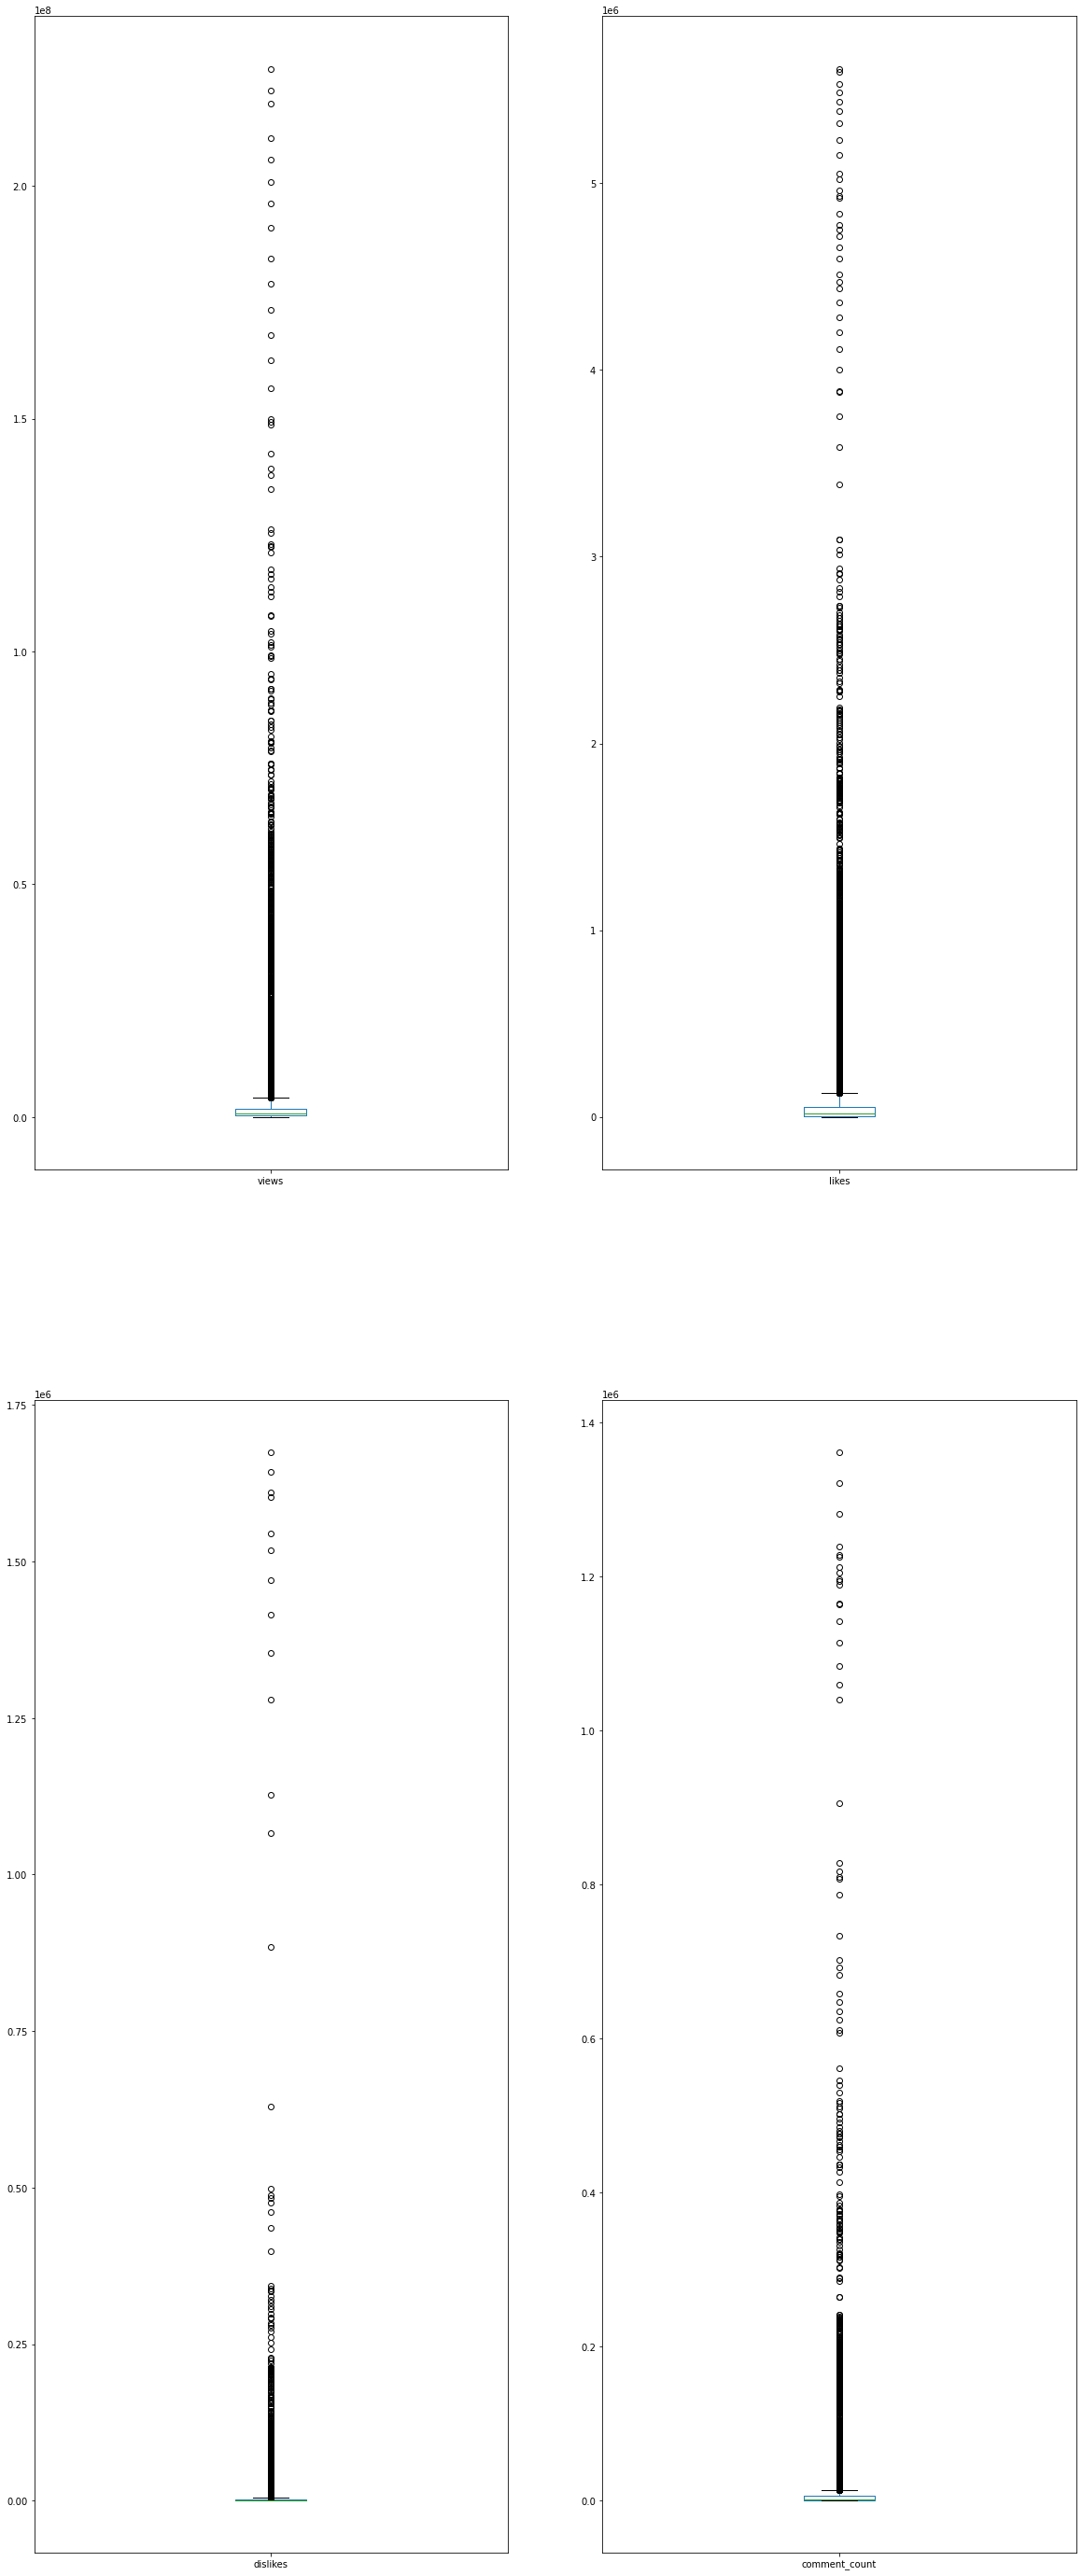

**********************************************************************************************************************************


In [11]:
for i in range(file_num):
    print(f"在{name_list[i]}数据集中:")
    drawBoxplotForNumerical(video_dict[name_list[i]], numeric_columns, figsize=(20, 50))
    plt.show()
    print('*' * 130)

在CAvideos数据集中:


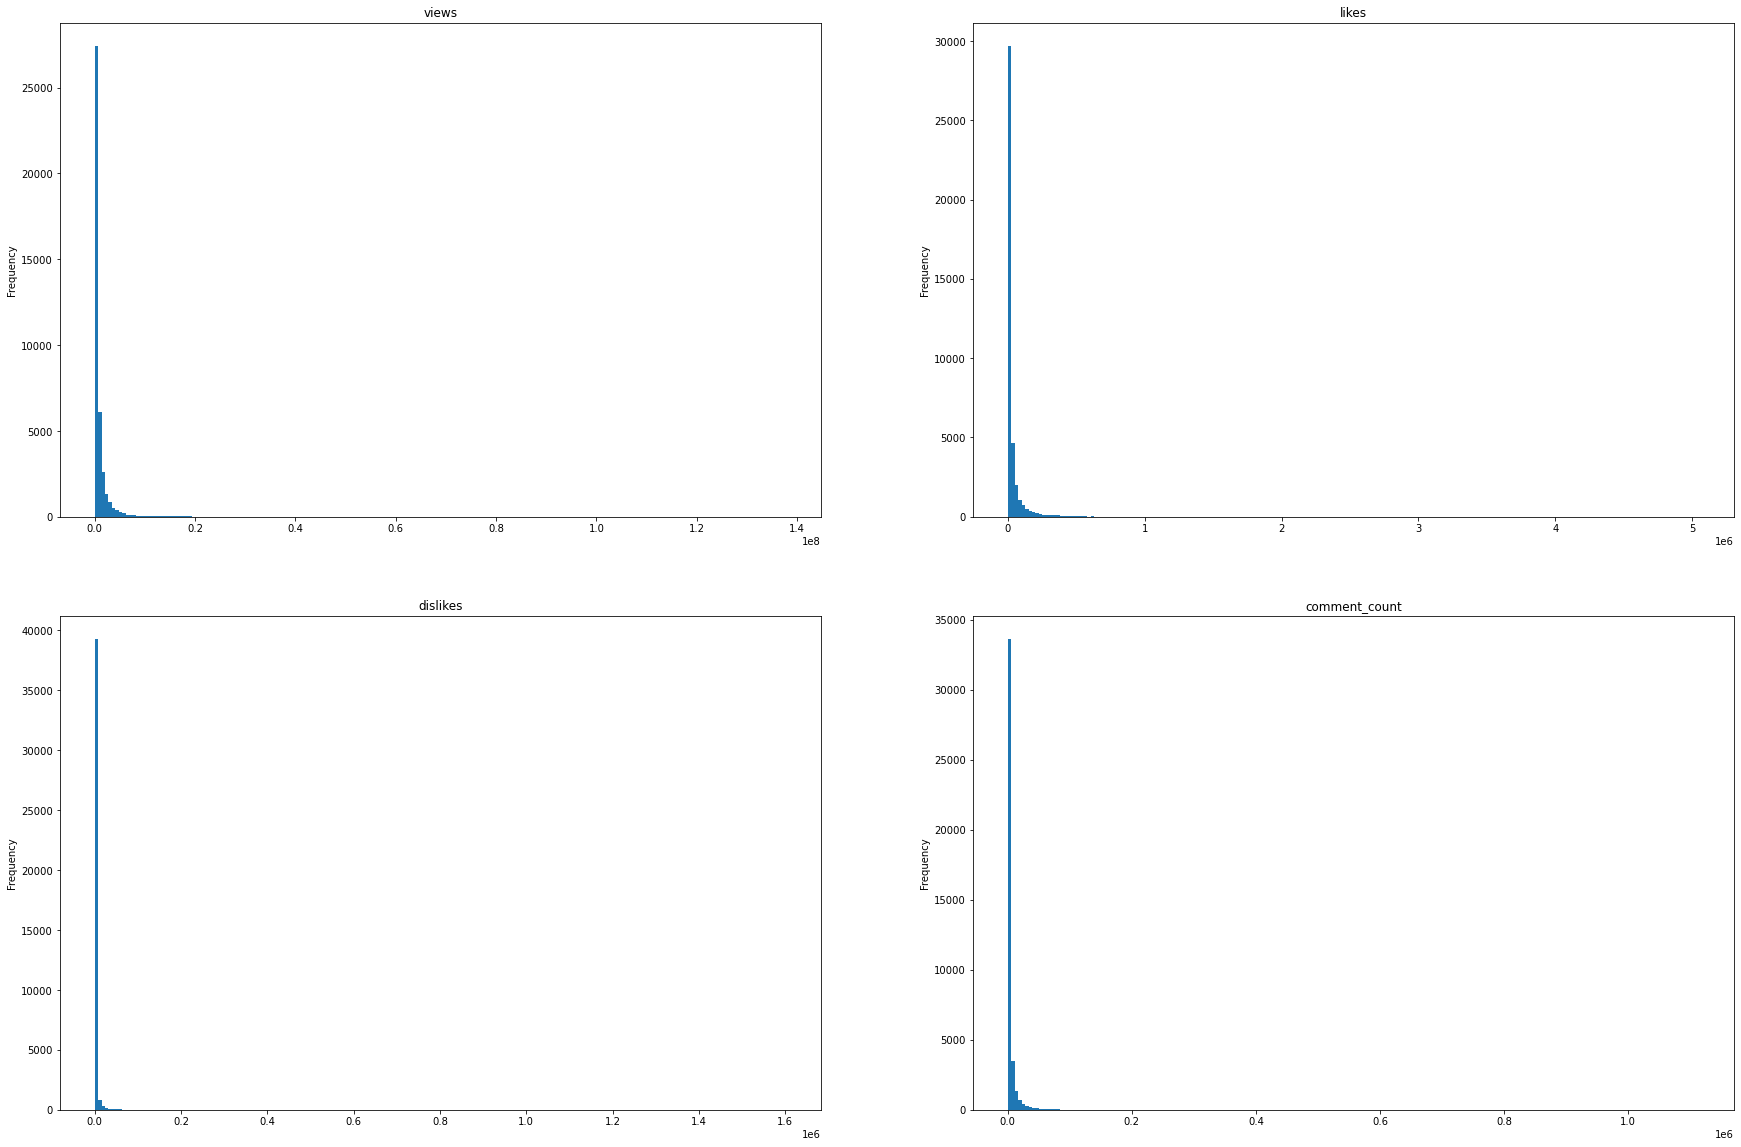

**********************************************************************************************************************************
在DEvideos数据集中:


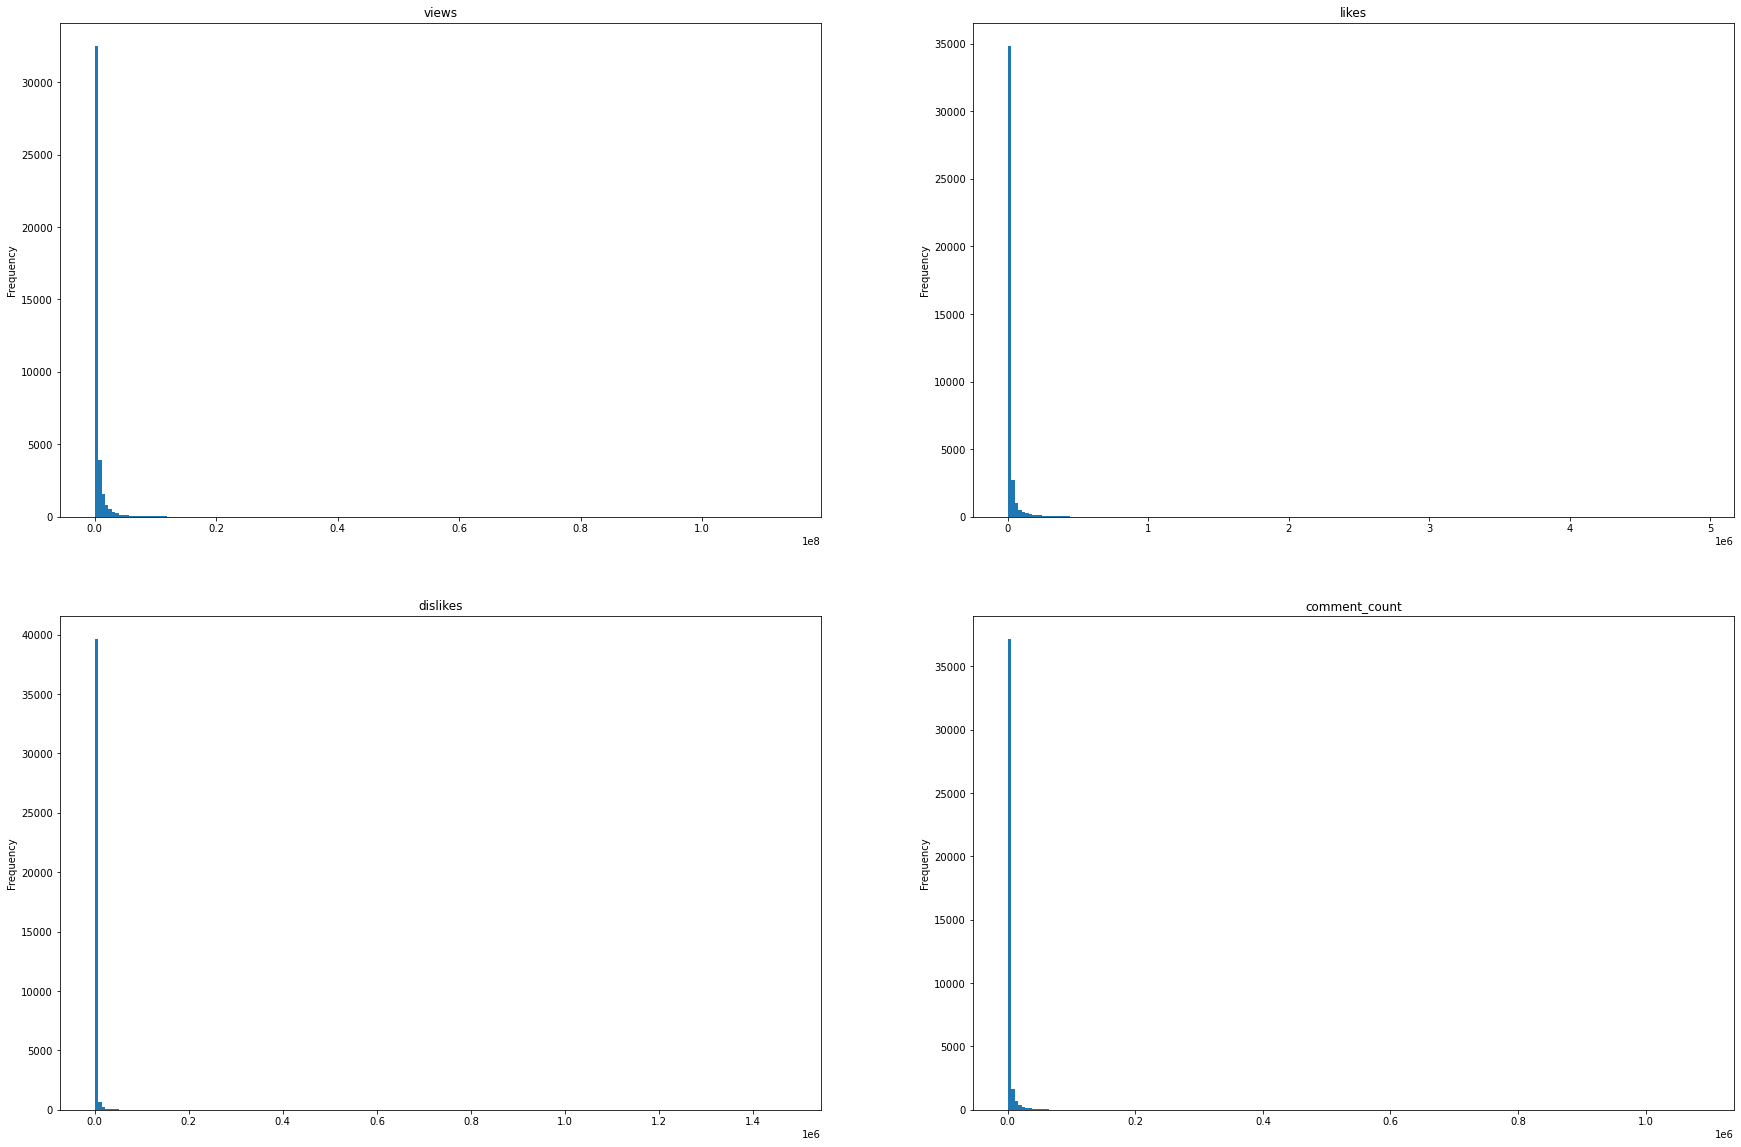

**********************************************************************************************************************************
在FRvideos数据集中:


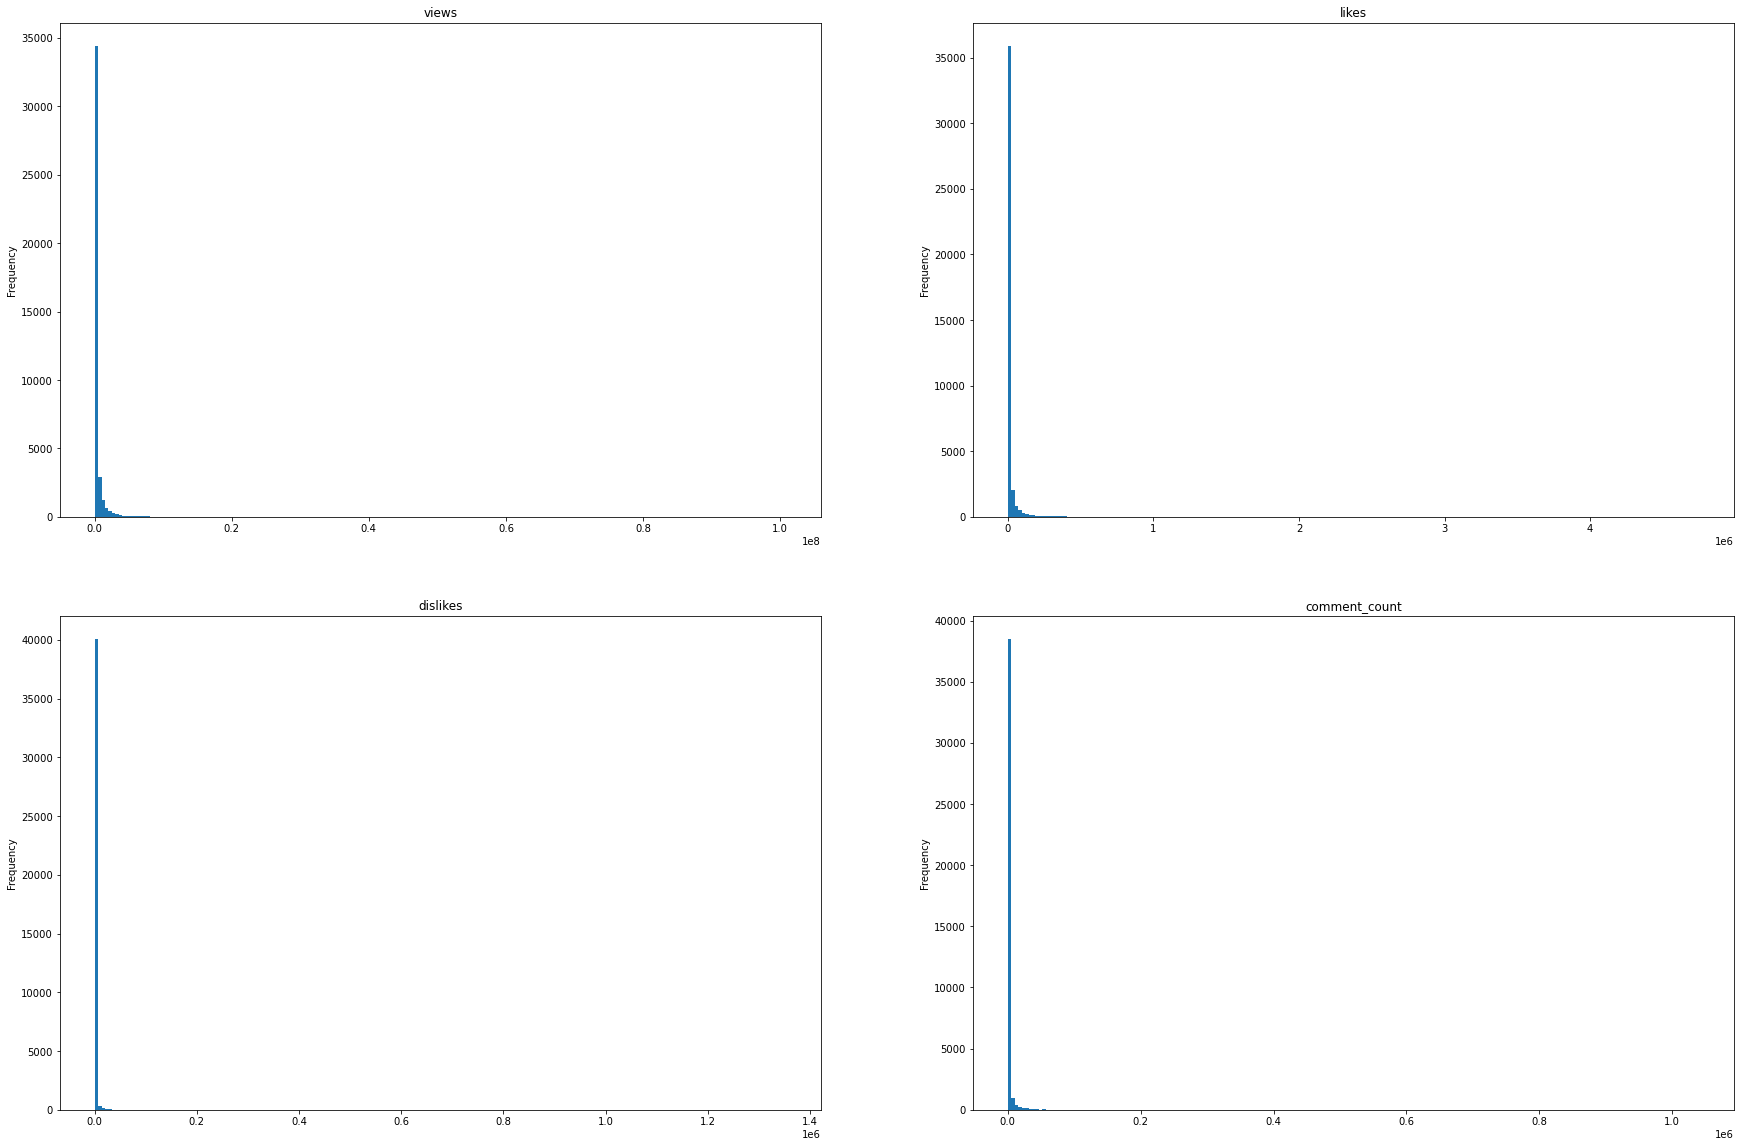

**********************************************************************************************************************************
在GBvideos数据集中:


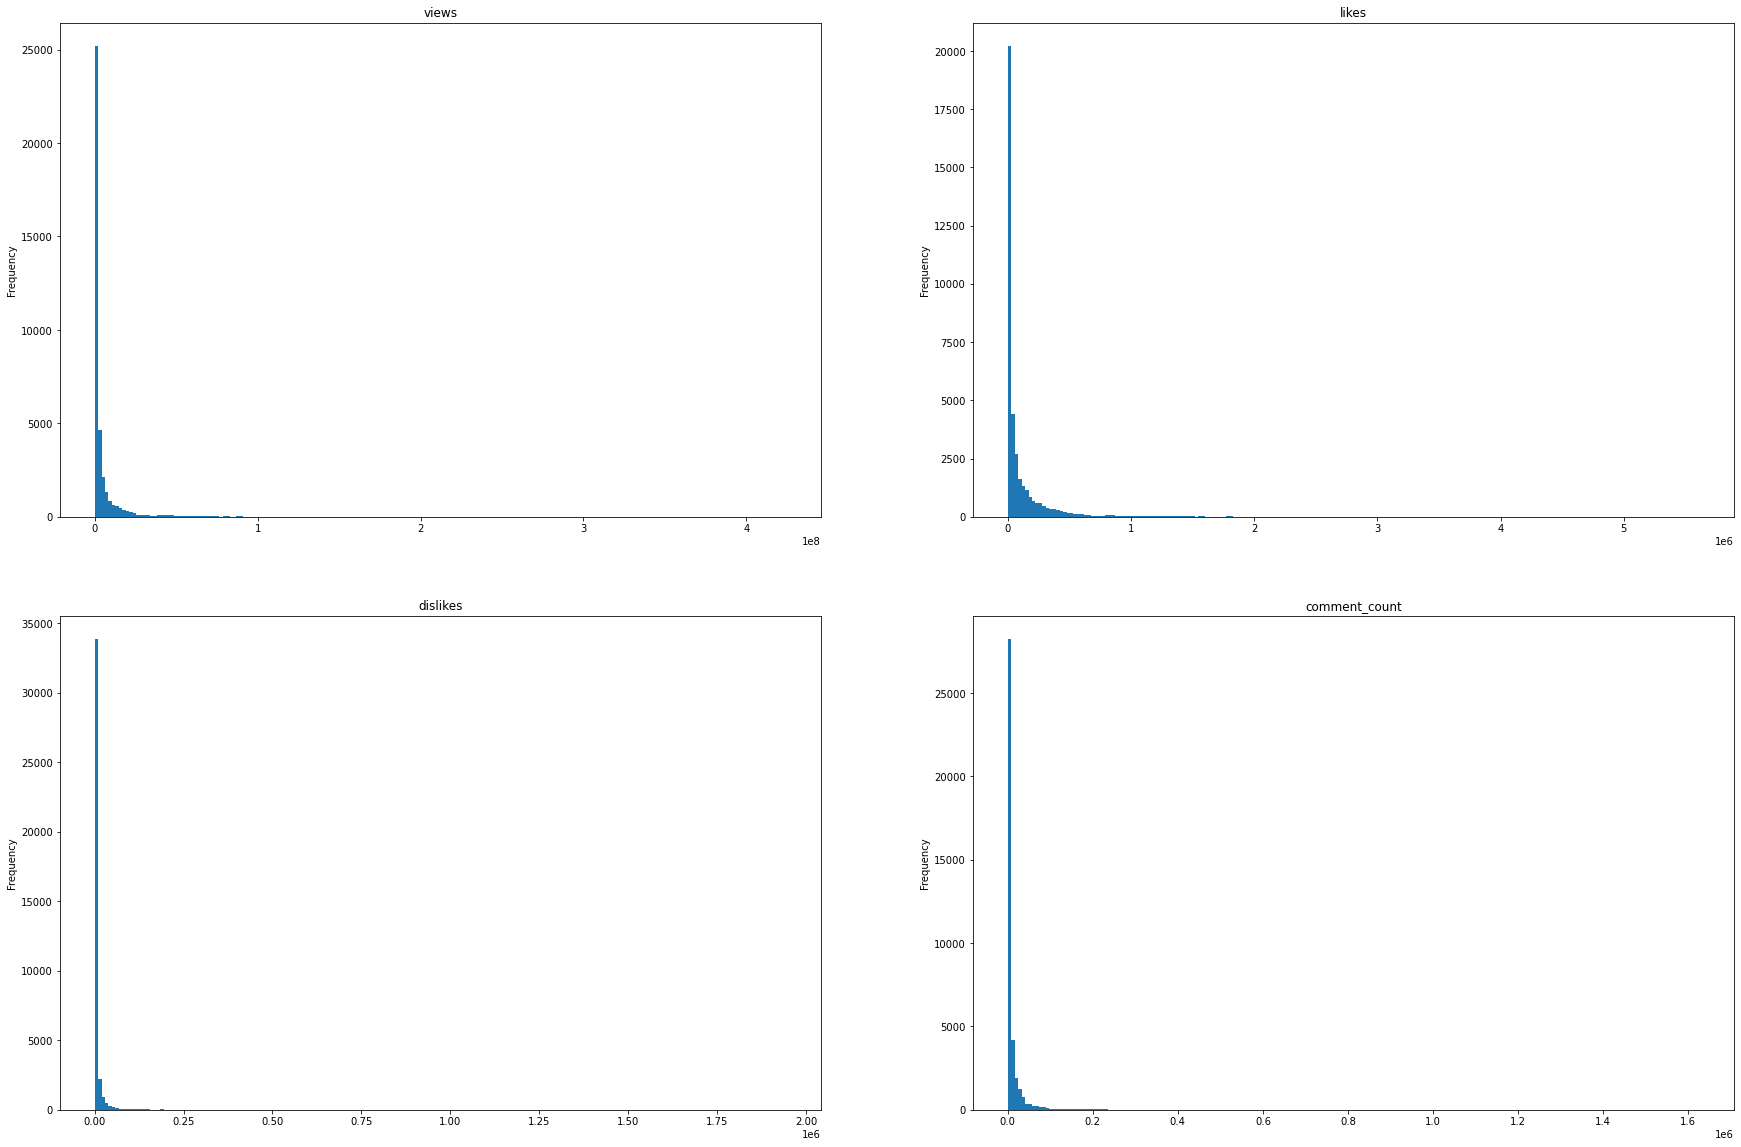

**********************************************************************************************************************************
在INvideos数据集中:


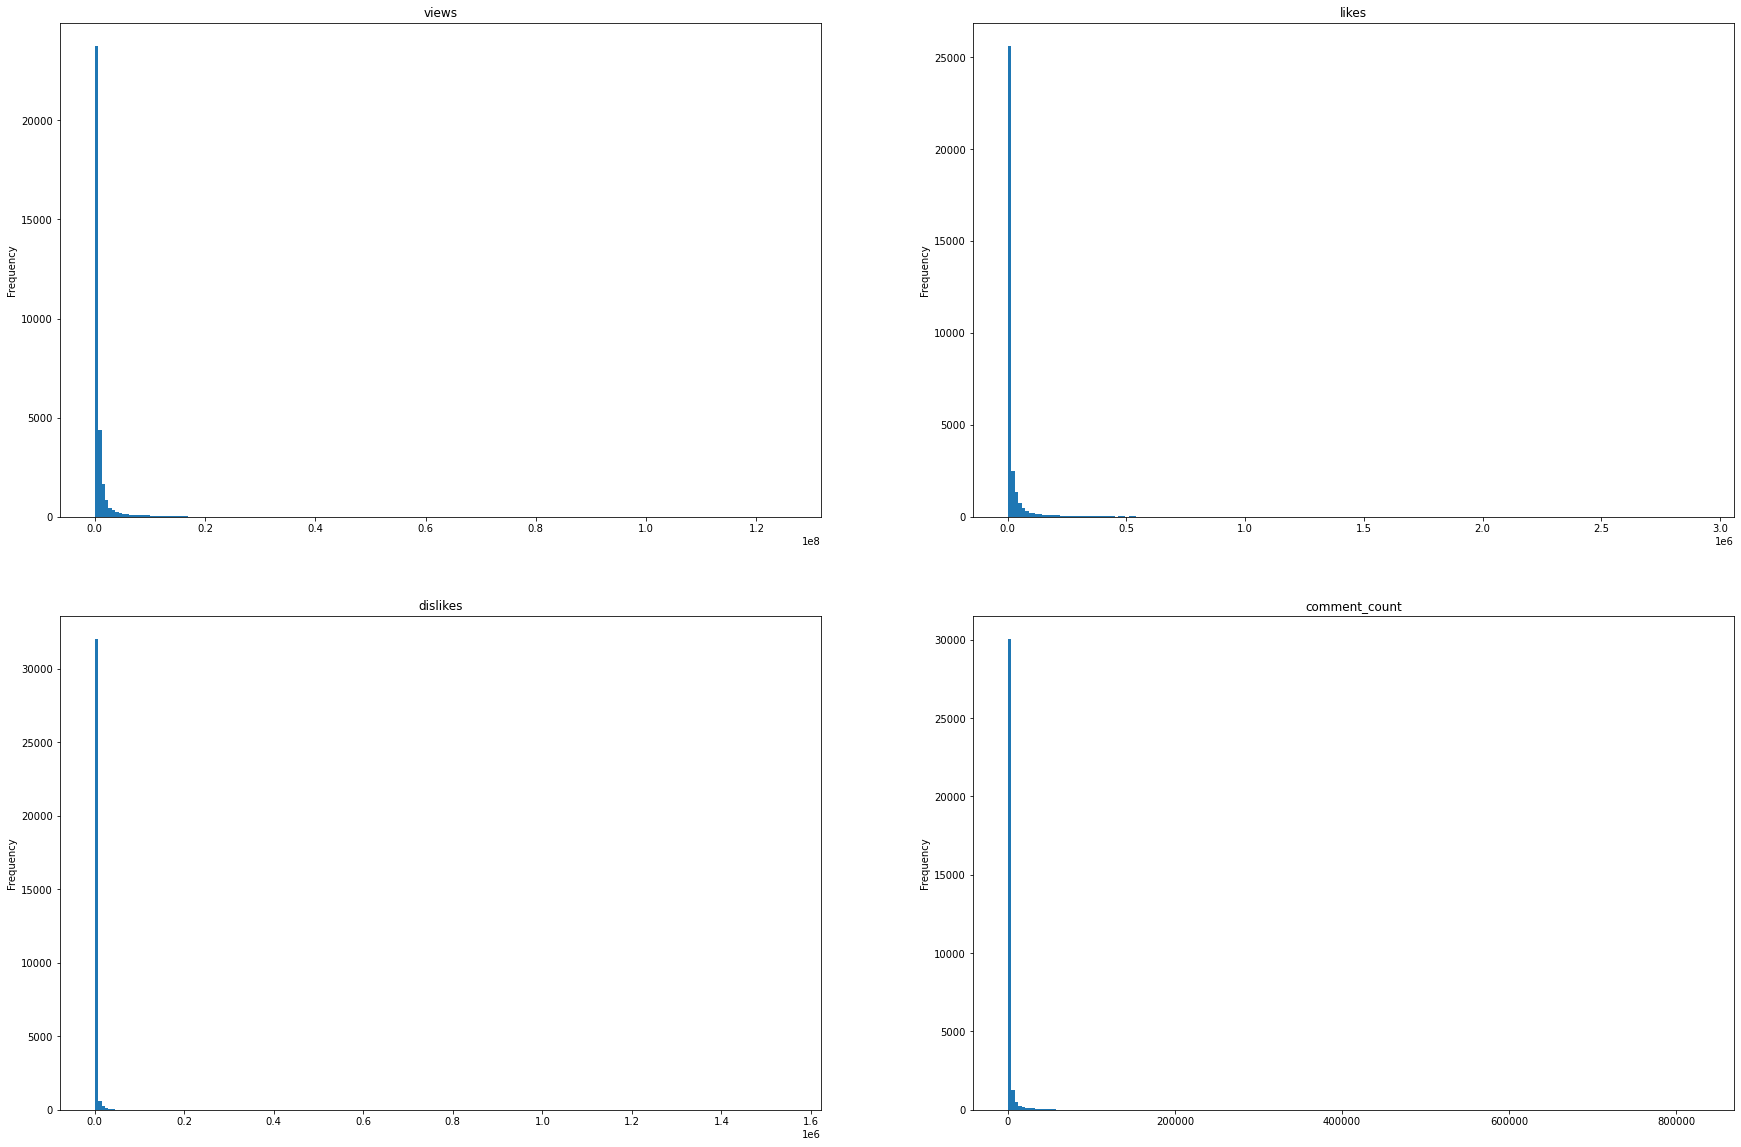

**********************************************************************************************************************************
在USvideos数据集中:


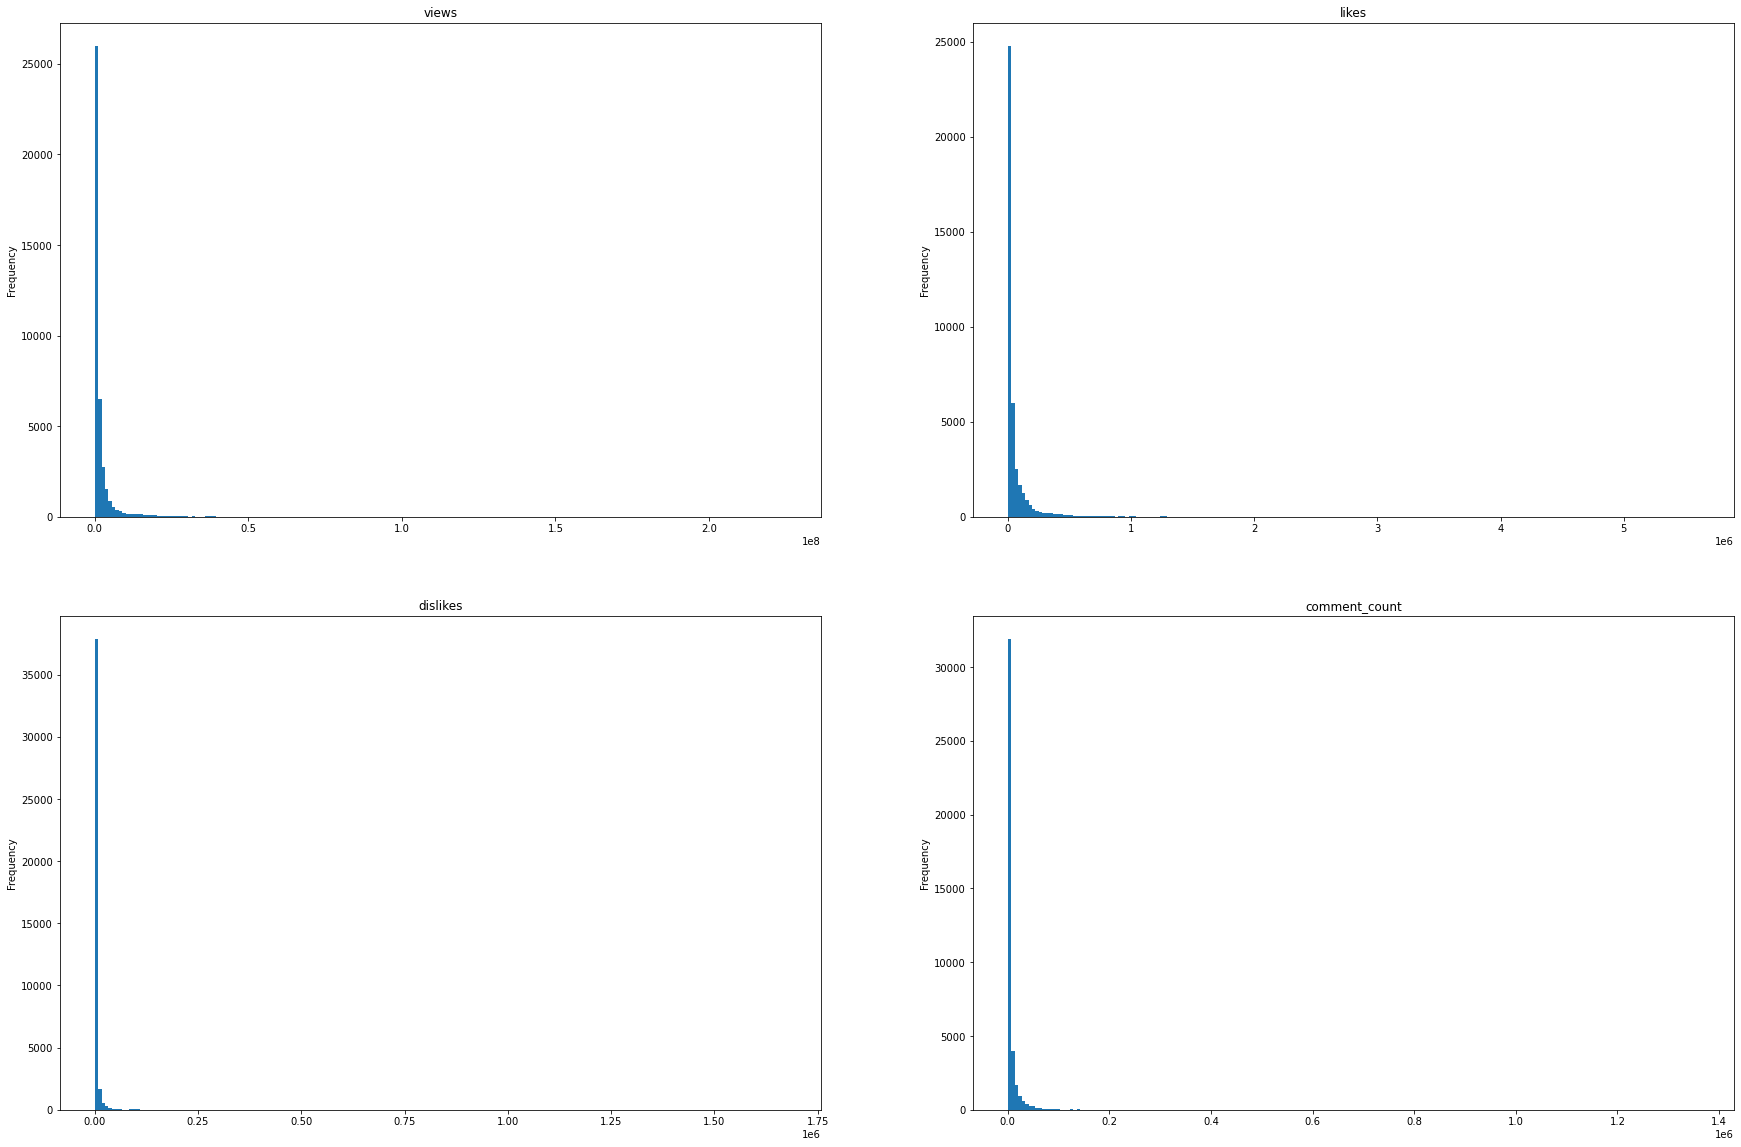

**********************************************************************************************************************************


In [12]:
for i in range(file_num):
    print(f"在{name_list[i]}数据集中:")
    drawHistogramForNumerical(video_dict[name_list[i]], numeric_columns, figsize=(30, 20))
    plt.show()
    print('*' * 130)

## 数据缺失处理

In [13]:
for i in range(file_num):
    print(f'{name_list[i]}的数据缺失情况为:')
    print(video_dict[name_list[i]].isnull().sum())
    for column in video_dict[name_list[i]].columns:
        idx = video_dict[name_list[i]][column].isnull()
        if idx.any():
            print('-' * 60, column, '-' * 60)
            display(video_dict[name_list[i]][idx].head(2))
    print('*' * 130)

CAvideos的数据缺失情况为:
video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64
------------------------------------------------------------ description ------------------------------------------------------------


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
98,lHcXhBojpeQ,17.14.11,三屆TVB視帝，拋棄10年青梅竹馬髮妻，為娶小三還不惜與母絕交！,明星百曉生,22,2017-11-12T12:49:50.000Z,[none],88061,47,58,17,https://i.ytimg.com/vi/lHcXhBojpeQ/default.jpg,False,False,False,NaN
115,_QHEPUKBn9g,17.14.11,‘Too Alabama for Alabama’: SNL brutally mocks ...,MAXI POWER,23,2017-11-12T05:01:18.000Z,[none],20163,44,34,8,https://i.ytimg.com/vi/_QHEPUKBn9g/default.jpg,False,False,False,NaN


**********************************************************************************************************************************
DEvideos的数据缺失情况为:
video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
dtype: int64
------------------------------------------------------------ description ------------------------------------------------------------


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
67,XEY-mcrPAjI,17.14.11,Hayattta Her Şey Var 13 Kasım 2017,Hayatta Her Şey Var,22,2017-11-13T12:12:31.000Z,"BURÇ YORUMLARI|""HAFTALIK BURÇLAR""|""ASTROLOG""|""...",41376,809,64,73,https://i.ytimg.com/vi/XEY-mcrPAjI/default.jpg,False,False,False,NaN
145,OA0vhAKUD0g,17.14.11,Outlander S03E09 i'm melting with you'',Ella bell,1,2017-11-12T22:33:48.000Z,[none],32941,149,2,5,https://i.ytimg.com/vi/OA0vhAKUD0g/default.jpg,False,False,False,NaN


**********************************************************************************************************************************
FRvideos的数据缺失情况为:
video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2912
dtype: int64
------------------------------------------------------------ description ------------------------------------------------------------


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
63,SoDxxEyxE84,17.14.11,Raquel Garrido explique son départ de FI - Les...,Gaetano Gitano,22,2017-11-12T21:30:42.000Z,[none],12740,110,16,69,https://i.ytimg.com/vi/SoDxxEyxE84/default.jpg,False,False,False,NaN
75,tlSLFSw_lYs,17.14.11,Kabila pousse Tshibala vers la porte de sortie...,lokoleelela,25,2017-11-13T08:35:59.000Z,[none],26260,182,44,156,https://i.ytimg.com/vi/tlSLFSw_lYs/default.jpg,False,False,False,NaN


**********************************************************************************************************************************
GBvideos的数据缺失情况为:
video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               608
dtype: int64
------------------------------------------------------------ description ------------------------------------------------------------


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
91,_wM_jY_rass,17.14.11,Bone on Labour HQ,Ross Kempsell,25,2017-11-06T16:12:58.000Z,[none],159065,1160,1164,0,https://i.ytimg.com/vi/_wM_jY_rass/default.jpg,True,False,False,NaN
118,8HON4AswPVk,17.14.11,Arvo Pärt - Tabula Rasa,JSaxofone,10,2012-09-13T12:35:46.000Z,"Arvo|""Pärt""|""Tabula""|""Rasa""|""part""|""violin""|""c...",728177,4007,71,240,https://i.ytimg.com/vi/8HON4AswPVk/default.jpg,False,False,False,NaN


**********************************************************************************************************************************
INvideos的数据缺失情况为:
video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               527
dtype: int64
------------------------------------------------------------ description ------------------------------------------------------------


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
24,znOC3IU0dF8,17.14.11,Hero Tarun at #ChaySamWeddingReception | Saman...,News Mantra,24,2017-11-13T06:03:49.000Z,Hero Tarun At Samantha Naga Chaitanya Wedding ...,55178,45,94,15,https://i.ytimg.com/vi/znOC3IU0dF8/default.jpg,False,False,False,NaN
25,z3V9LUA6VQM,17.14.11,ఆమె బ్యాంకు అకౌంట్ లో పొరపాటున 125 కోట్లు జమయా...,OmFut,24,2017-11-12T09:45:58.000Z,[none],236710,858,197,66,https://i.ytimg.com/vi/z3V9LUA6VQM/default.jpg,False,False,False,NaN


**********************************************************************************************************************************
USvideos的数据缺失情况为:
video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               569
dtype: int64
------------------------------------------------------------ description ------------------------------------------------------------


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN


**********************************************************************************************************************************


### 数据缺失原因
> ***description:*** 上传视频时没有该信息，简介可以为空。  

In [14]:
def compareNominalData(df1, df2, columns, nums=10, figsize=(20, 110)):
    col_num = len(columns)
    for idx, column in enumerate(columns):
        plt.subplot(col_num, 2, idx * 2 + 1)
        df1[column].value_counts()[: nums].plot.bar(title=column, figsize=figsize)
        plt.subplot(col_num, 2, idx * 2 + 2)
        df2[column].value_counts()[: nums].plot.bar(title=column, figsize=figsize)

def compareNumberialDataBox(df1, df2, columns, figsize=(10, 15)):
    col_num = len(columns)
    for idx, column in enumerate(columns):
        plt.subplot(col_num, 2, idx * 2 + 1)
        df1[column].plot.box(figsize=figsize)
        plt.subplot(col_num, 2, idx * 2 + 2)
        df2[column].plot.box(figsize=figsize)

def compareNumberialDataHist(df1, df2, columns, figsize=(10, 15), bins=[200, 200, 200, 200]):
    col_num = len(columns)
    for idx, column in enumerate(columns):
        plt.subplot(col_num, 2, idx * 2 + 1)
        df1[column].plot.hist(title=column, figsize=figsize, bins=bins[idx])
        plt.subplot(col_num, 2, idx * 2 + 2)
        df2[column].plot.hist(title=column, figsize=figsize, bins=bins[idx])

### 将缺失部分剔除

在CAvideos数据集中:


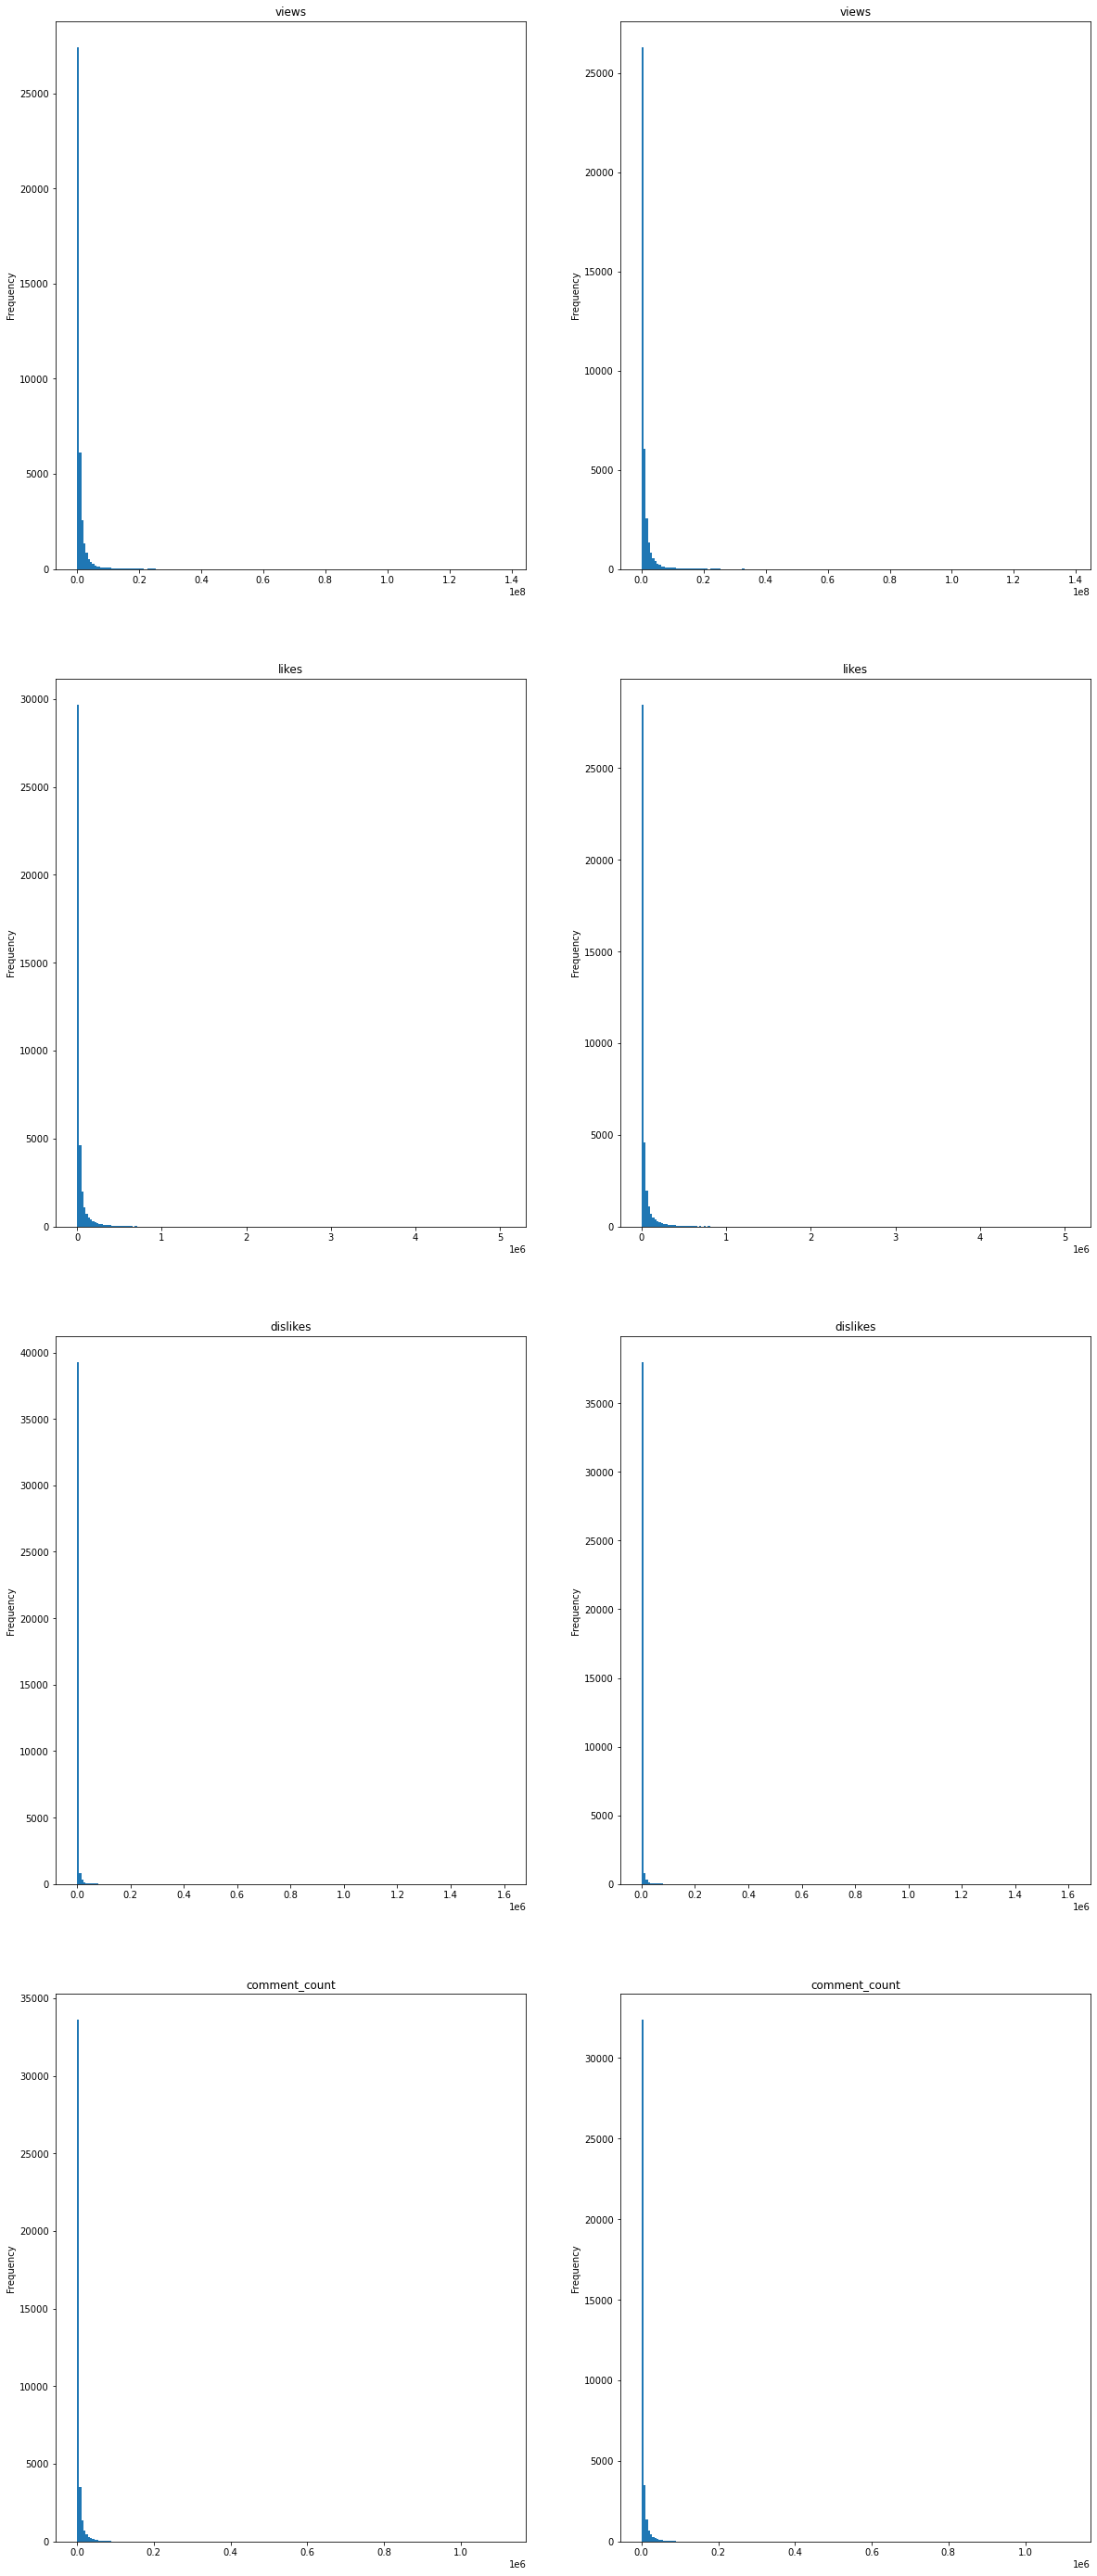

**********************************************************************************************************************************
在DEvideos数据集中:


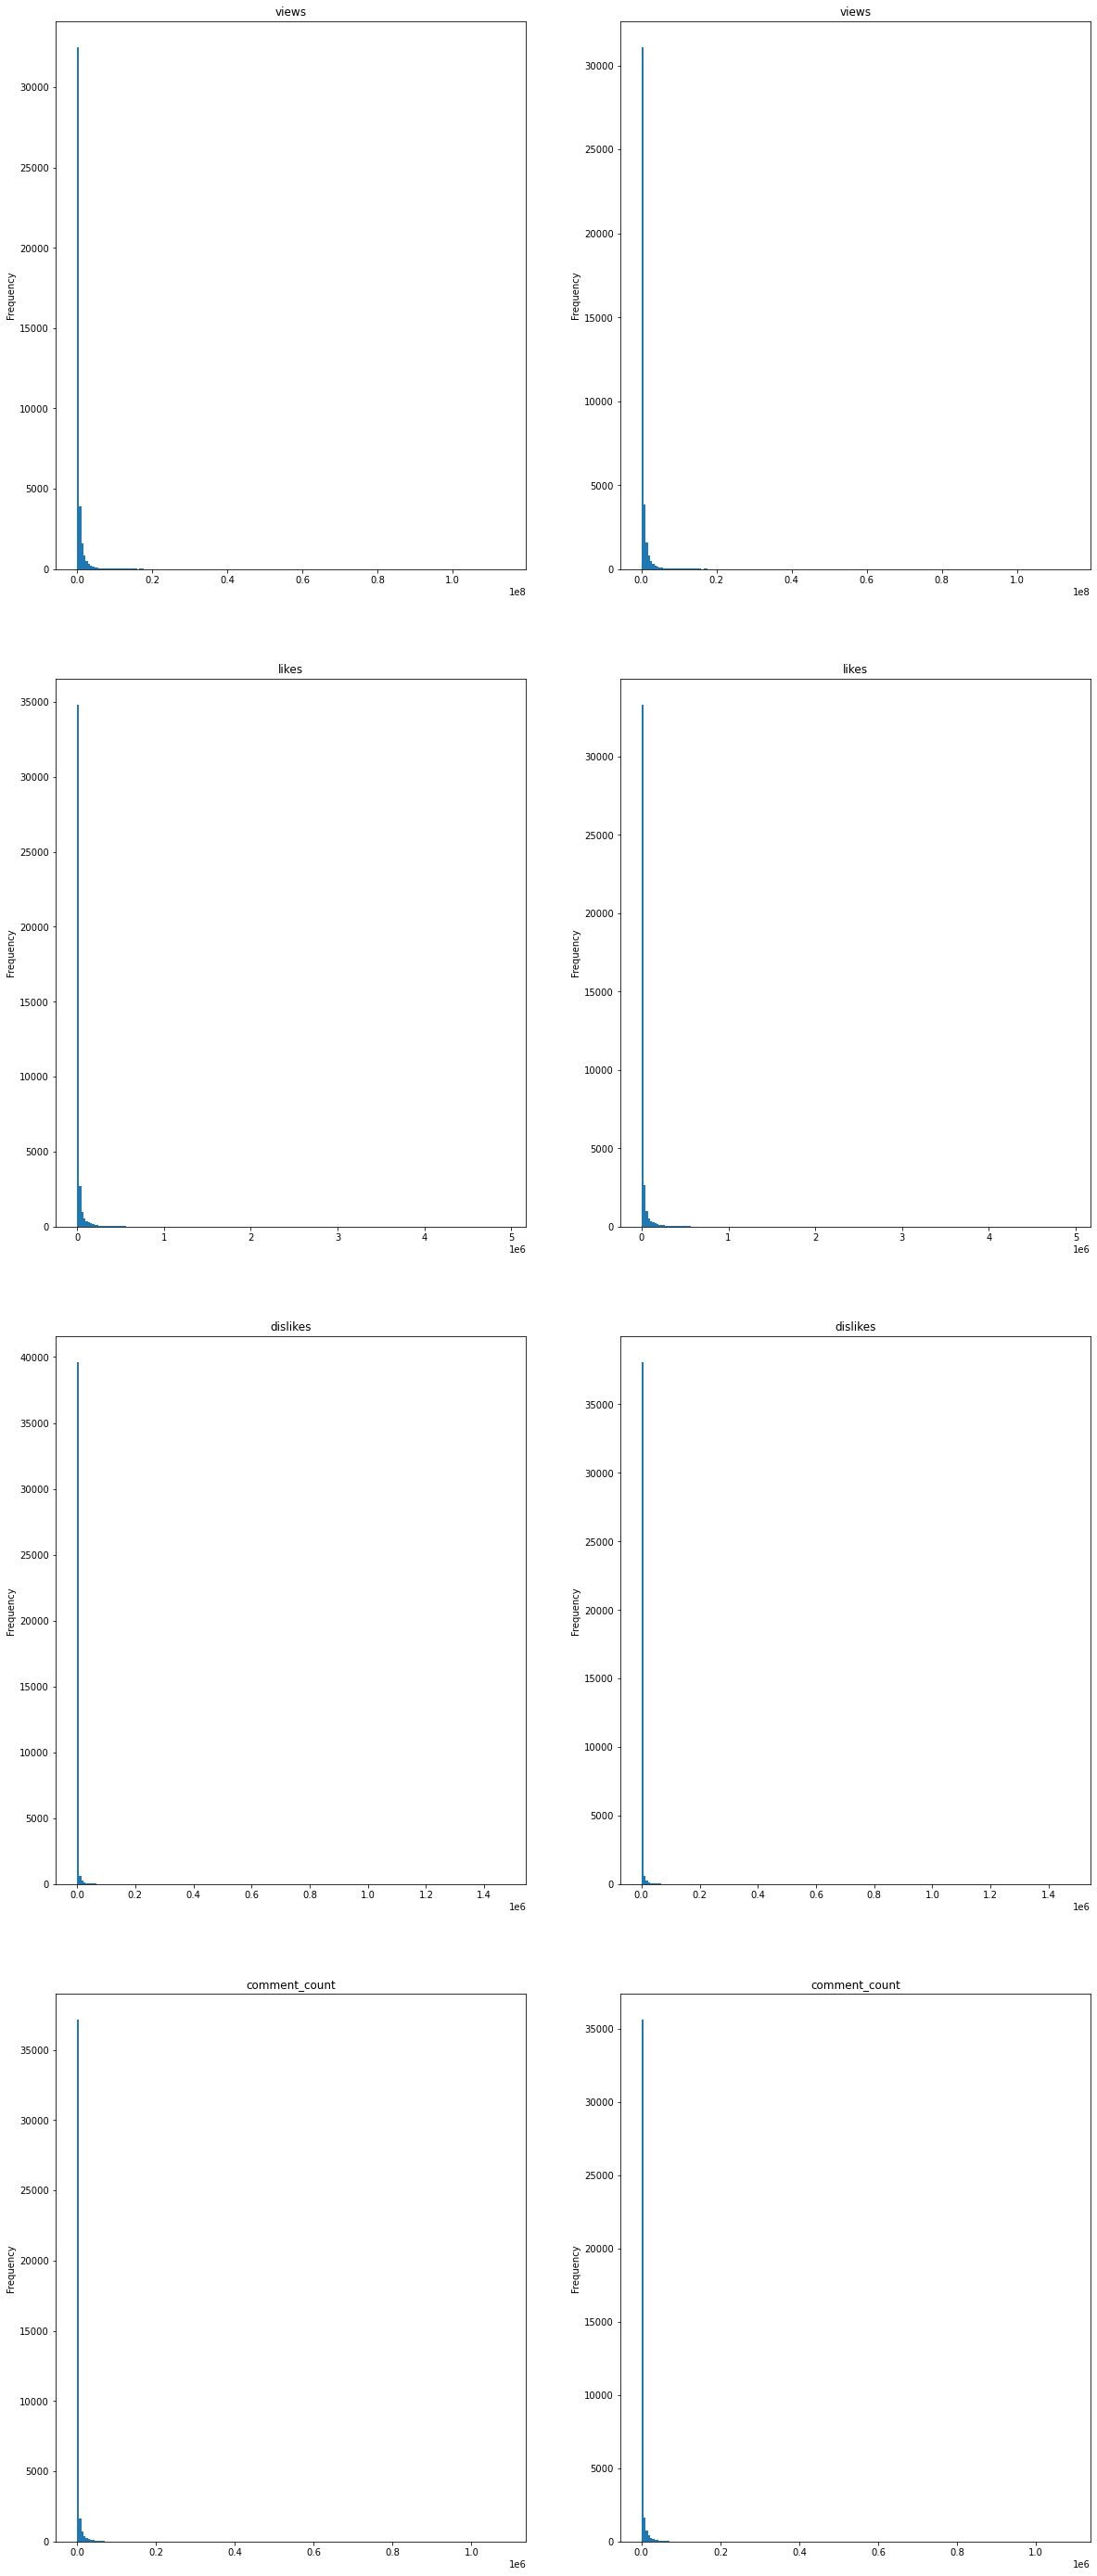

**********************************************************************************************************************************
在FRvideos数据集中:


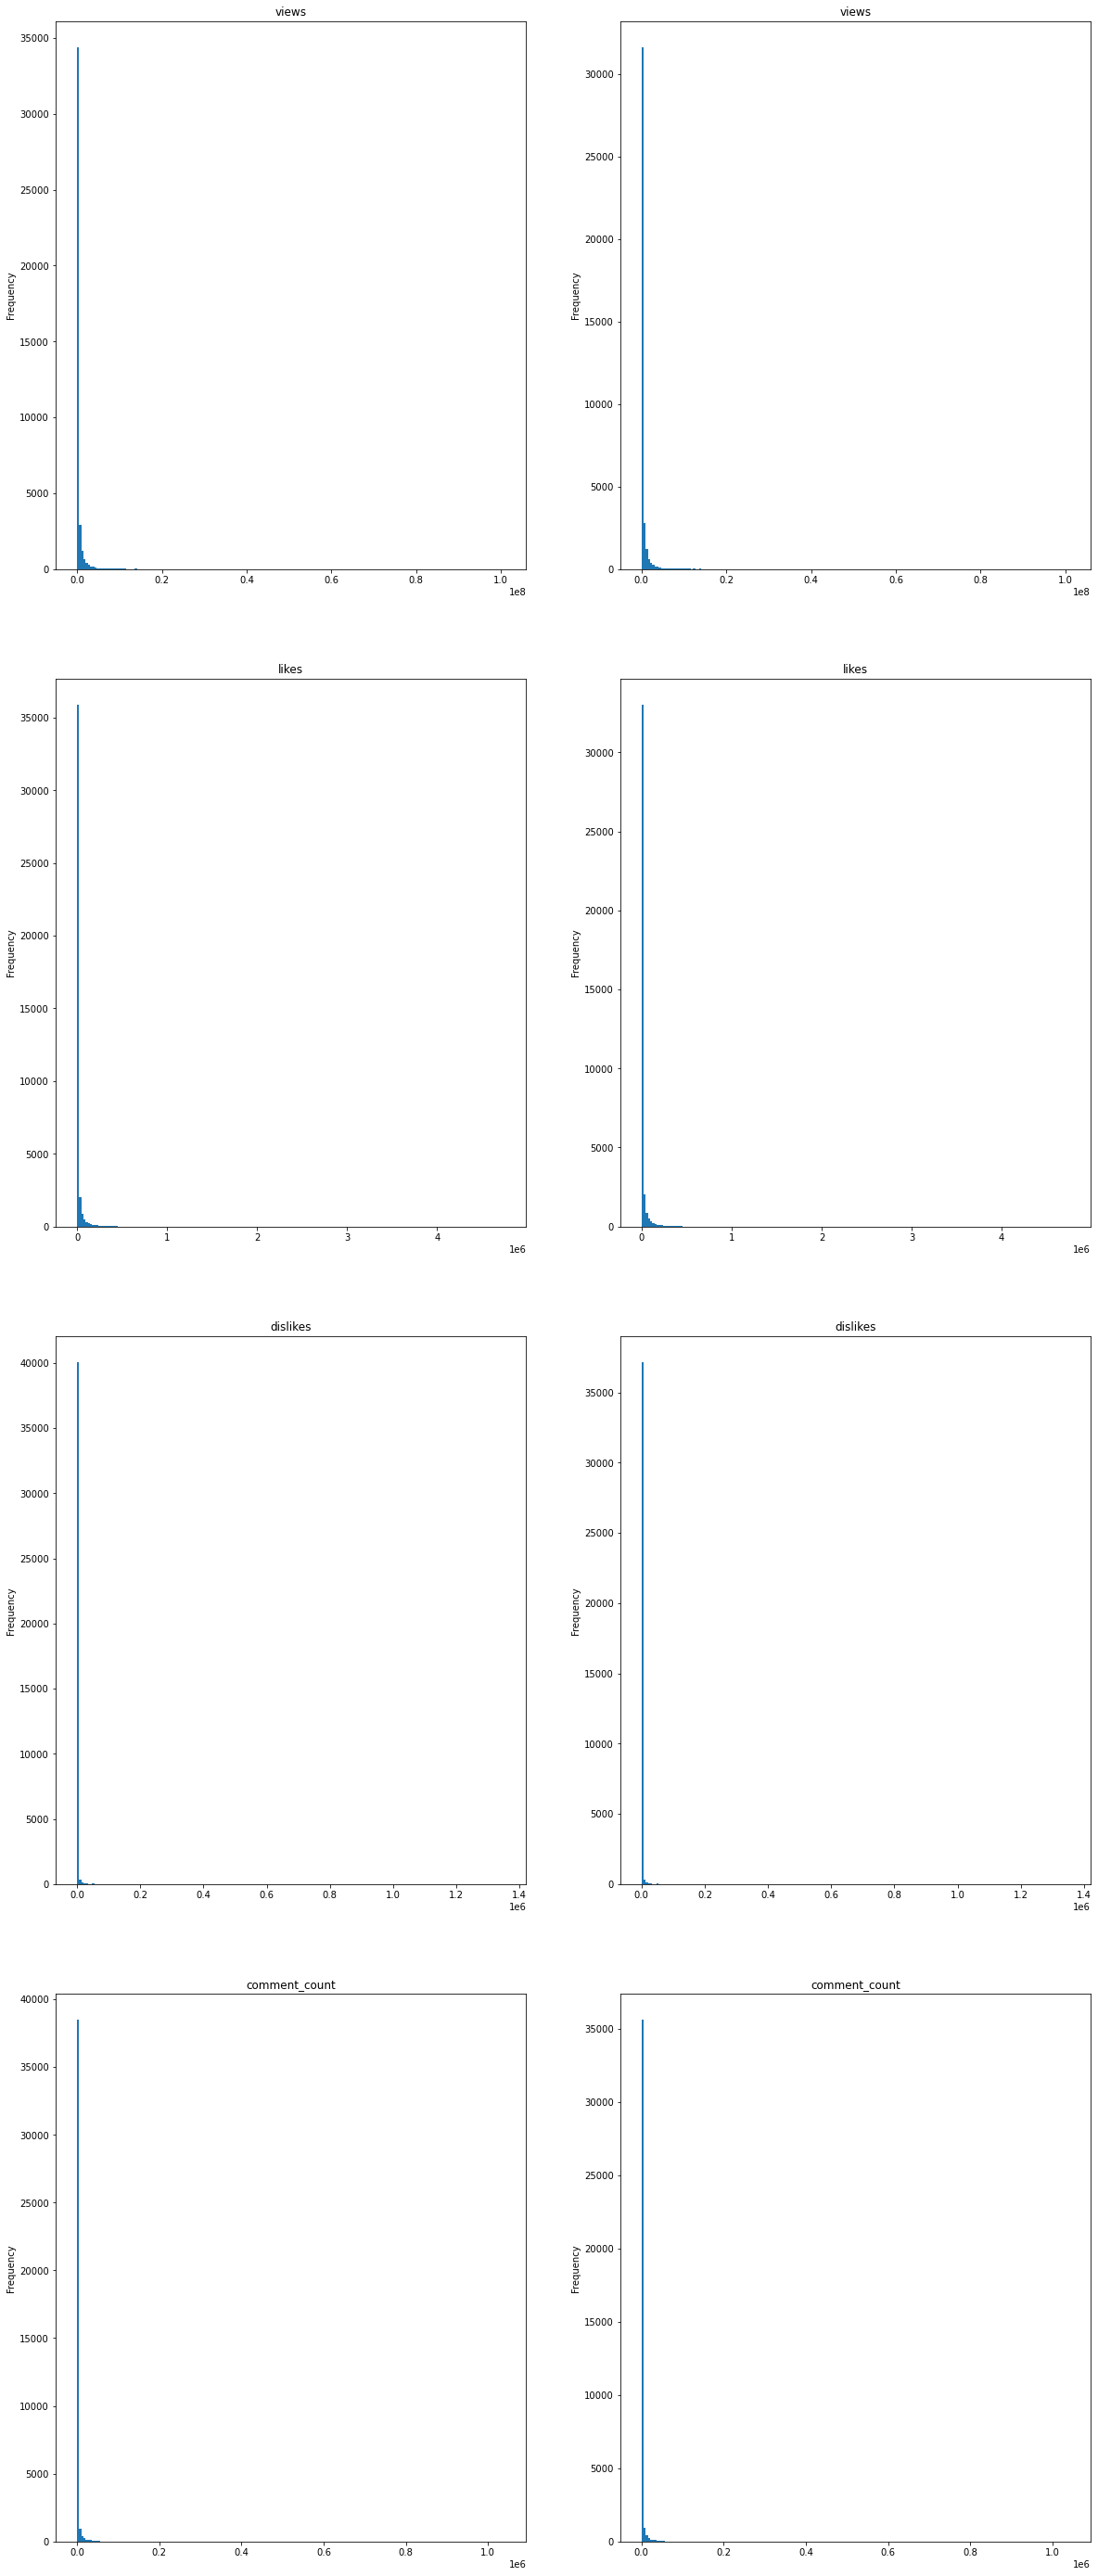

**********************************************************************************************************************************
在GBvideos数据集中:


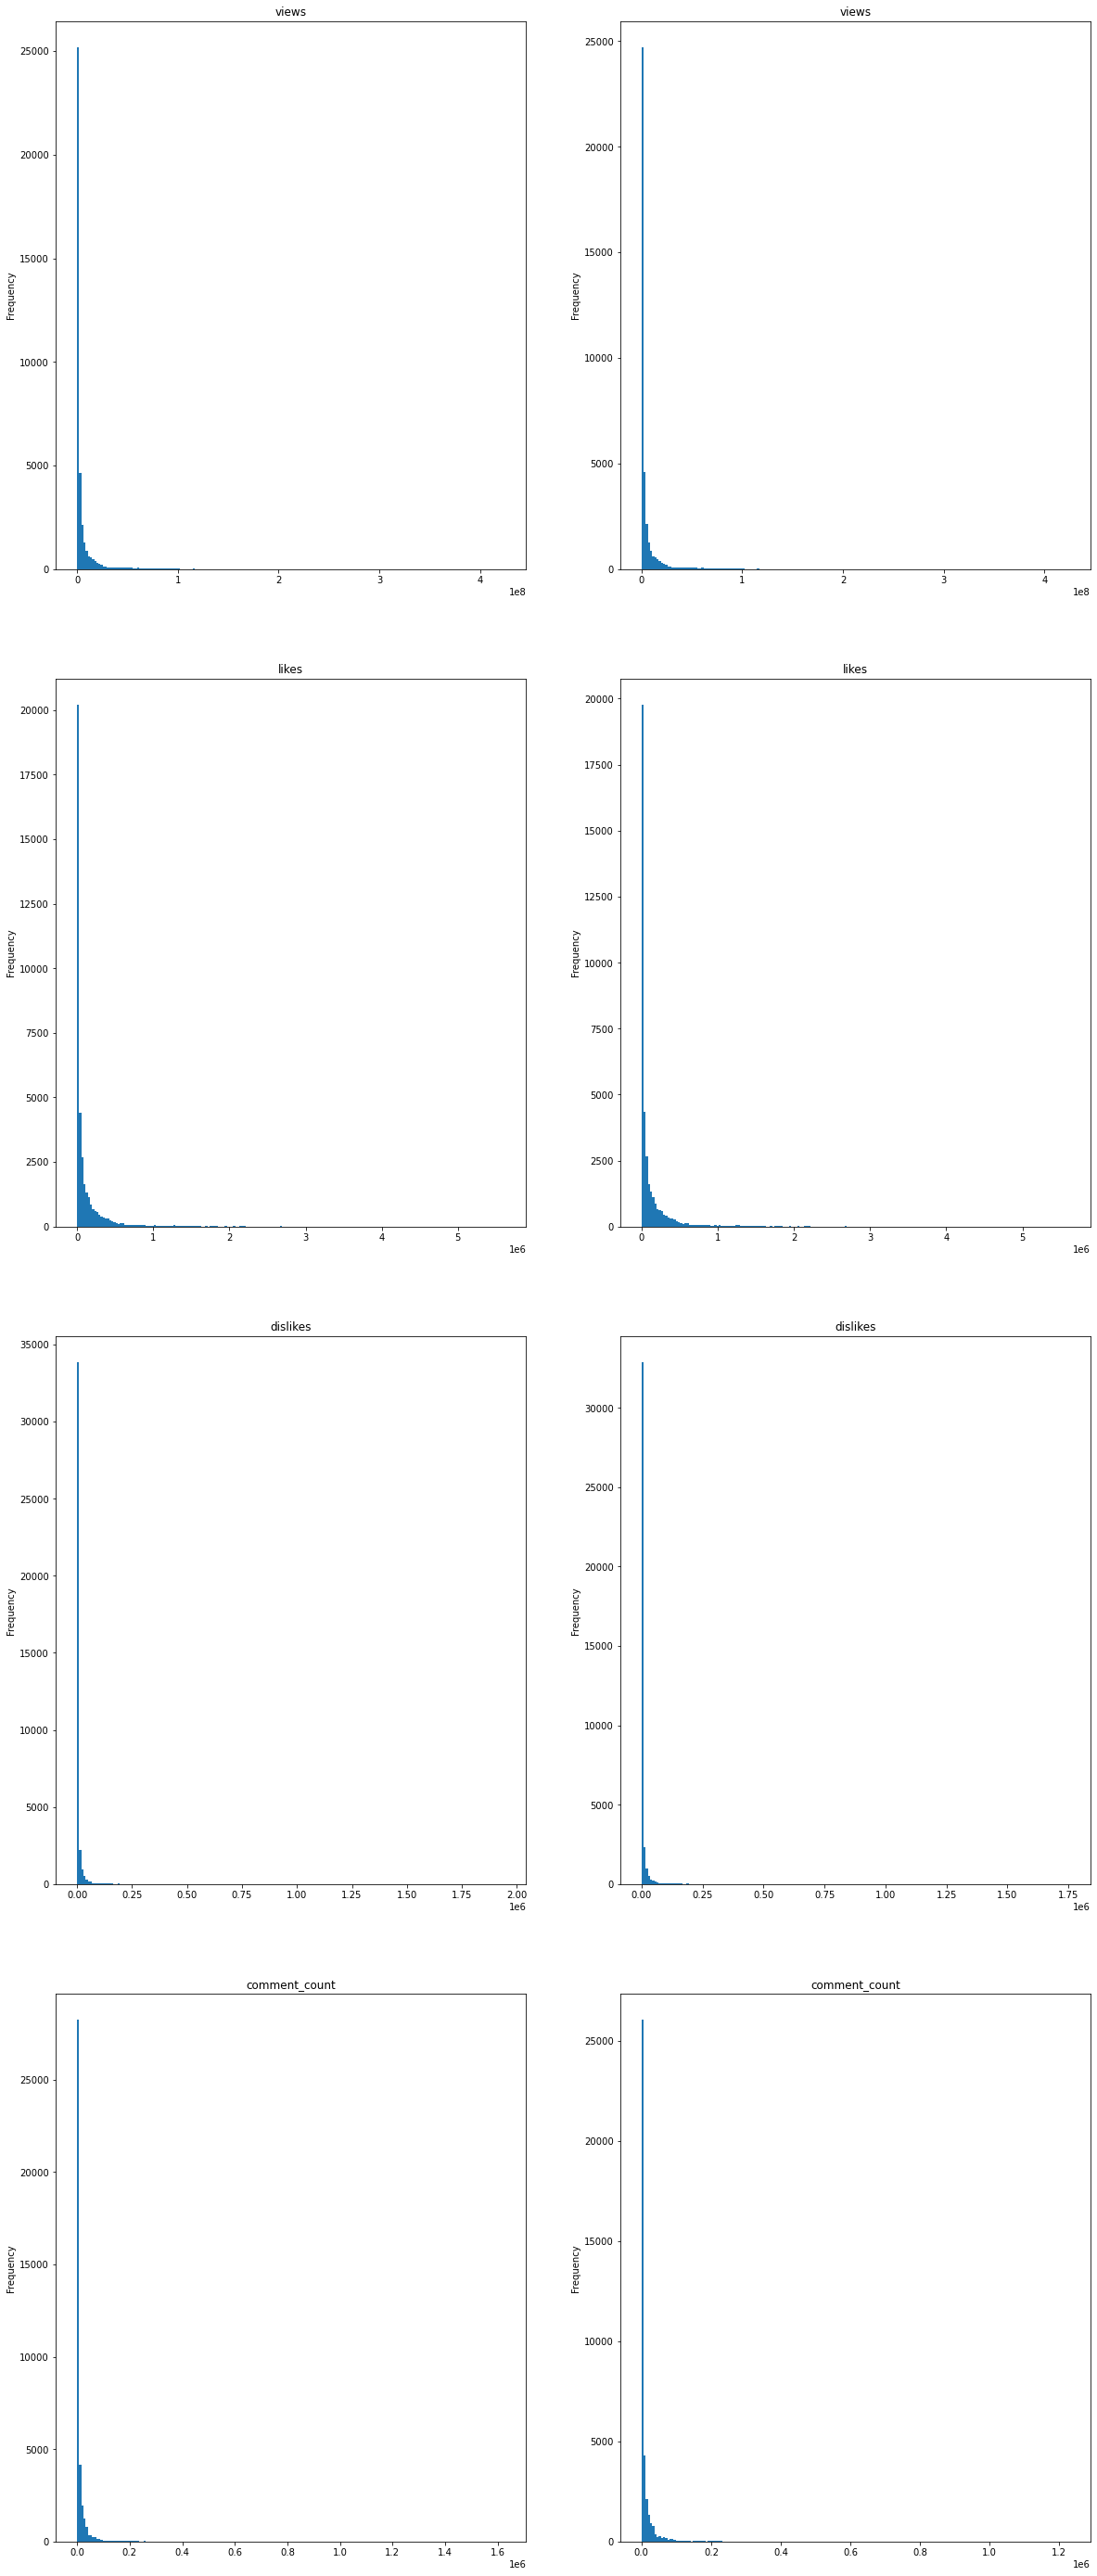

**********************************************************************************************************************************
在INvideos数据集中:


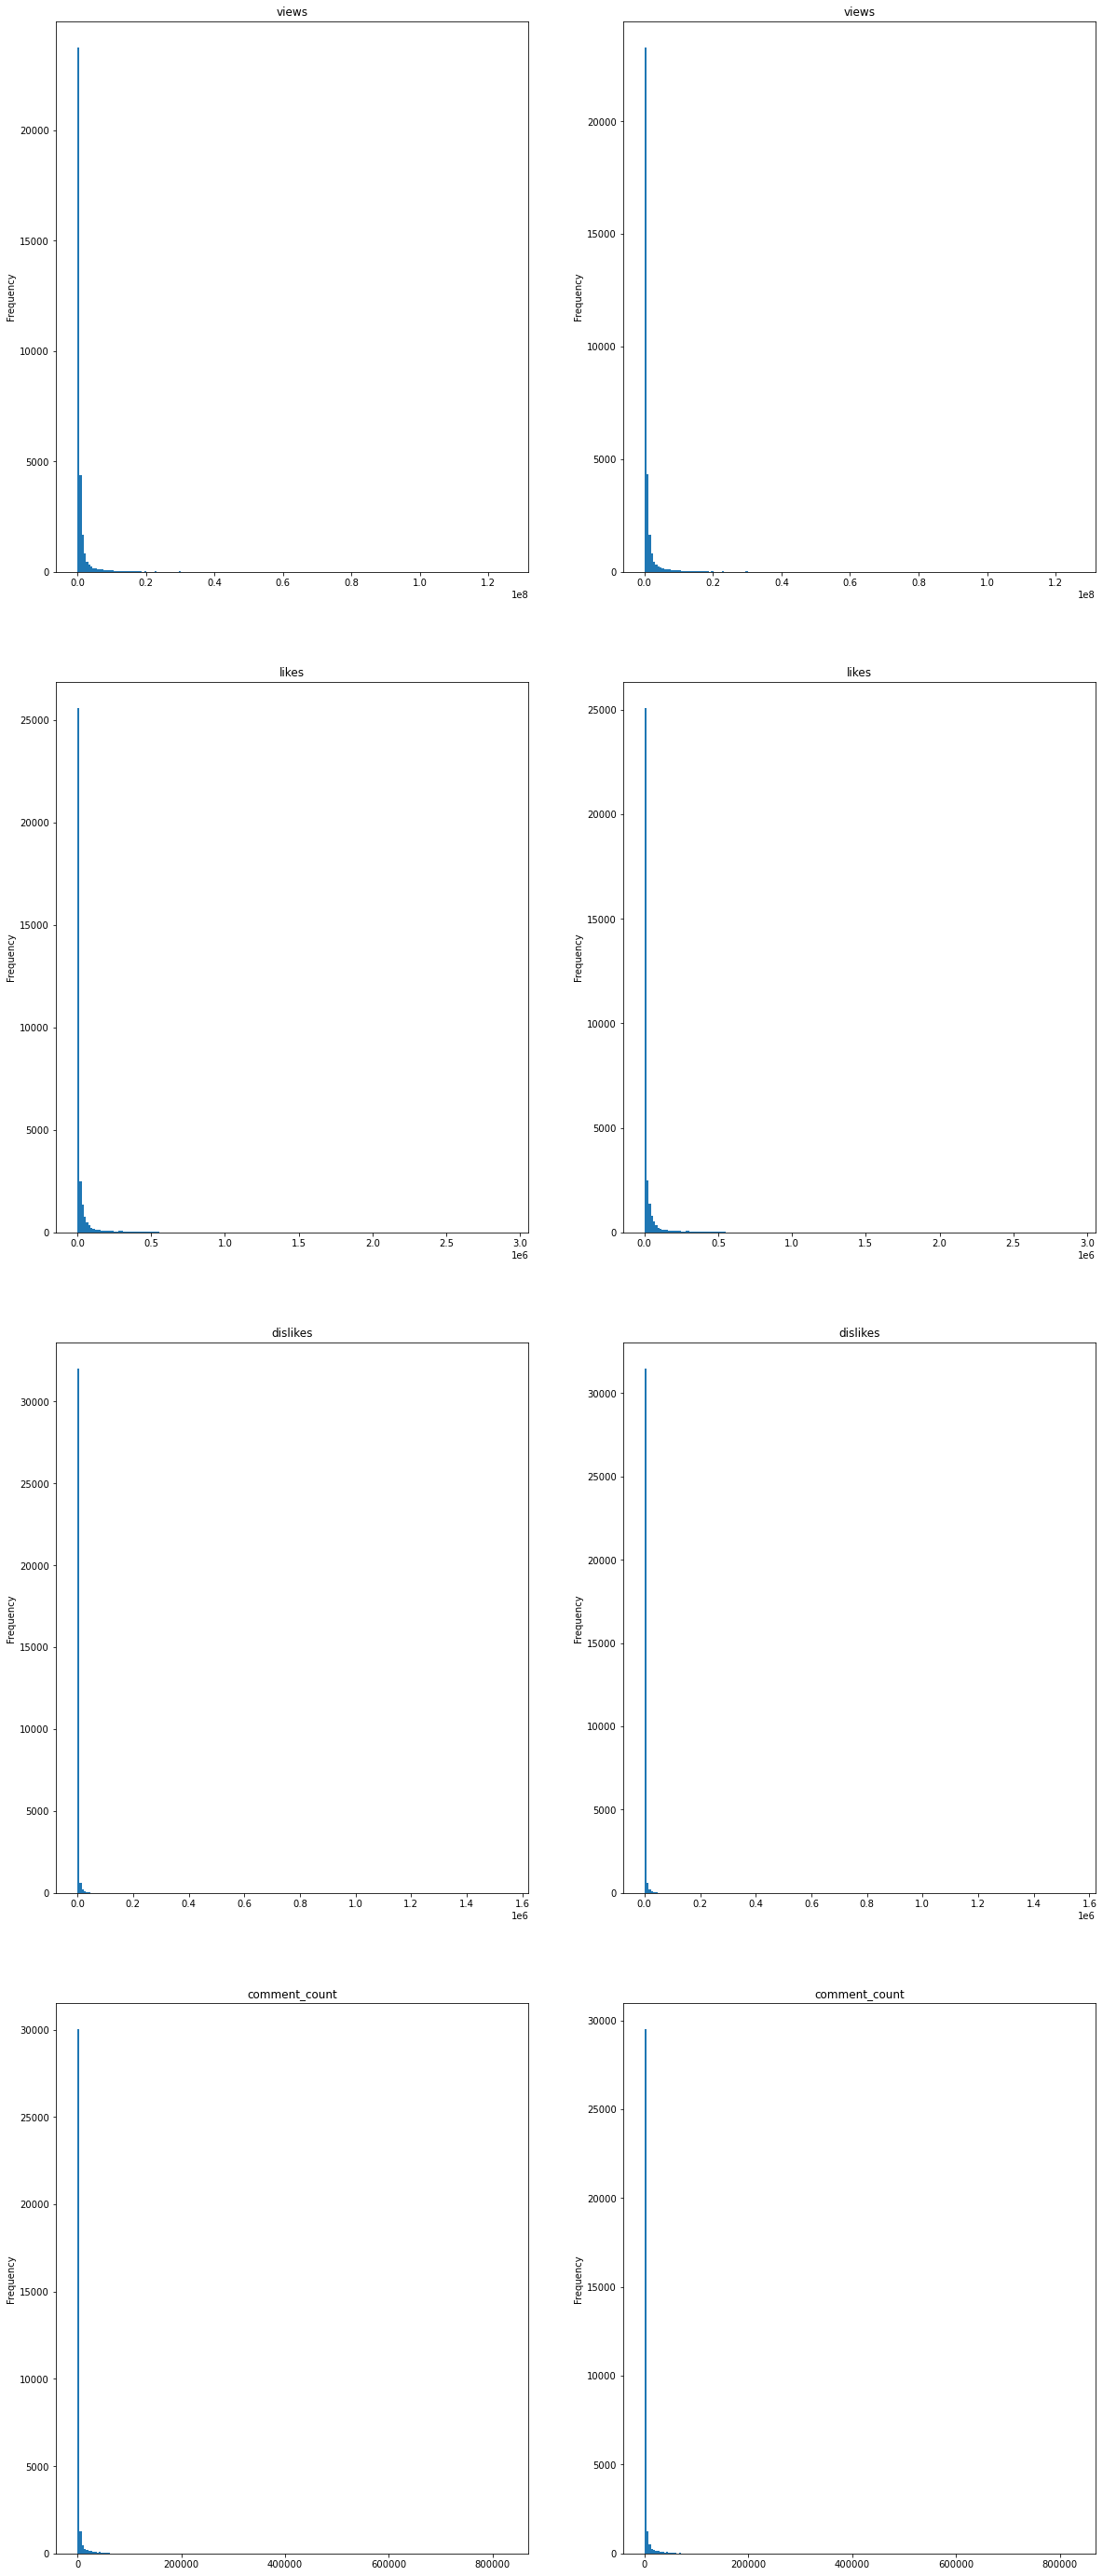

**********************************************************************************************************************************
在USvideos数据集中:


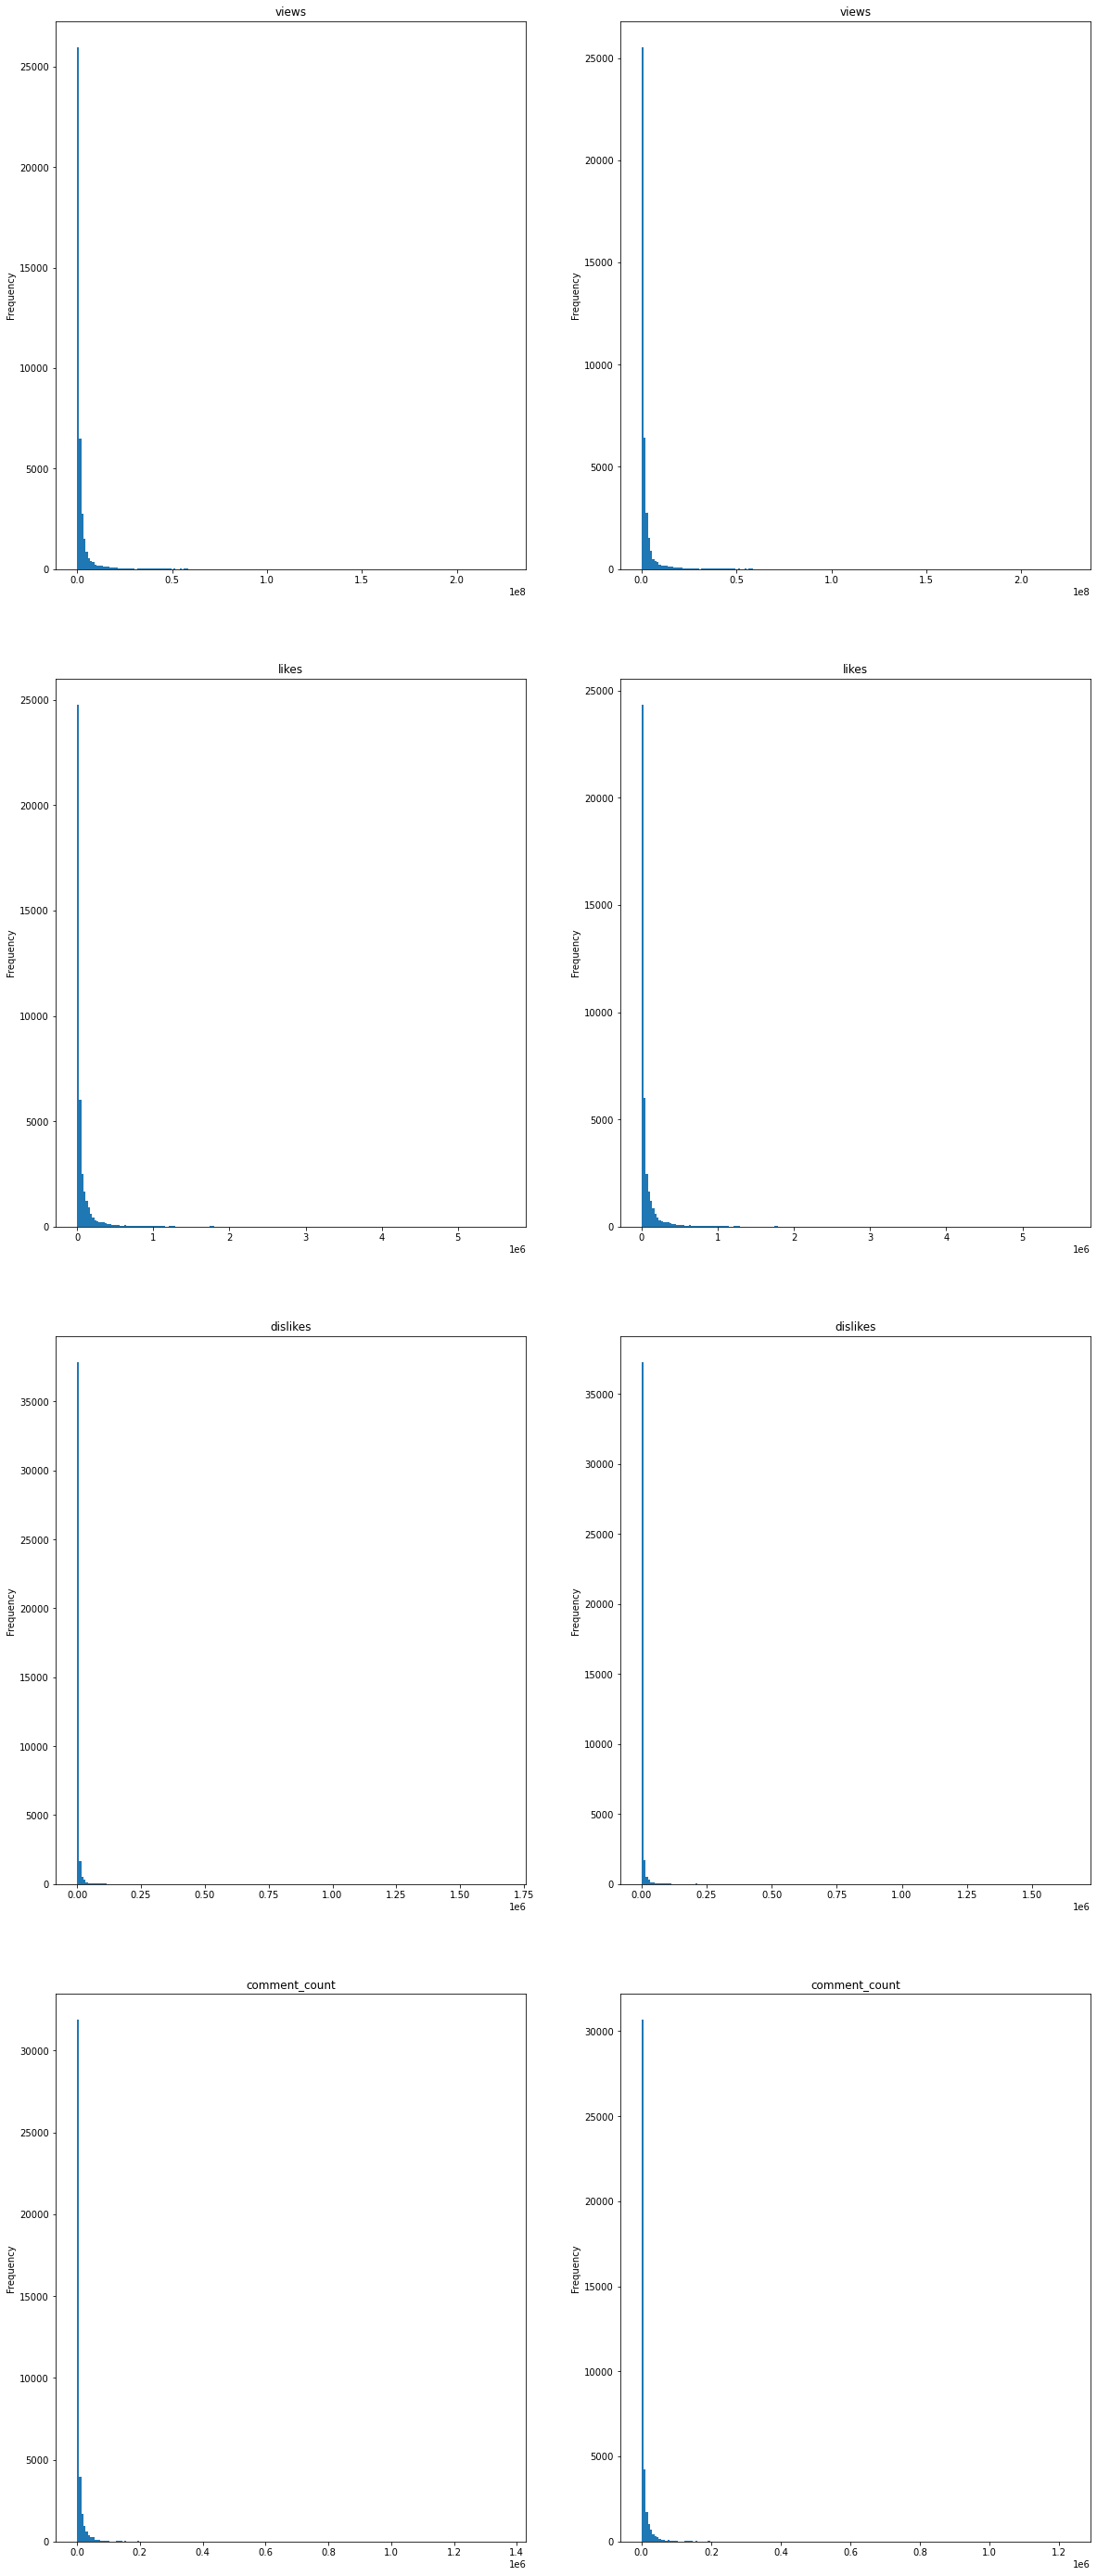

**********************************************************************************************************************************


In [15]:
for i in range(file_num):
    video_data_1 = video_dict[name_list[i]].dropna(axis=0,how='any')
    print(f"在{name_list[i]}数据集中:")
    compareNumberialDataHist(video_dict[name_list[i]], video_data_1, numeric_columns, figsize=(20, 50))
    plt.show()
    print('*' * 130)

在CAvideos数据集中:


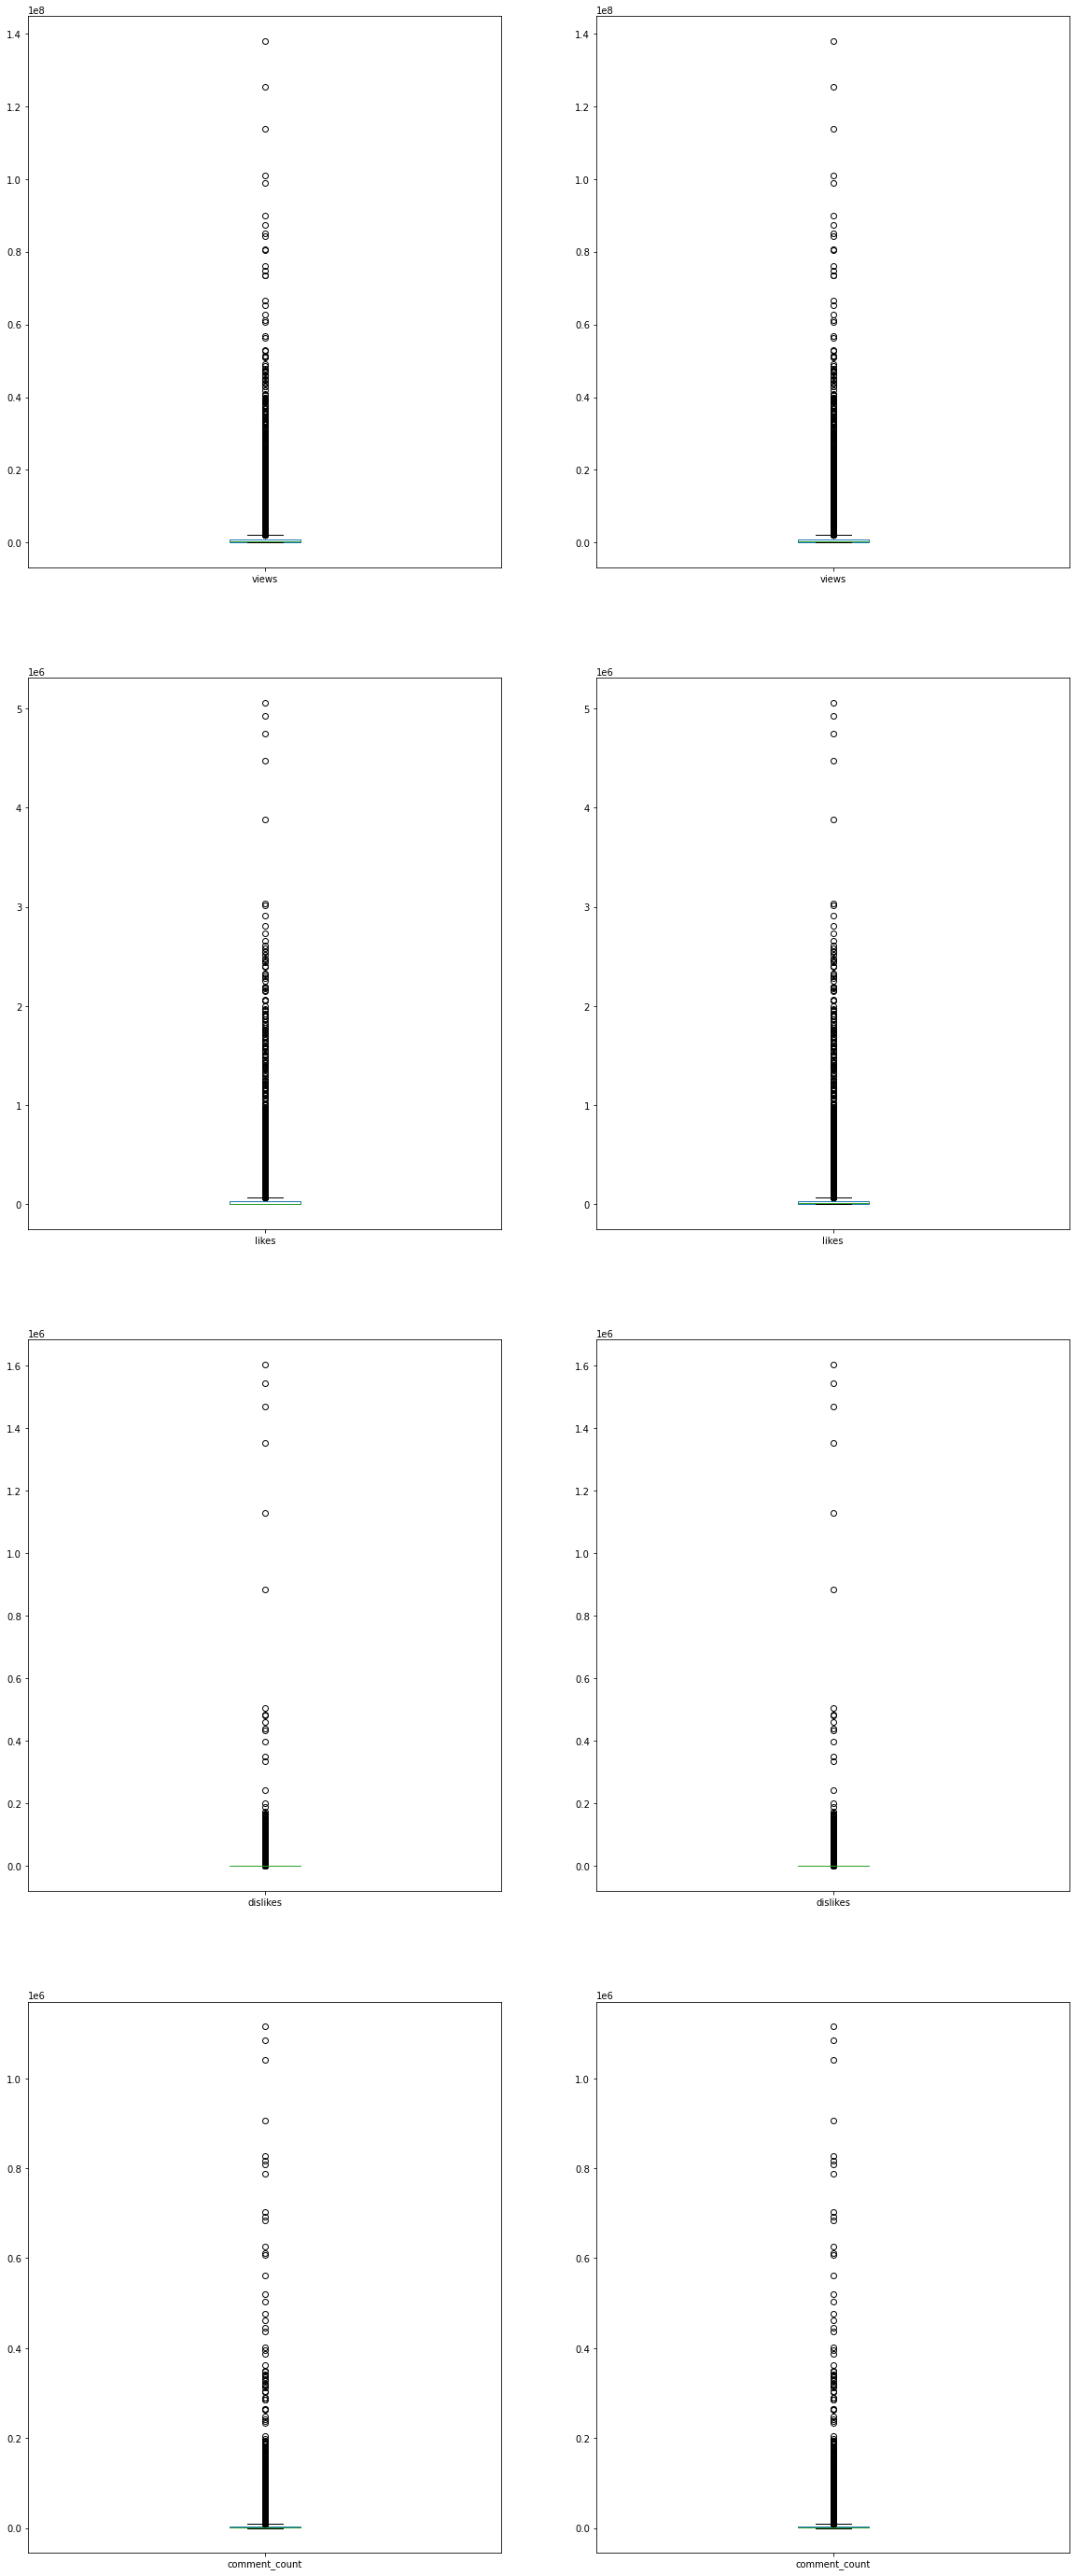

**********************************************************************************************************************************
在DEvideos数据集中:


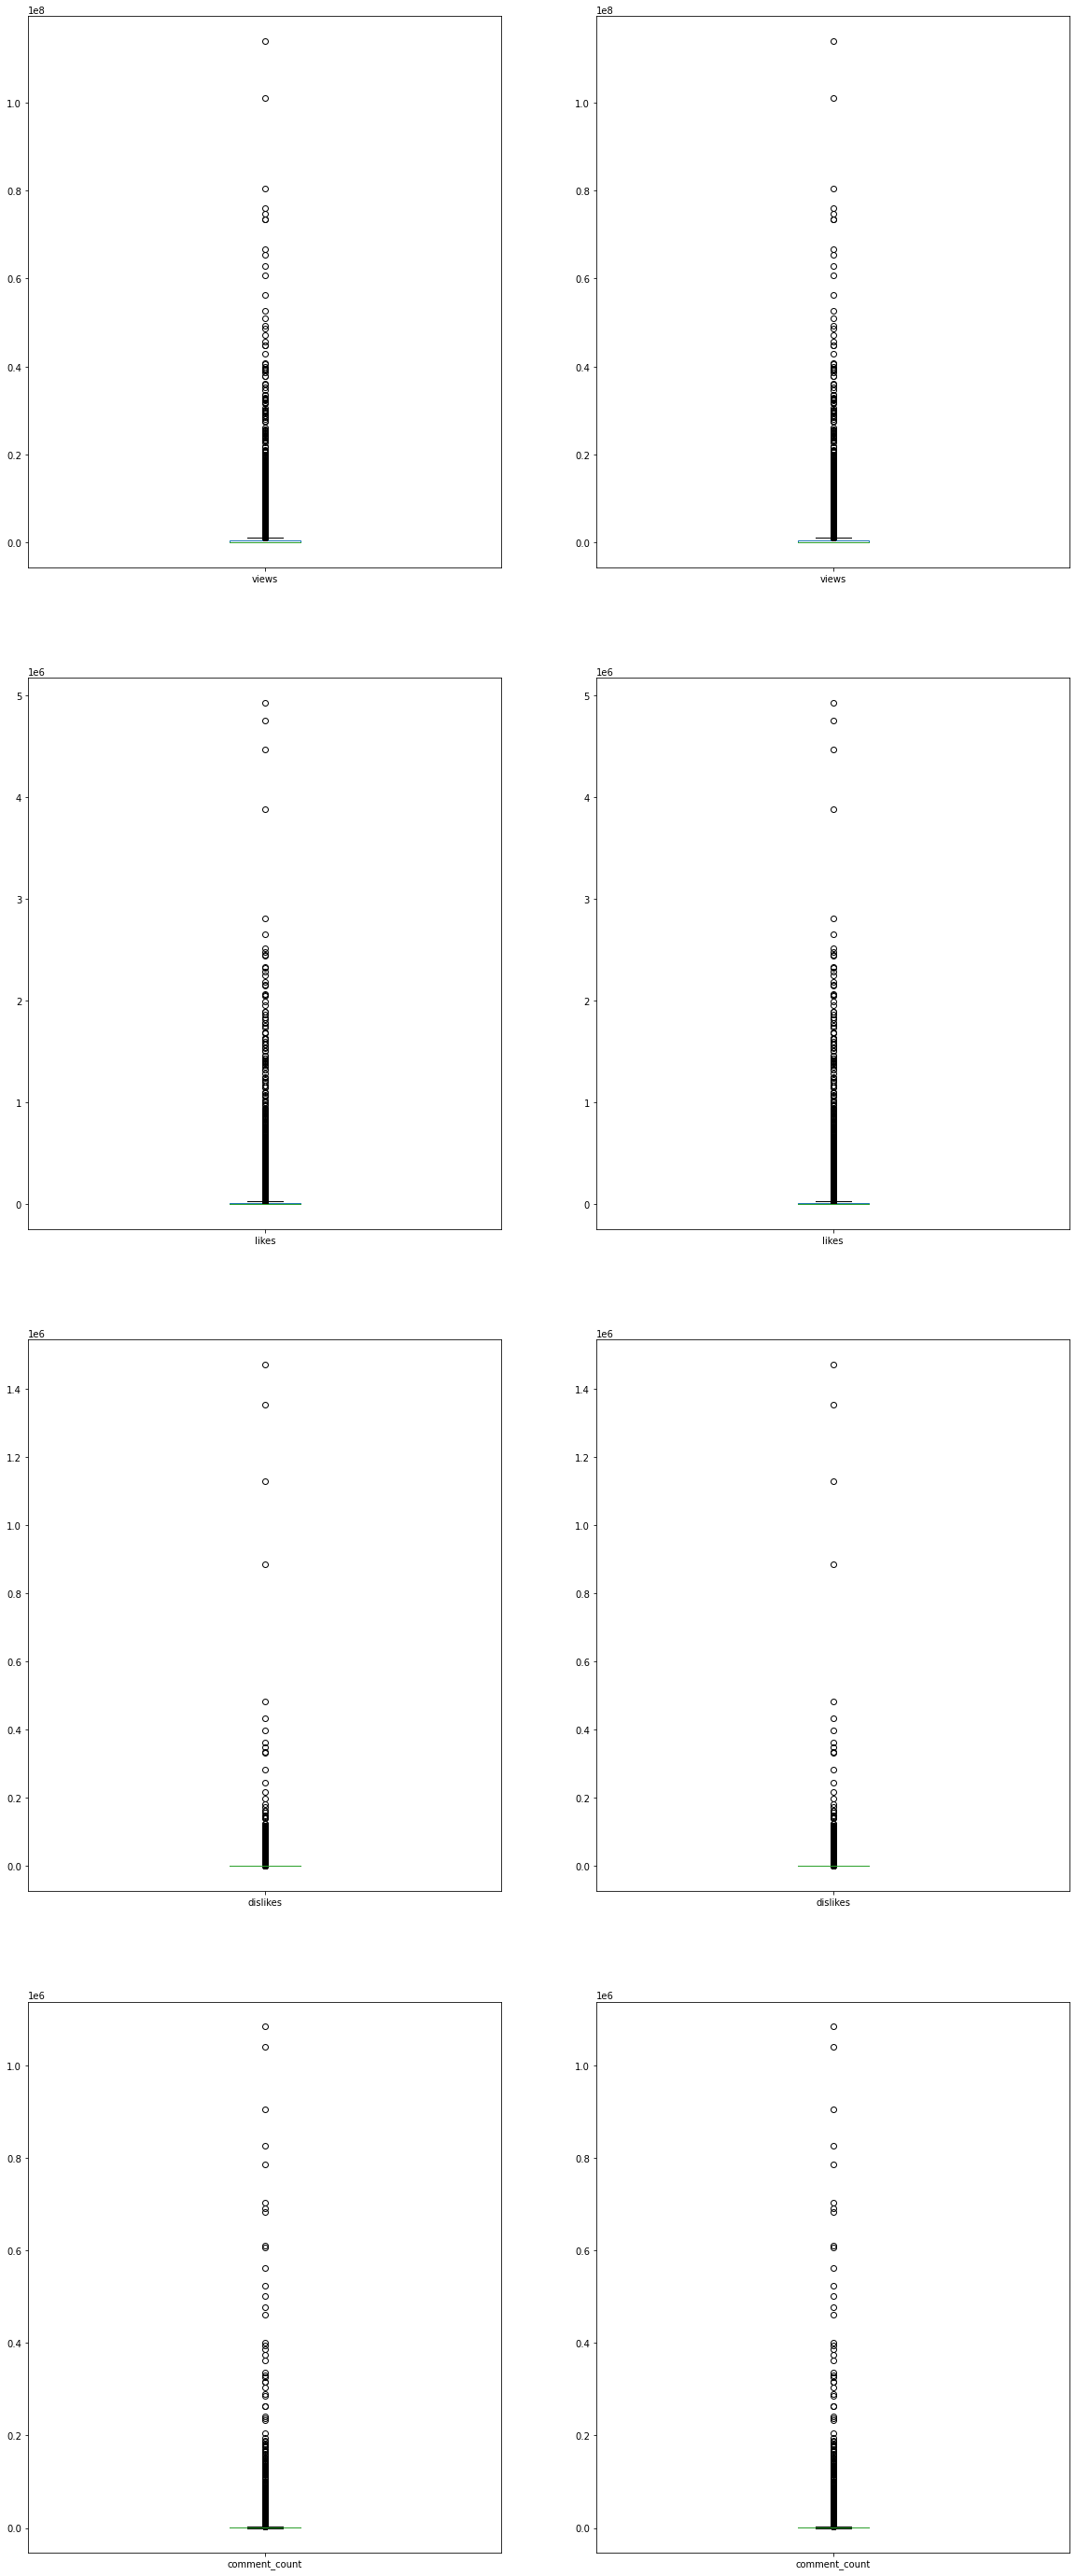

**********************************************************************************************************************************
在FRvideos数据集中:


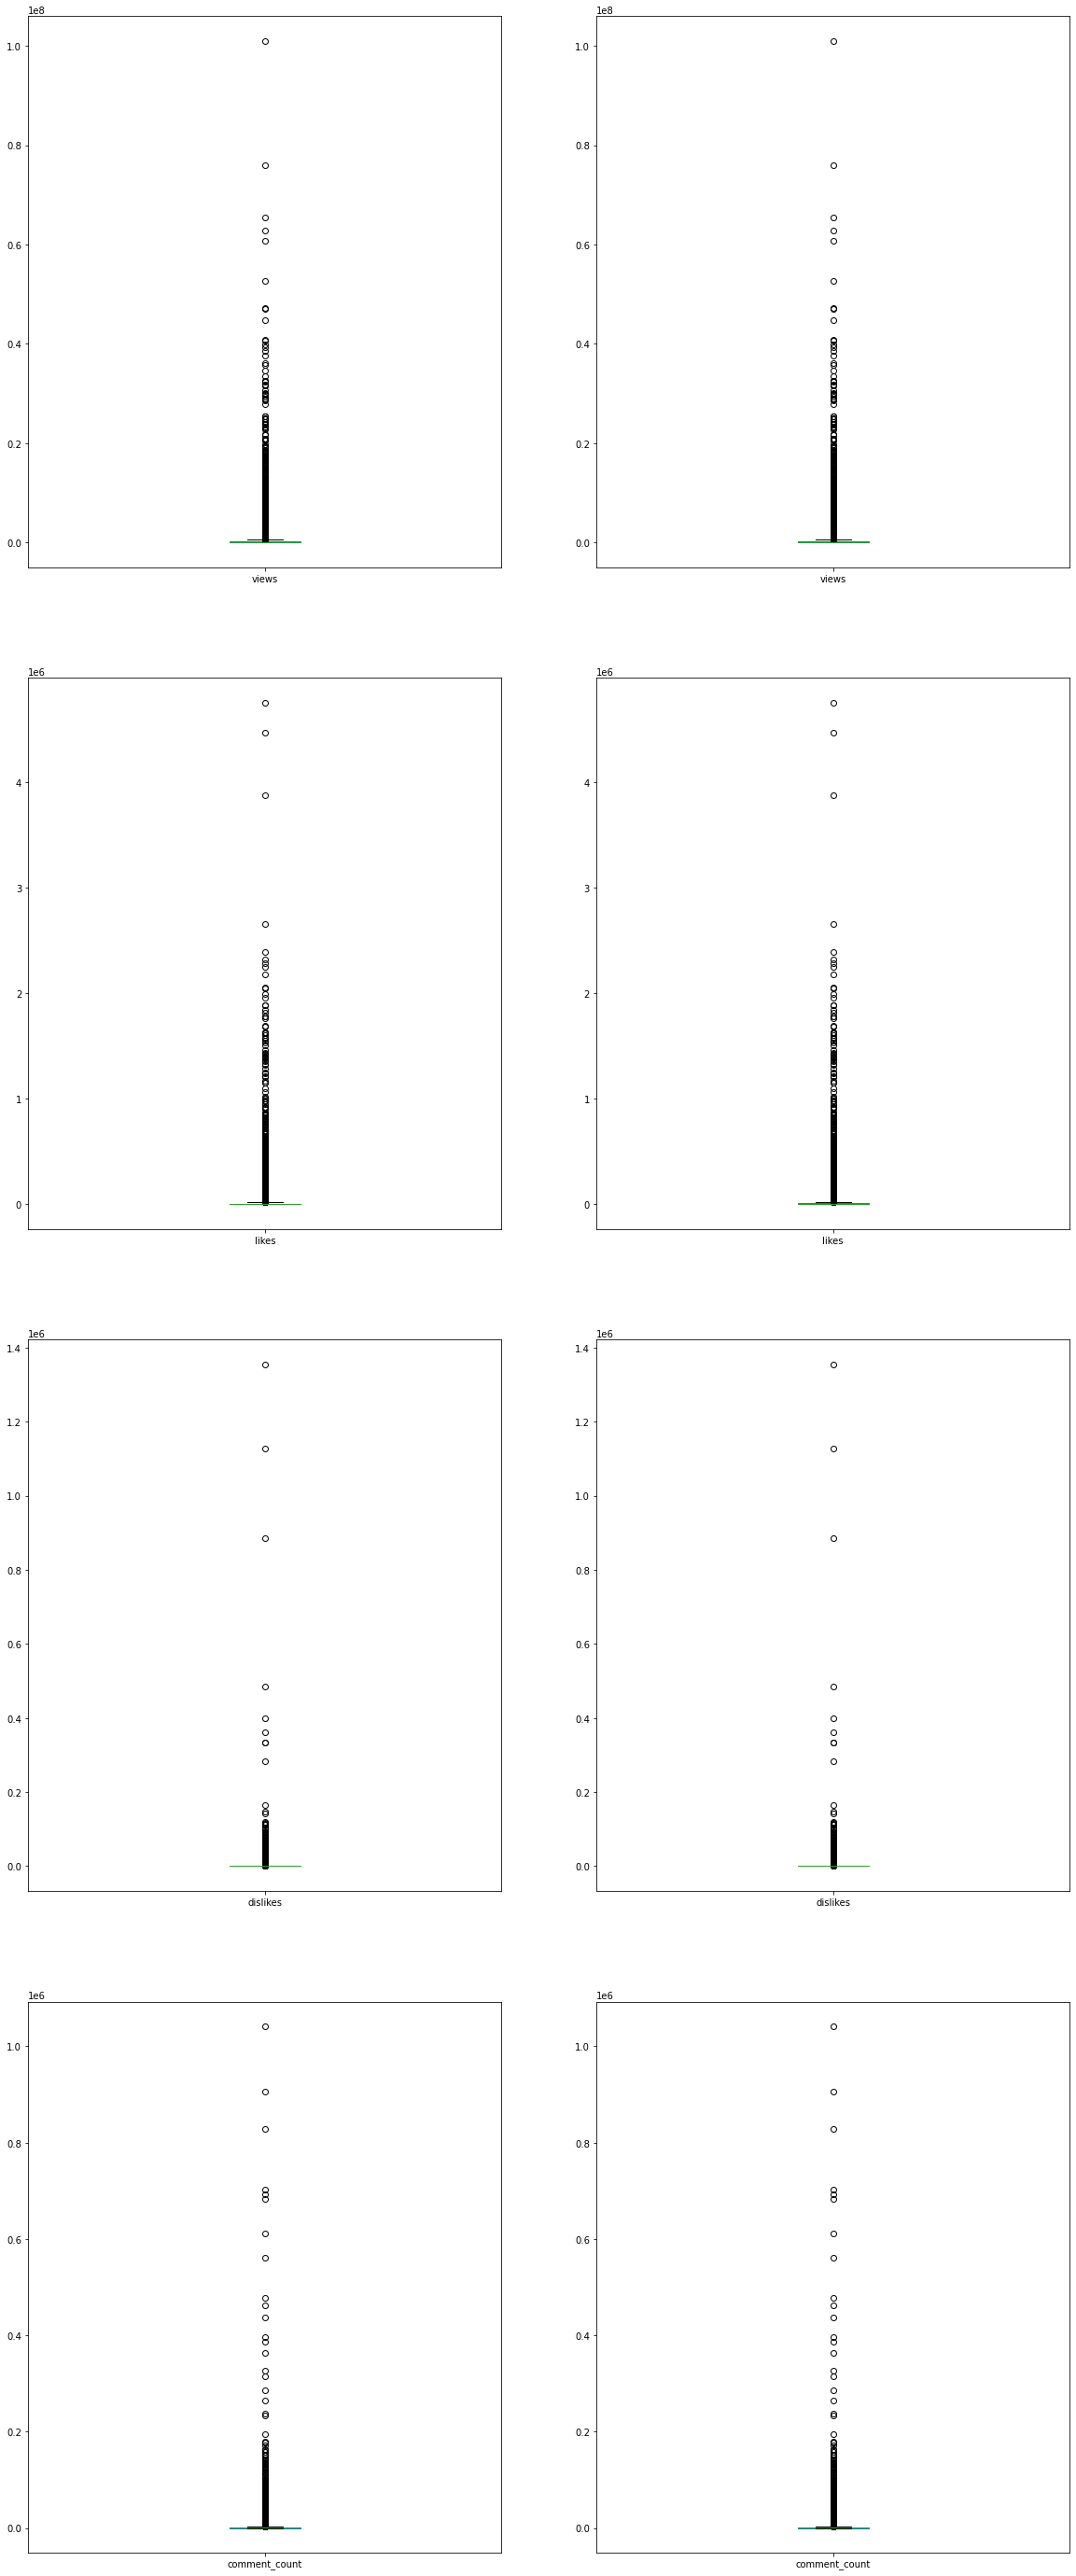

**********************************************************************************************************************************
在GBvideos数据集中:


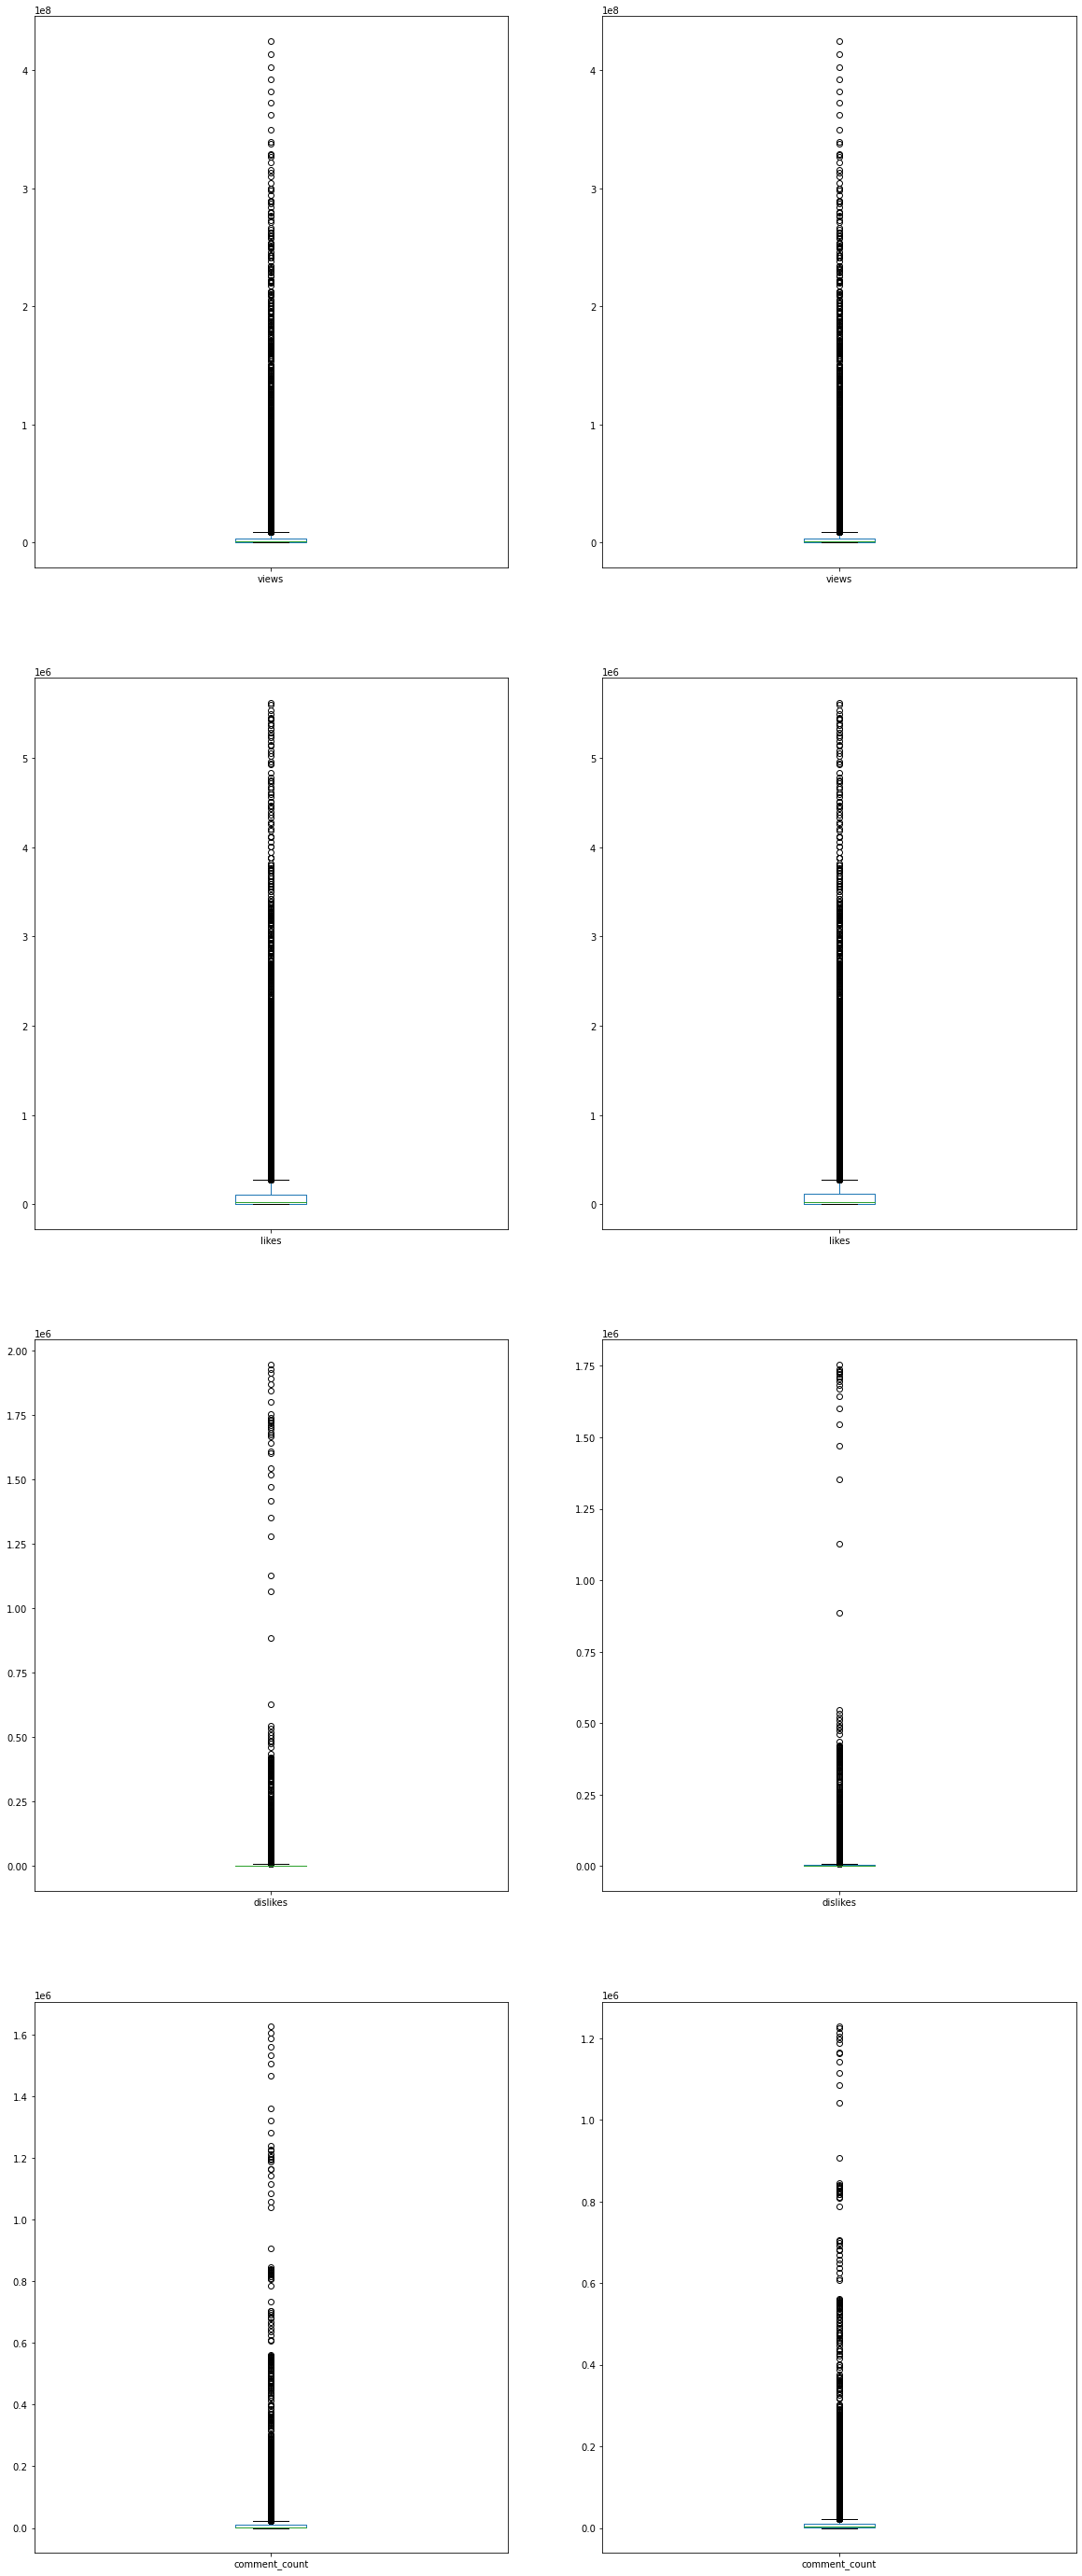

**********************************************************************************************************************************
在INvideos数据集中:


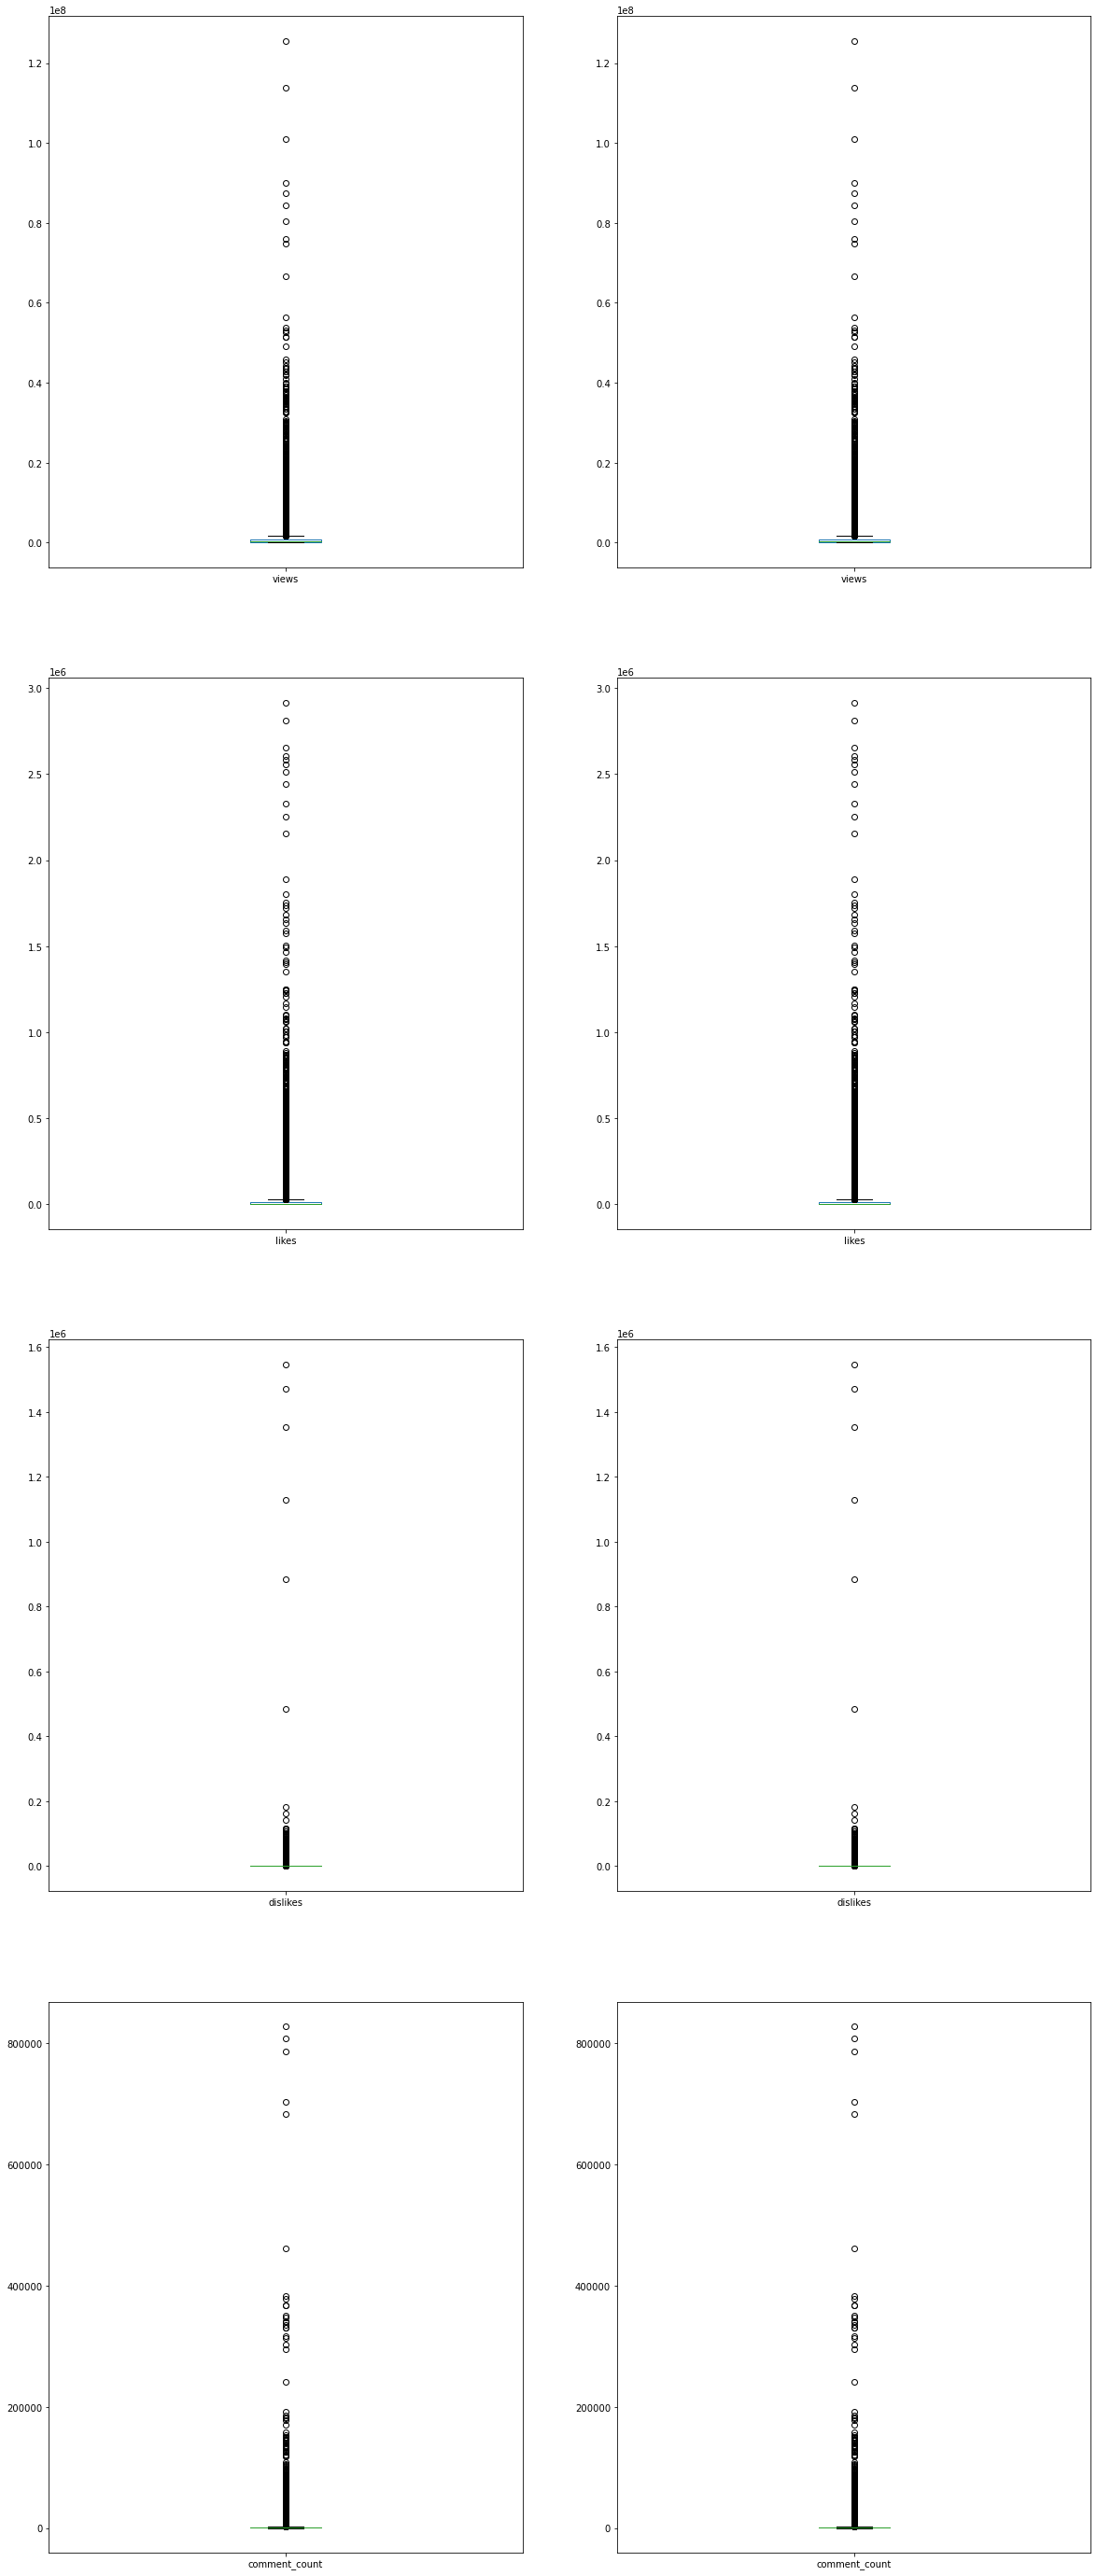

**********************************************************************************************************************************
在USvideos数据集中:


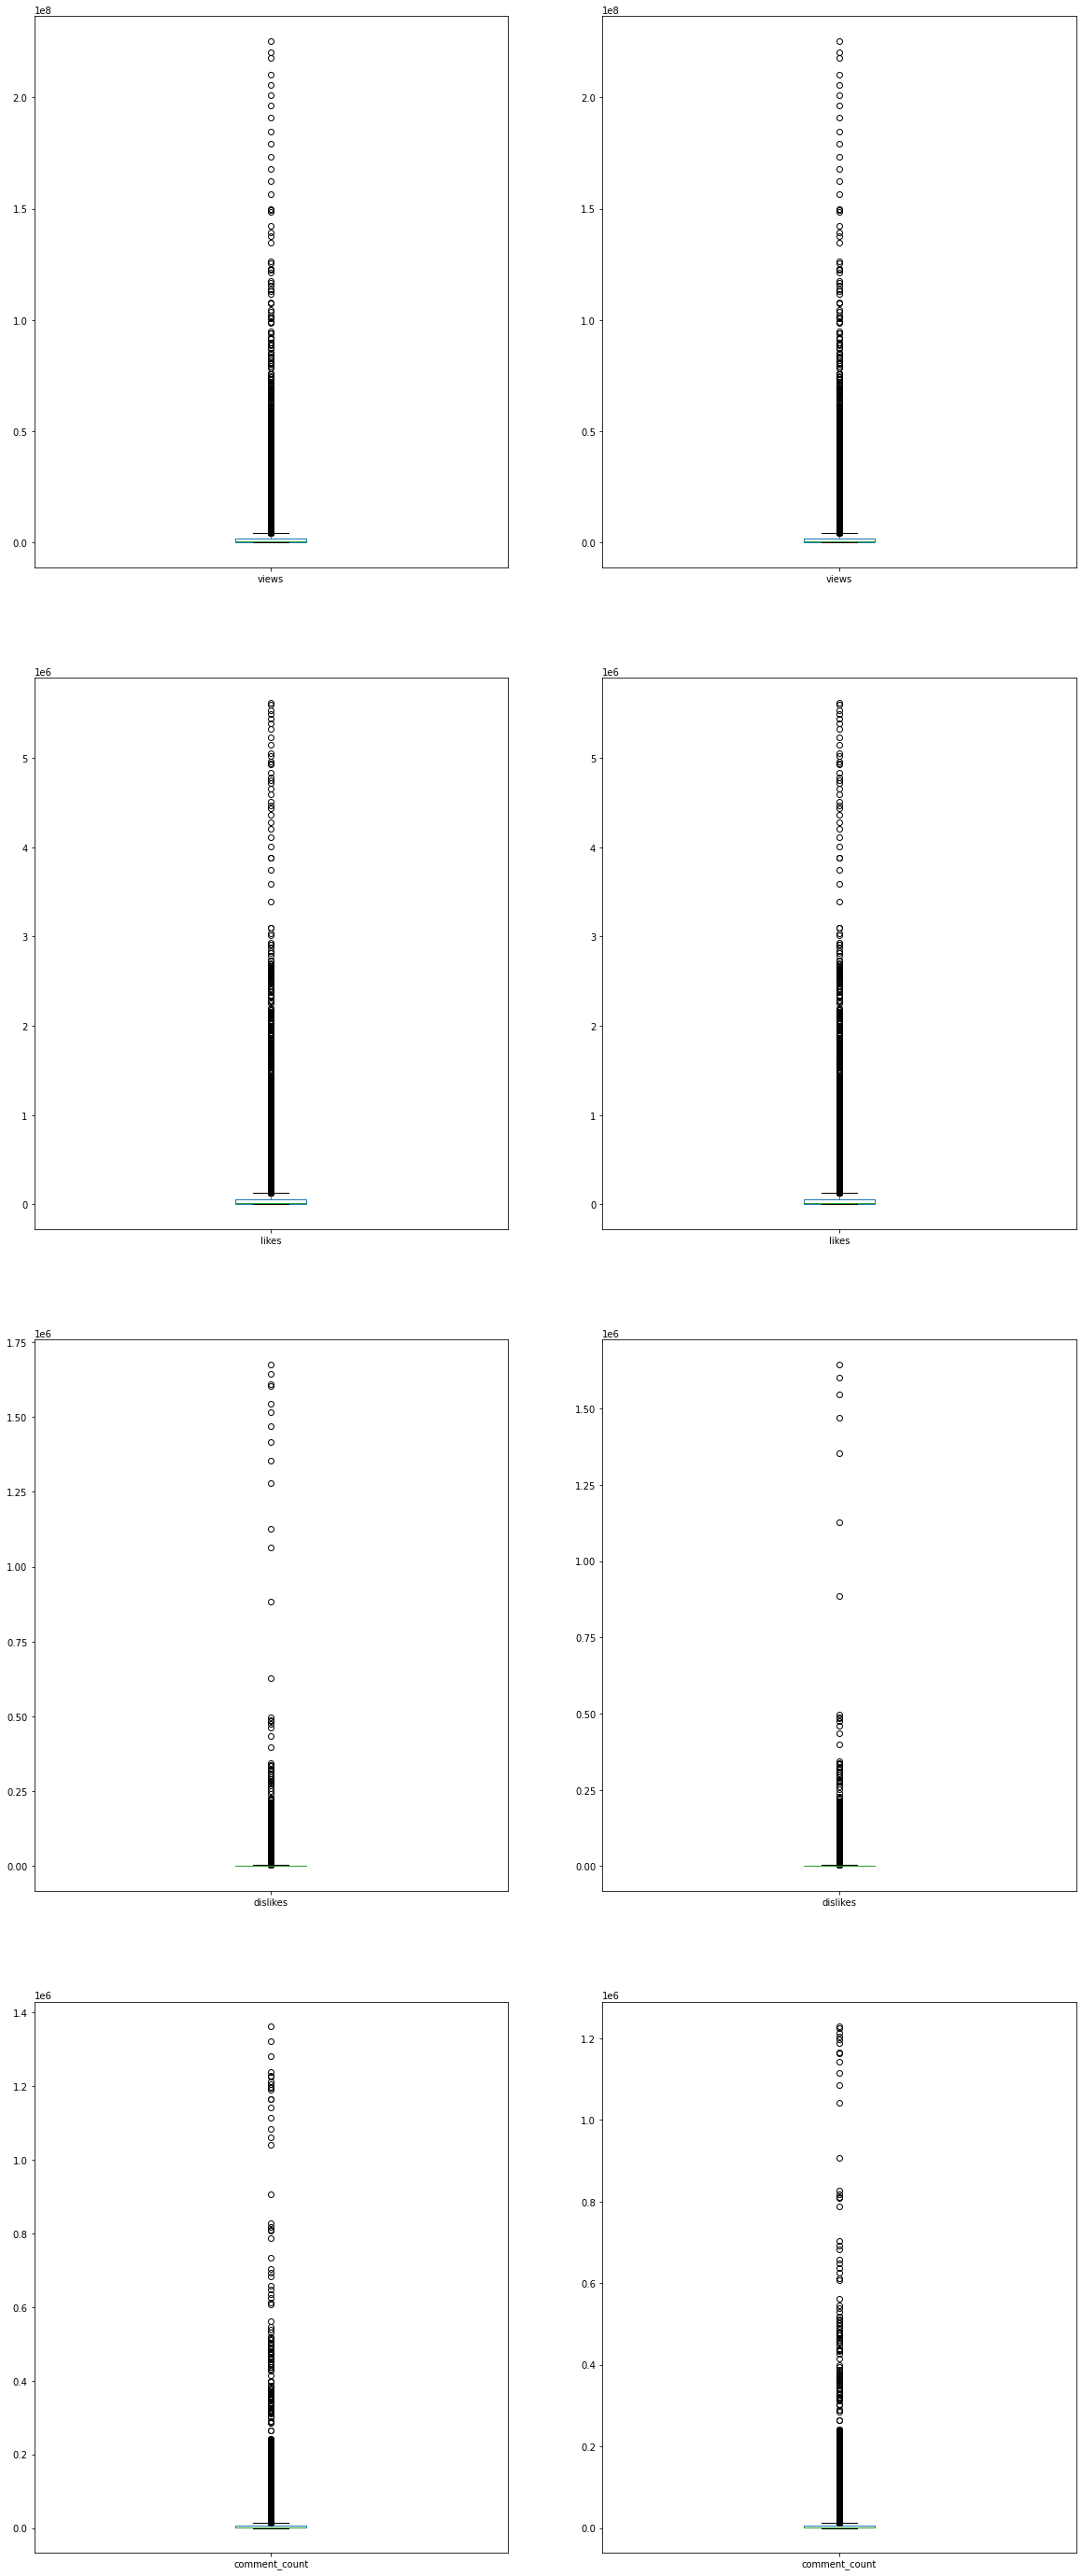

**********************************************************************************************************************************


In [16]:
for i in range(file_num):
    video_data_1 = video_dict[name_list[i]].dropna(axis=0,how='any')
    print(f"在{name_list[i]}数据集中:")
    compareNumberialDataBox(video_dict[name_list[i]], video_data_1, numeric_columns, figsize=(20, 50))
    plt.show()
    print('*' * 130)

在CAvideos数据集中:


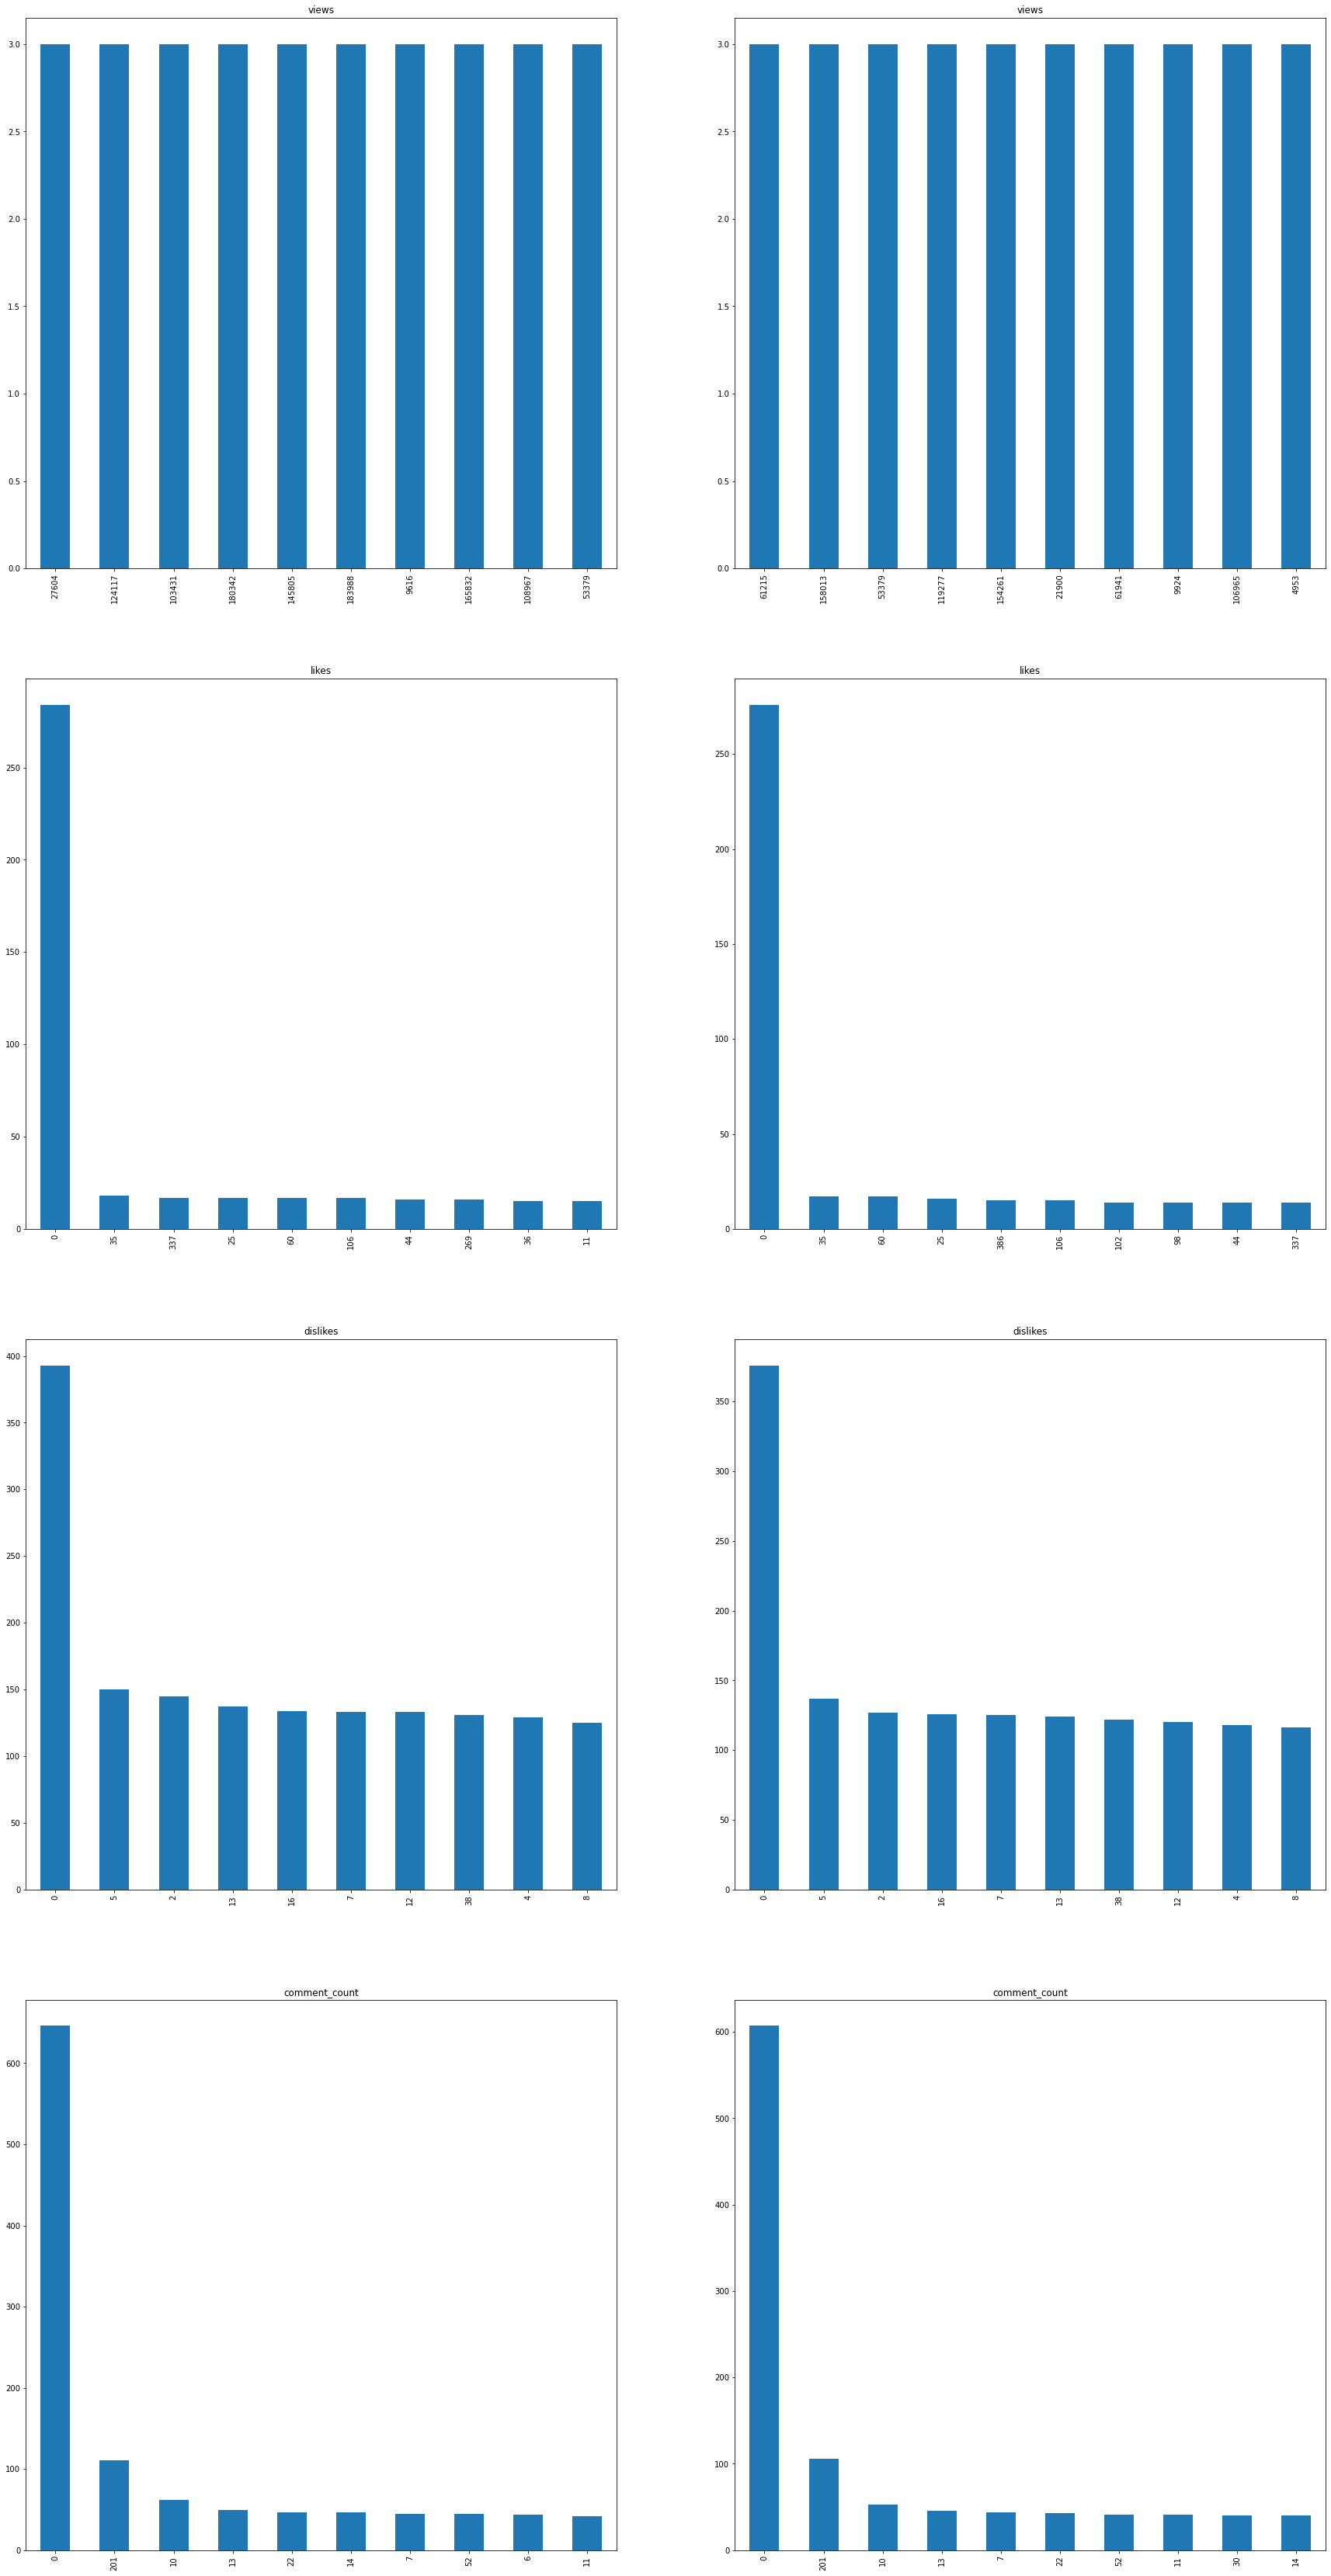

**********************************************************************************************************************************
在DEvideos数据集中:


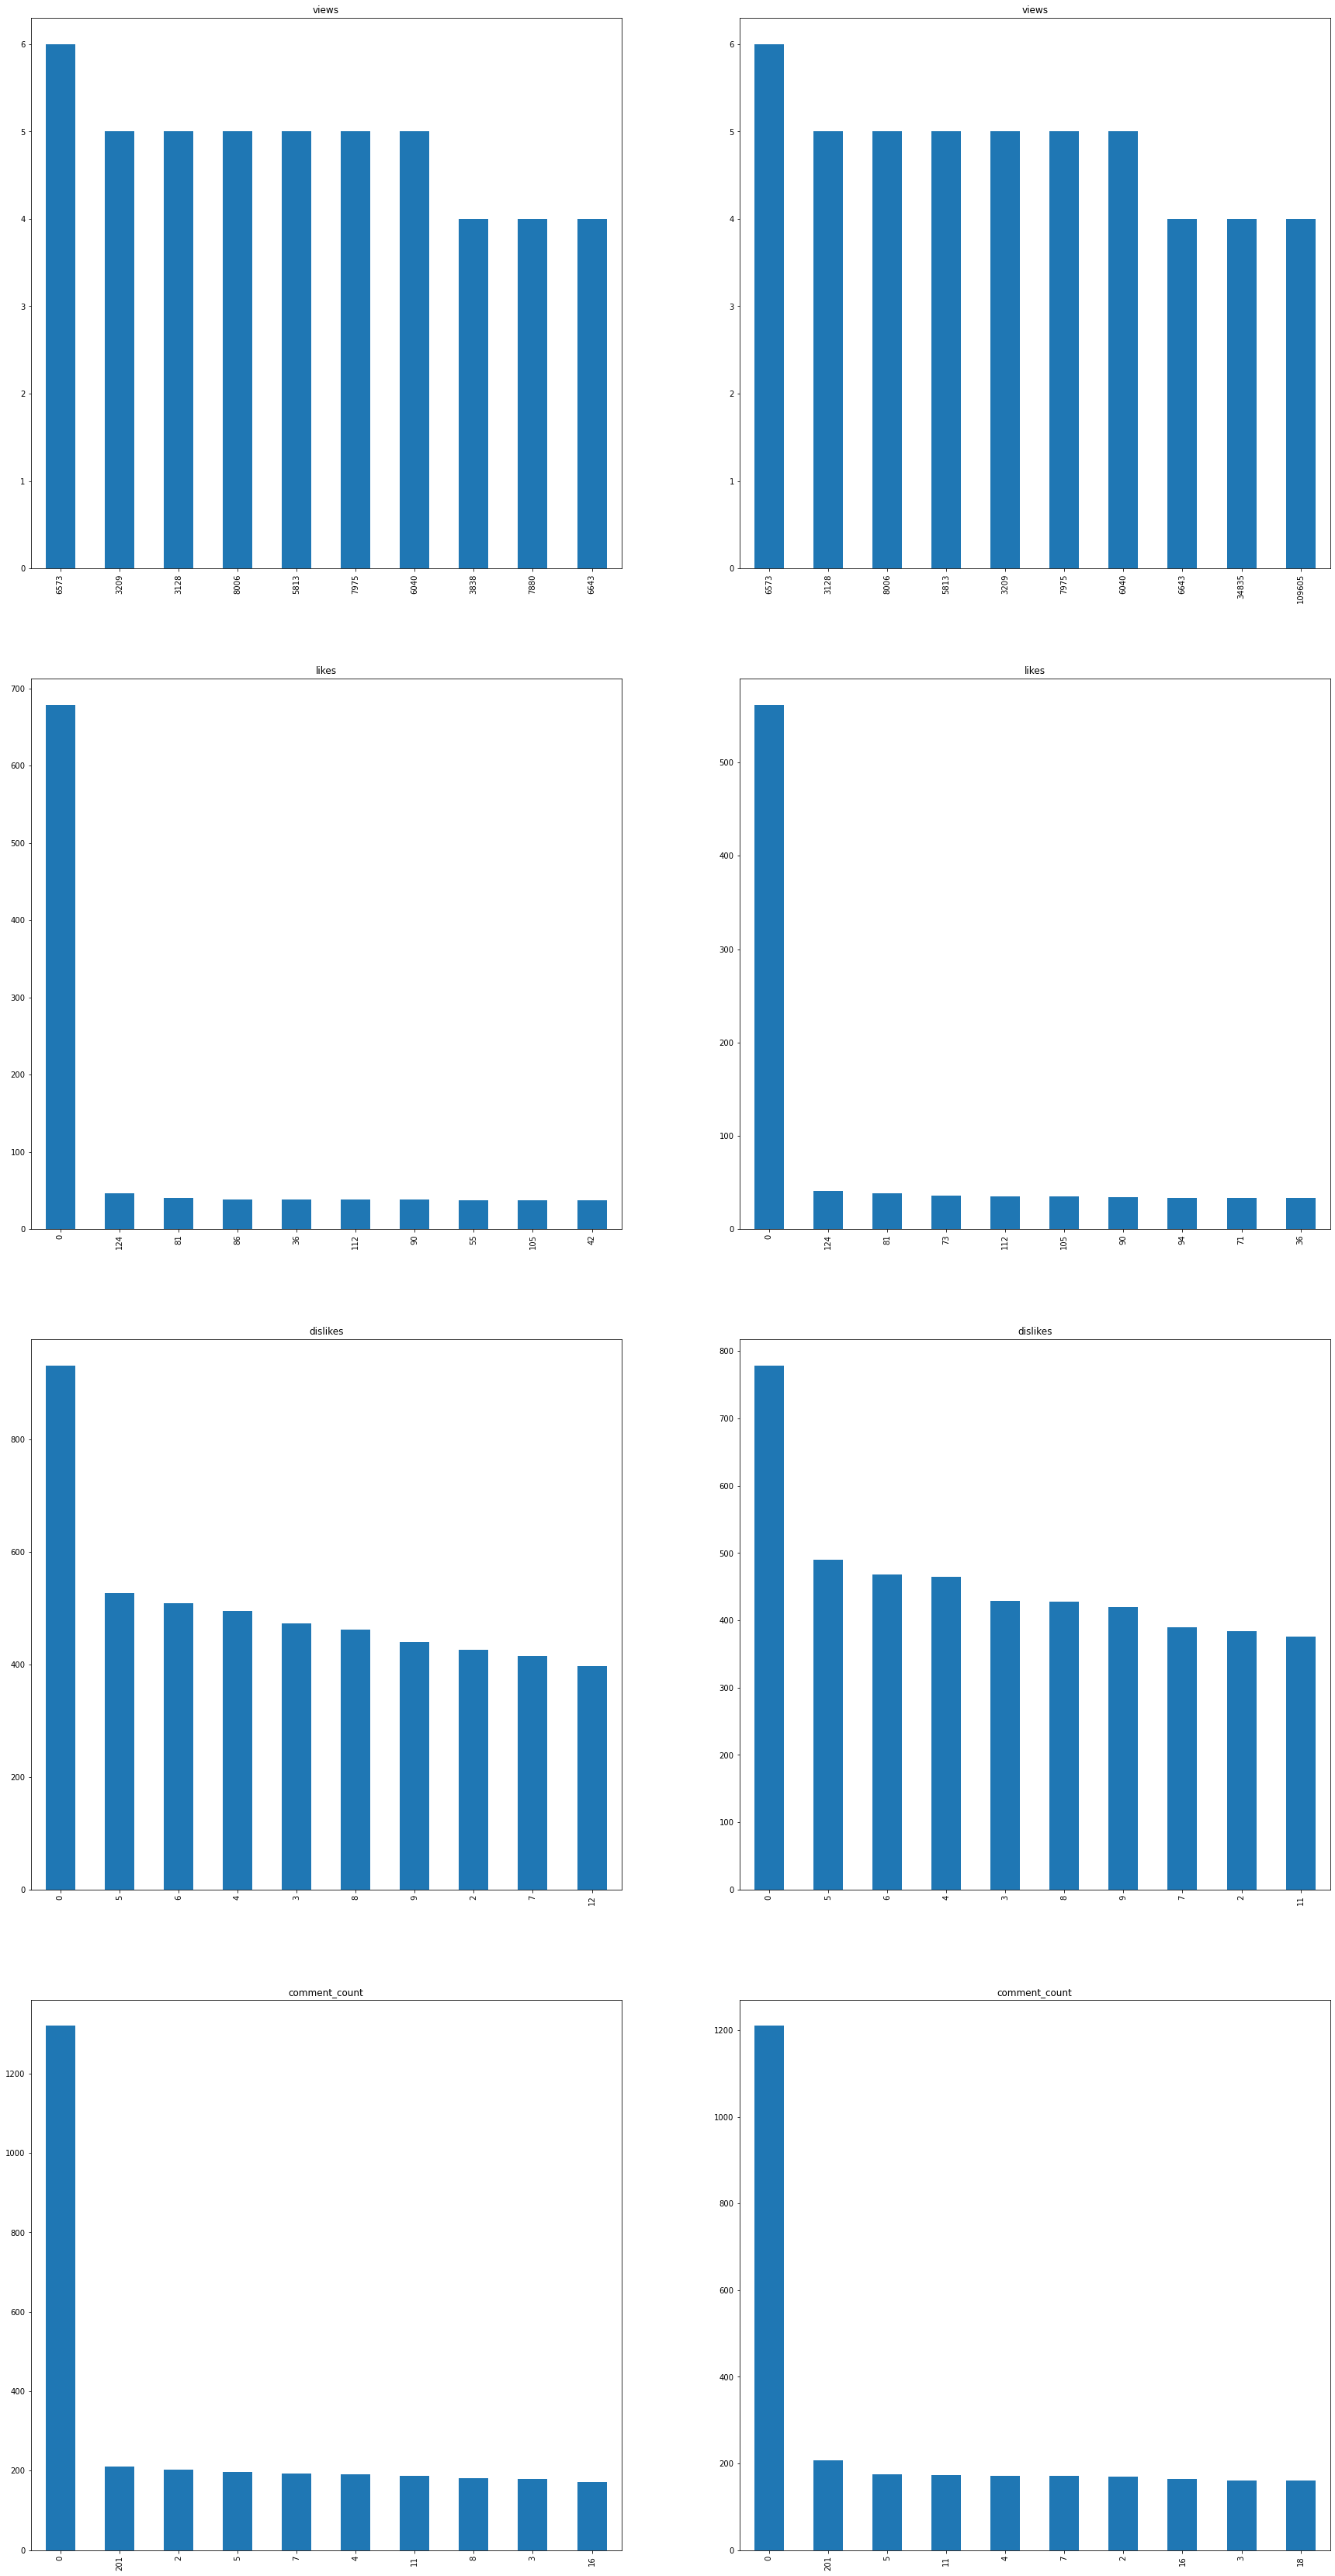

**********************************************************************************************************************************
在FRvideos数据集中:


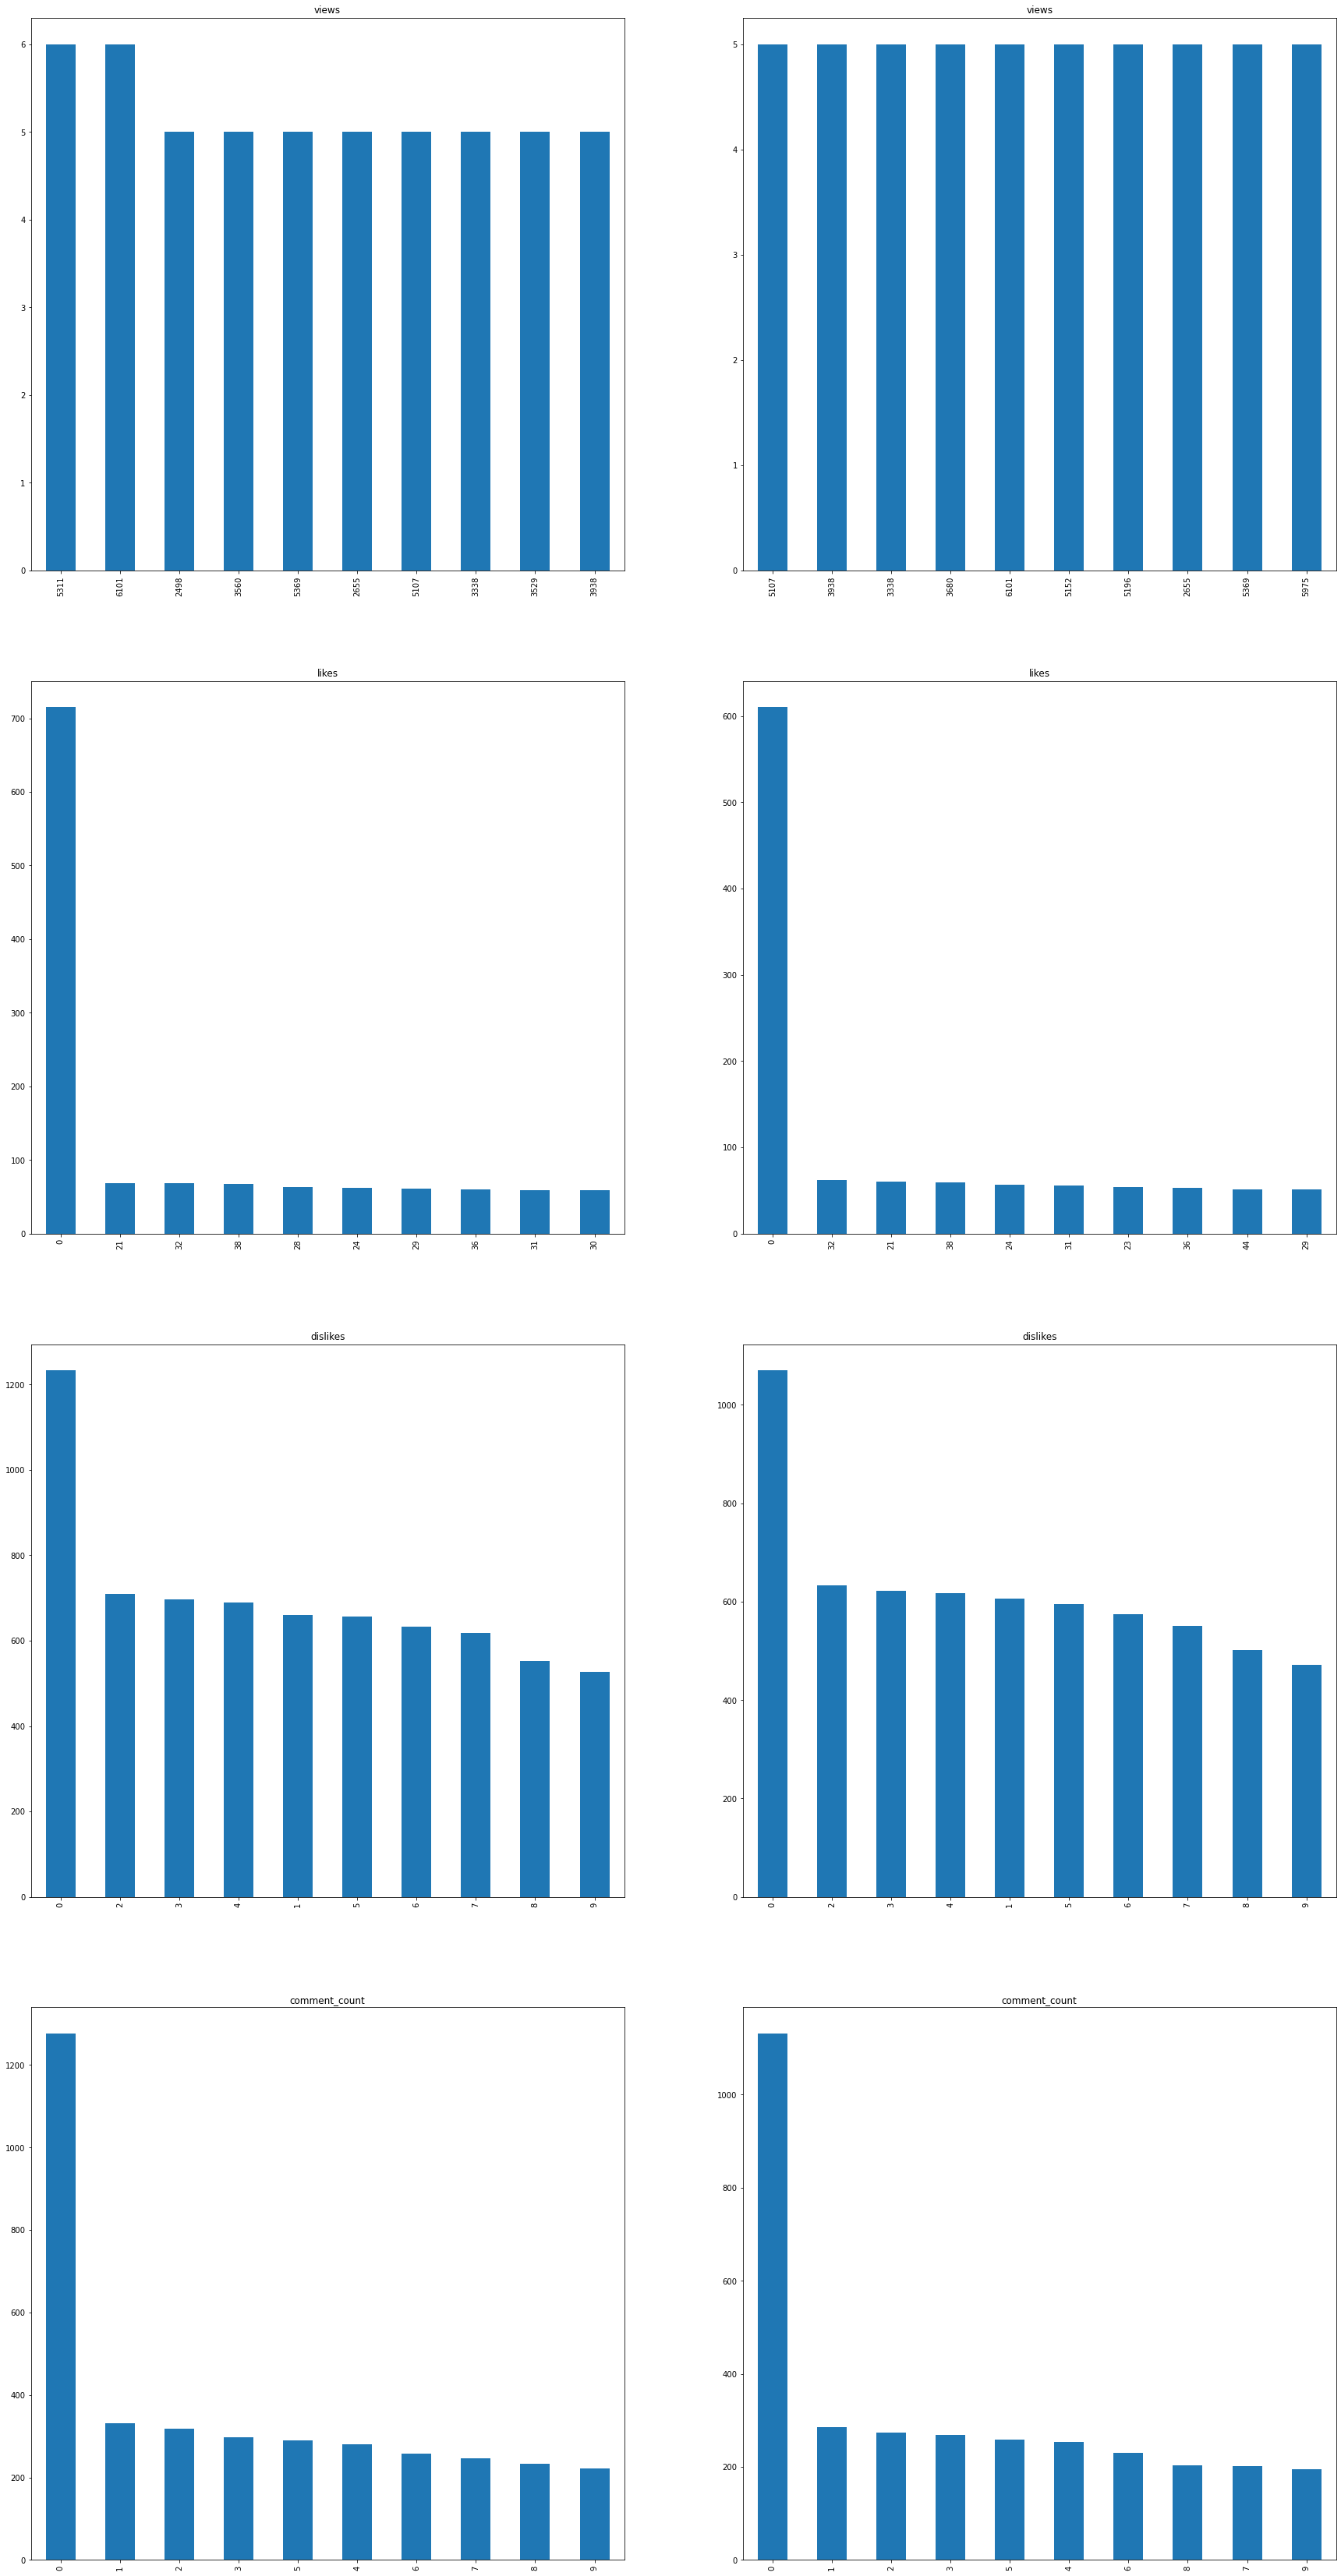

**********************************************************************************************************************************
在GBvideos数据集中:


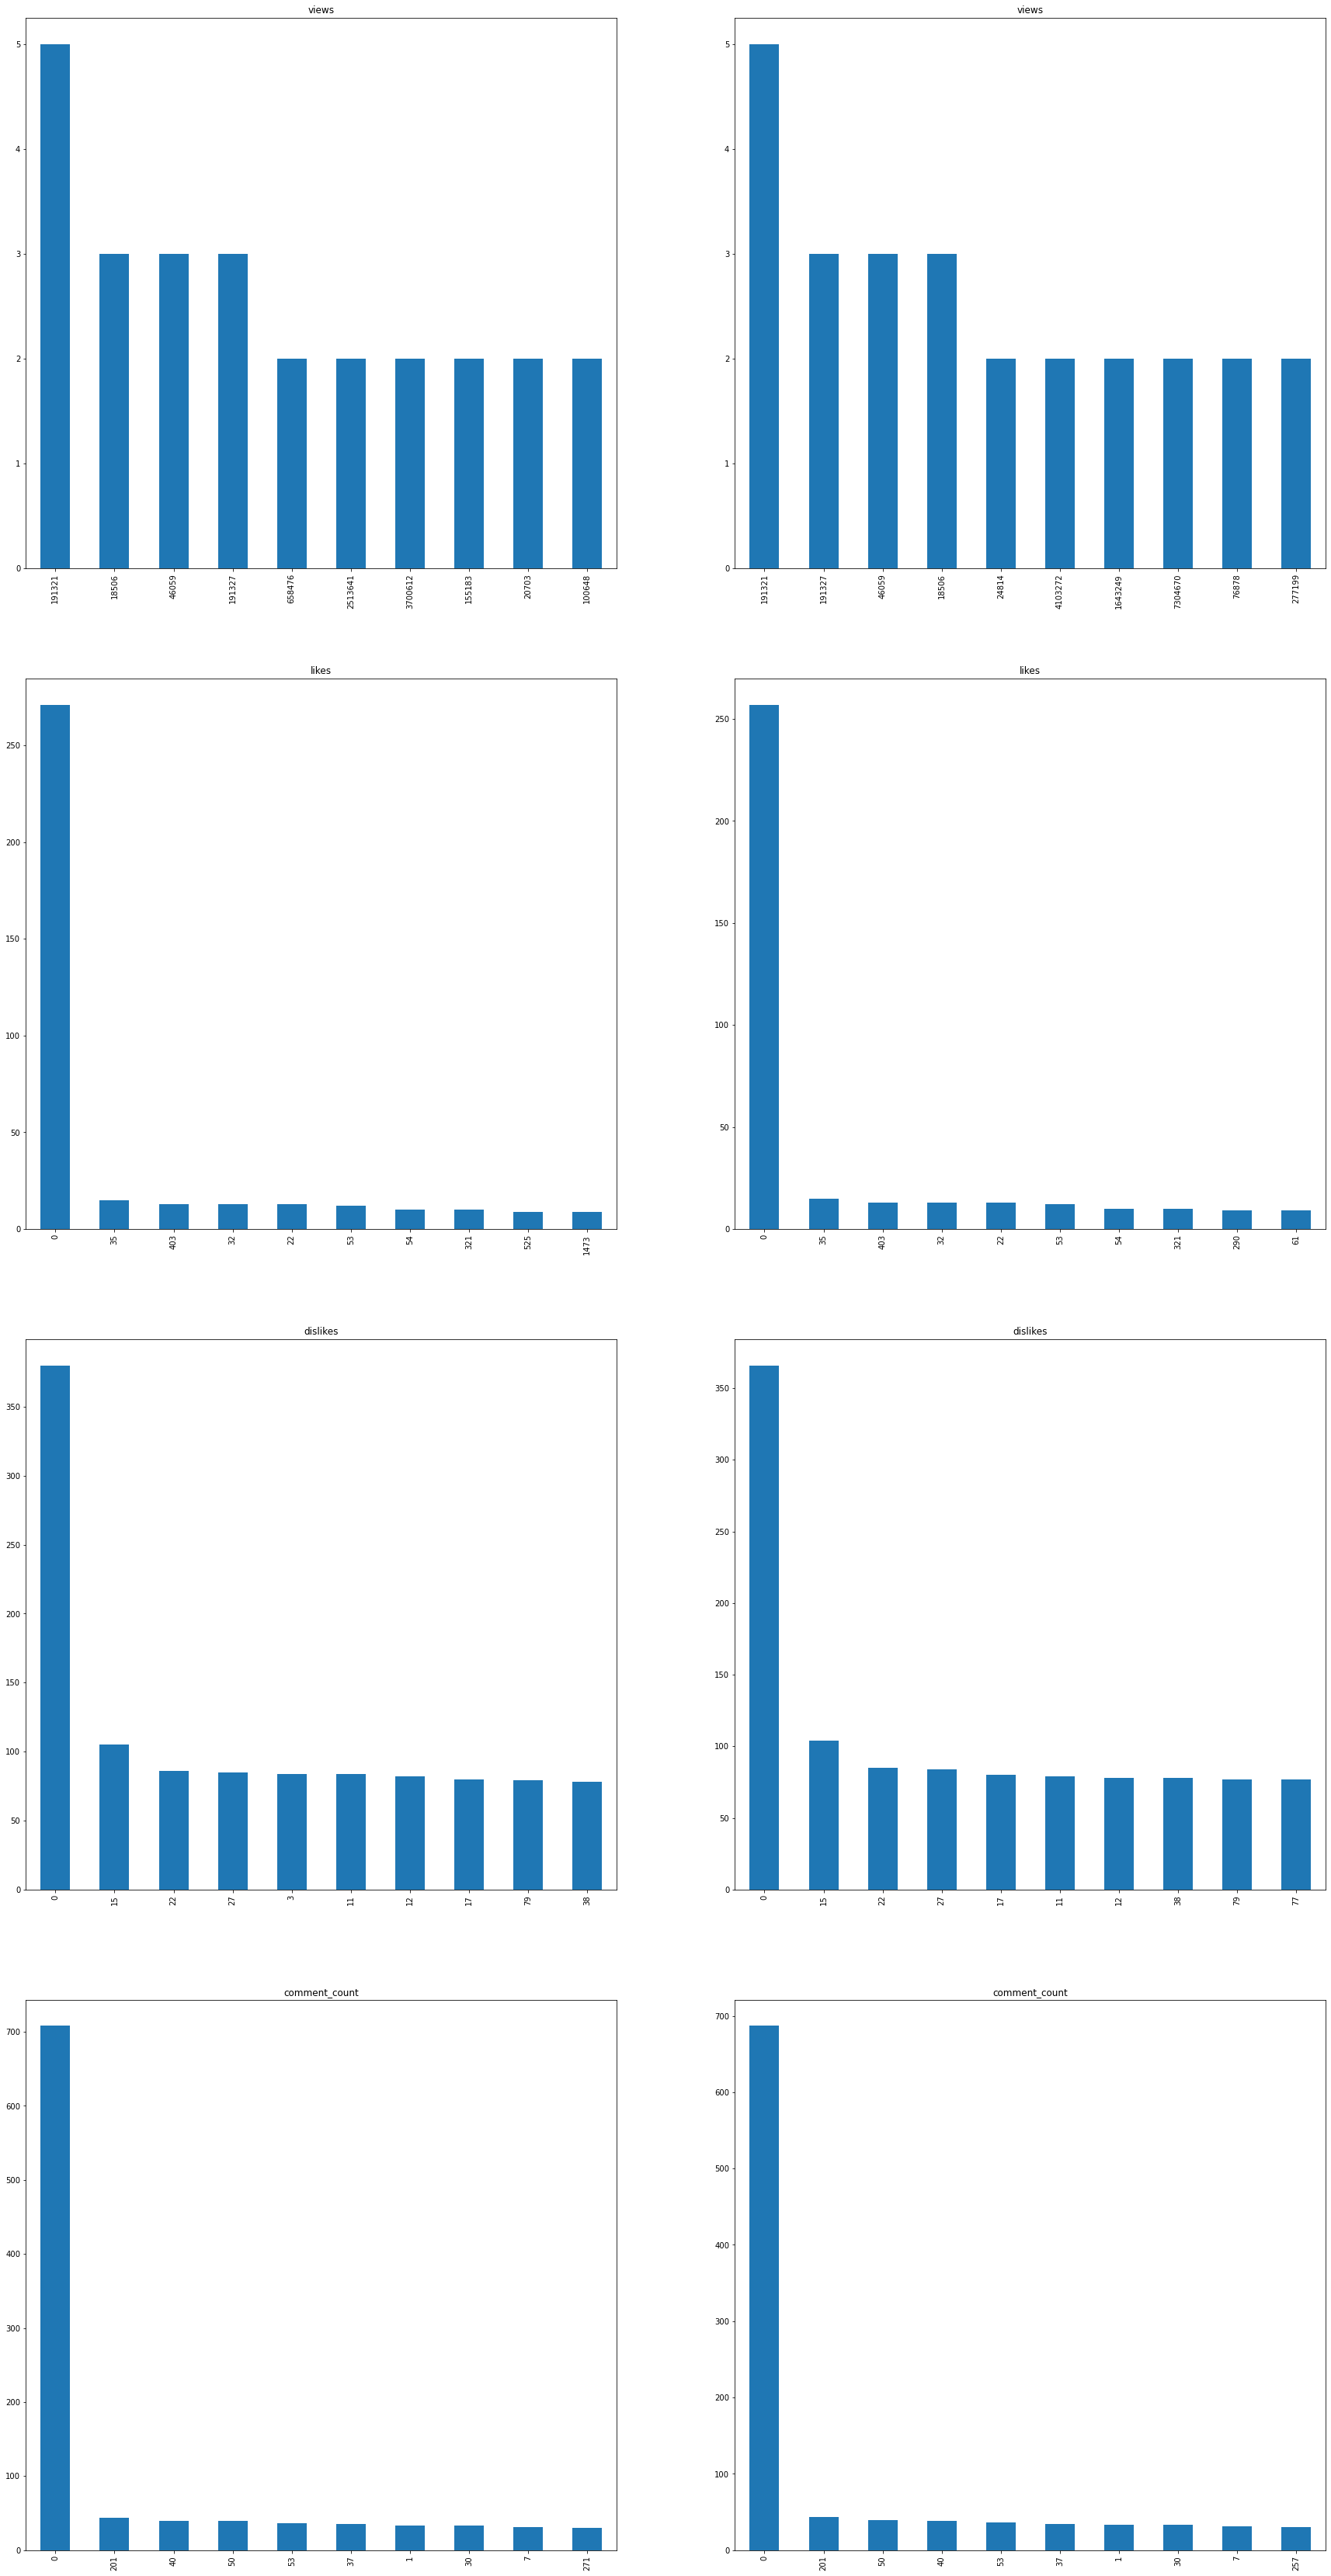

**********************************************************************************************************************************
在INvideos数据集中:


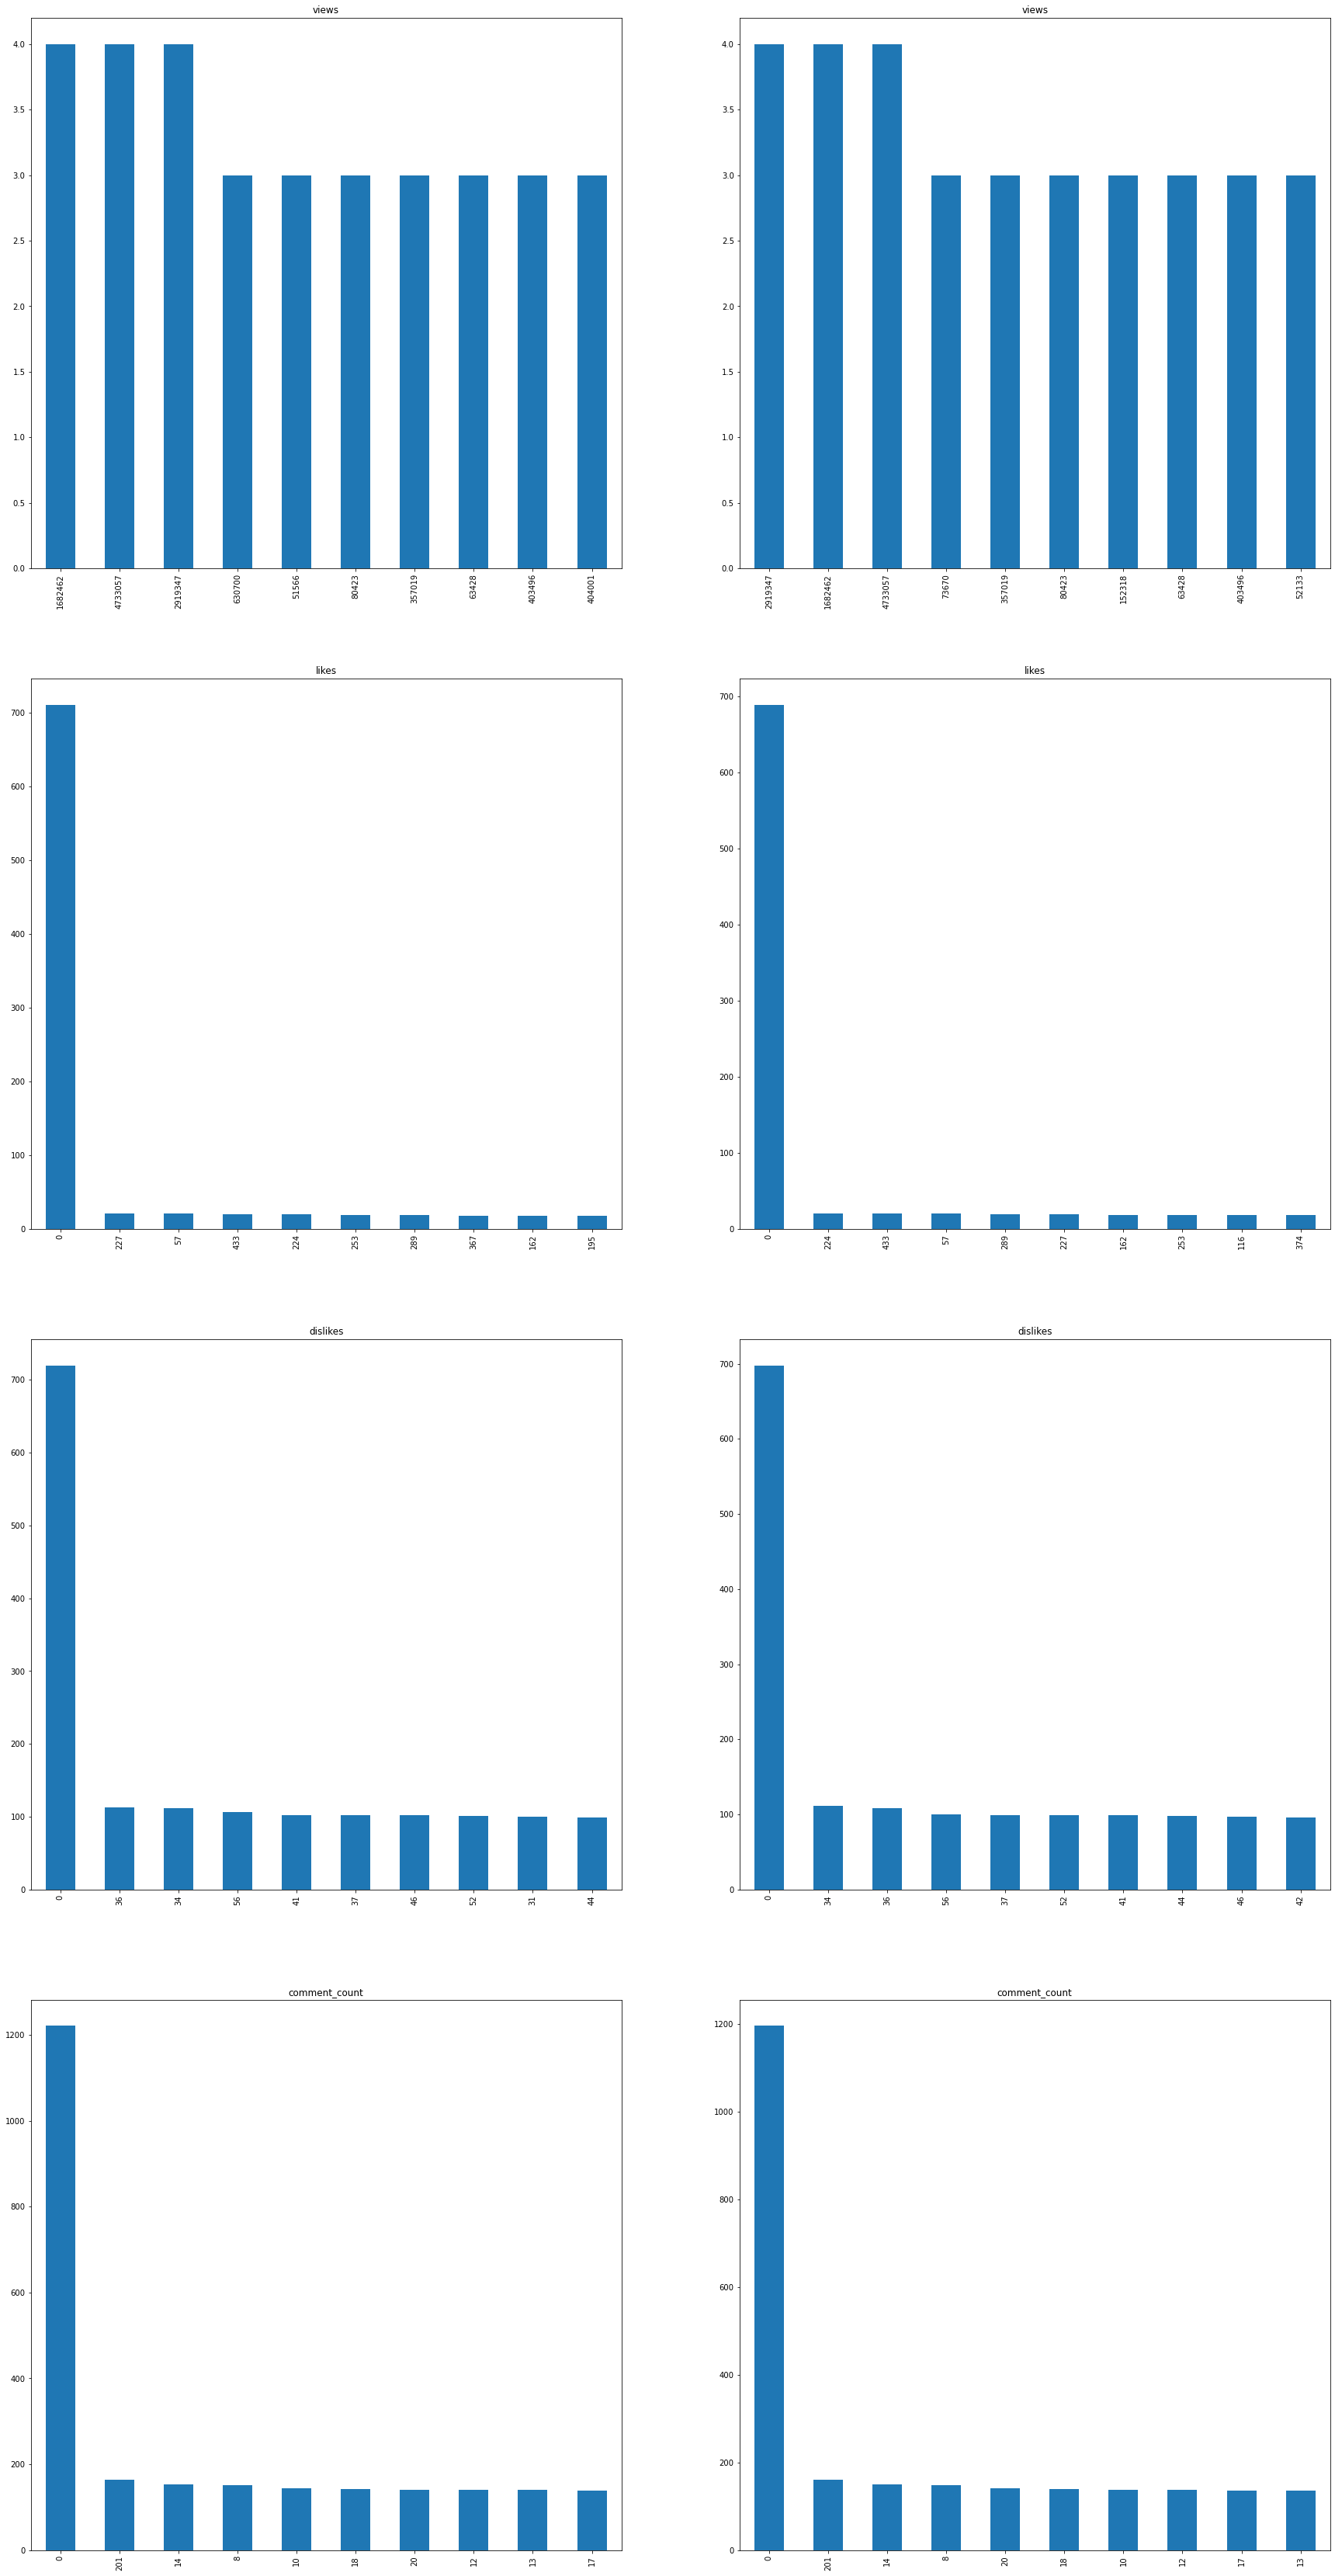

**********************************************************************************************************************************
在USvideos数据集中:


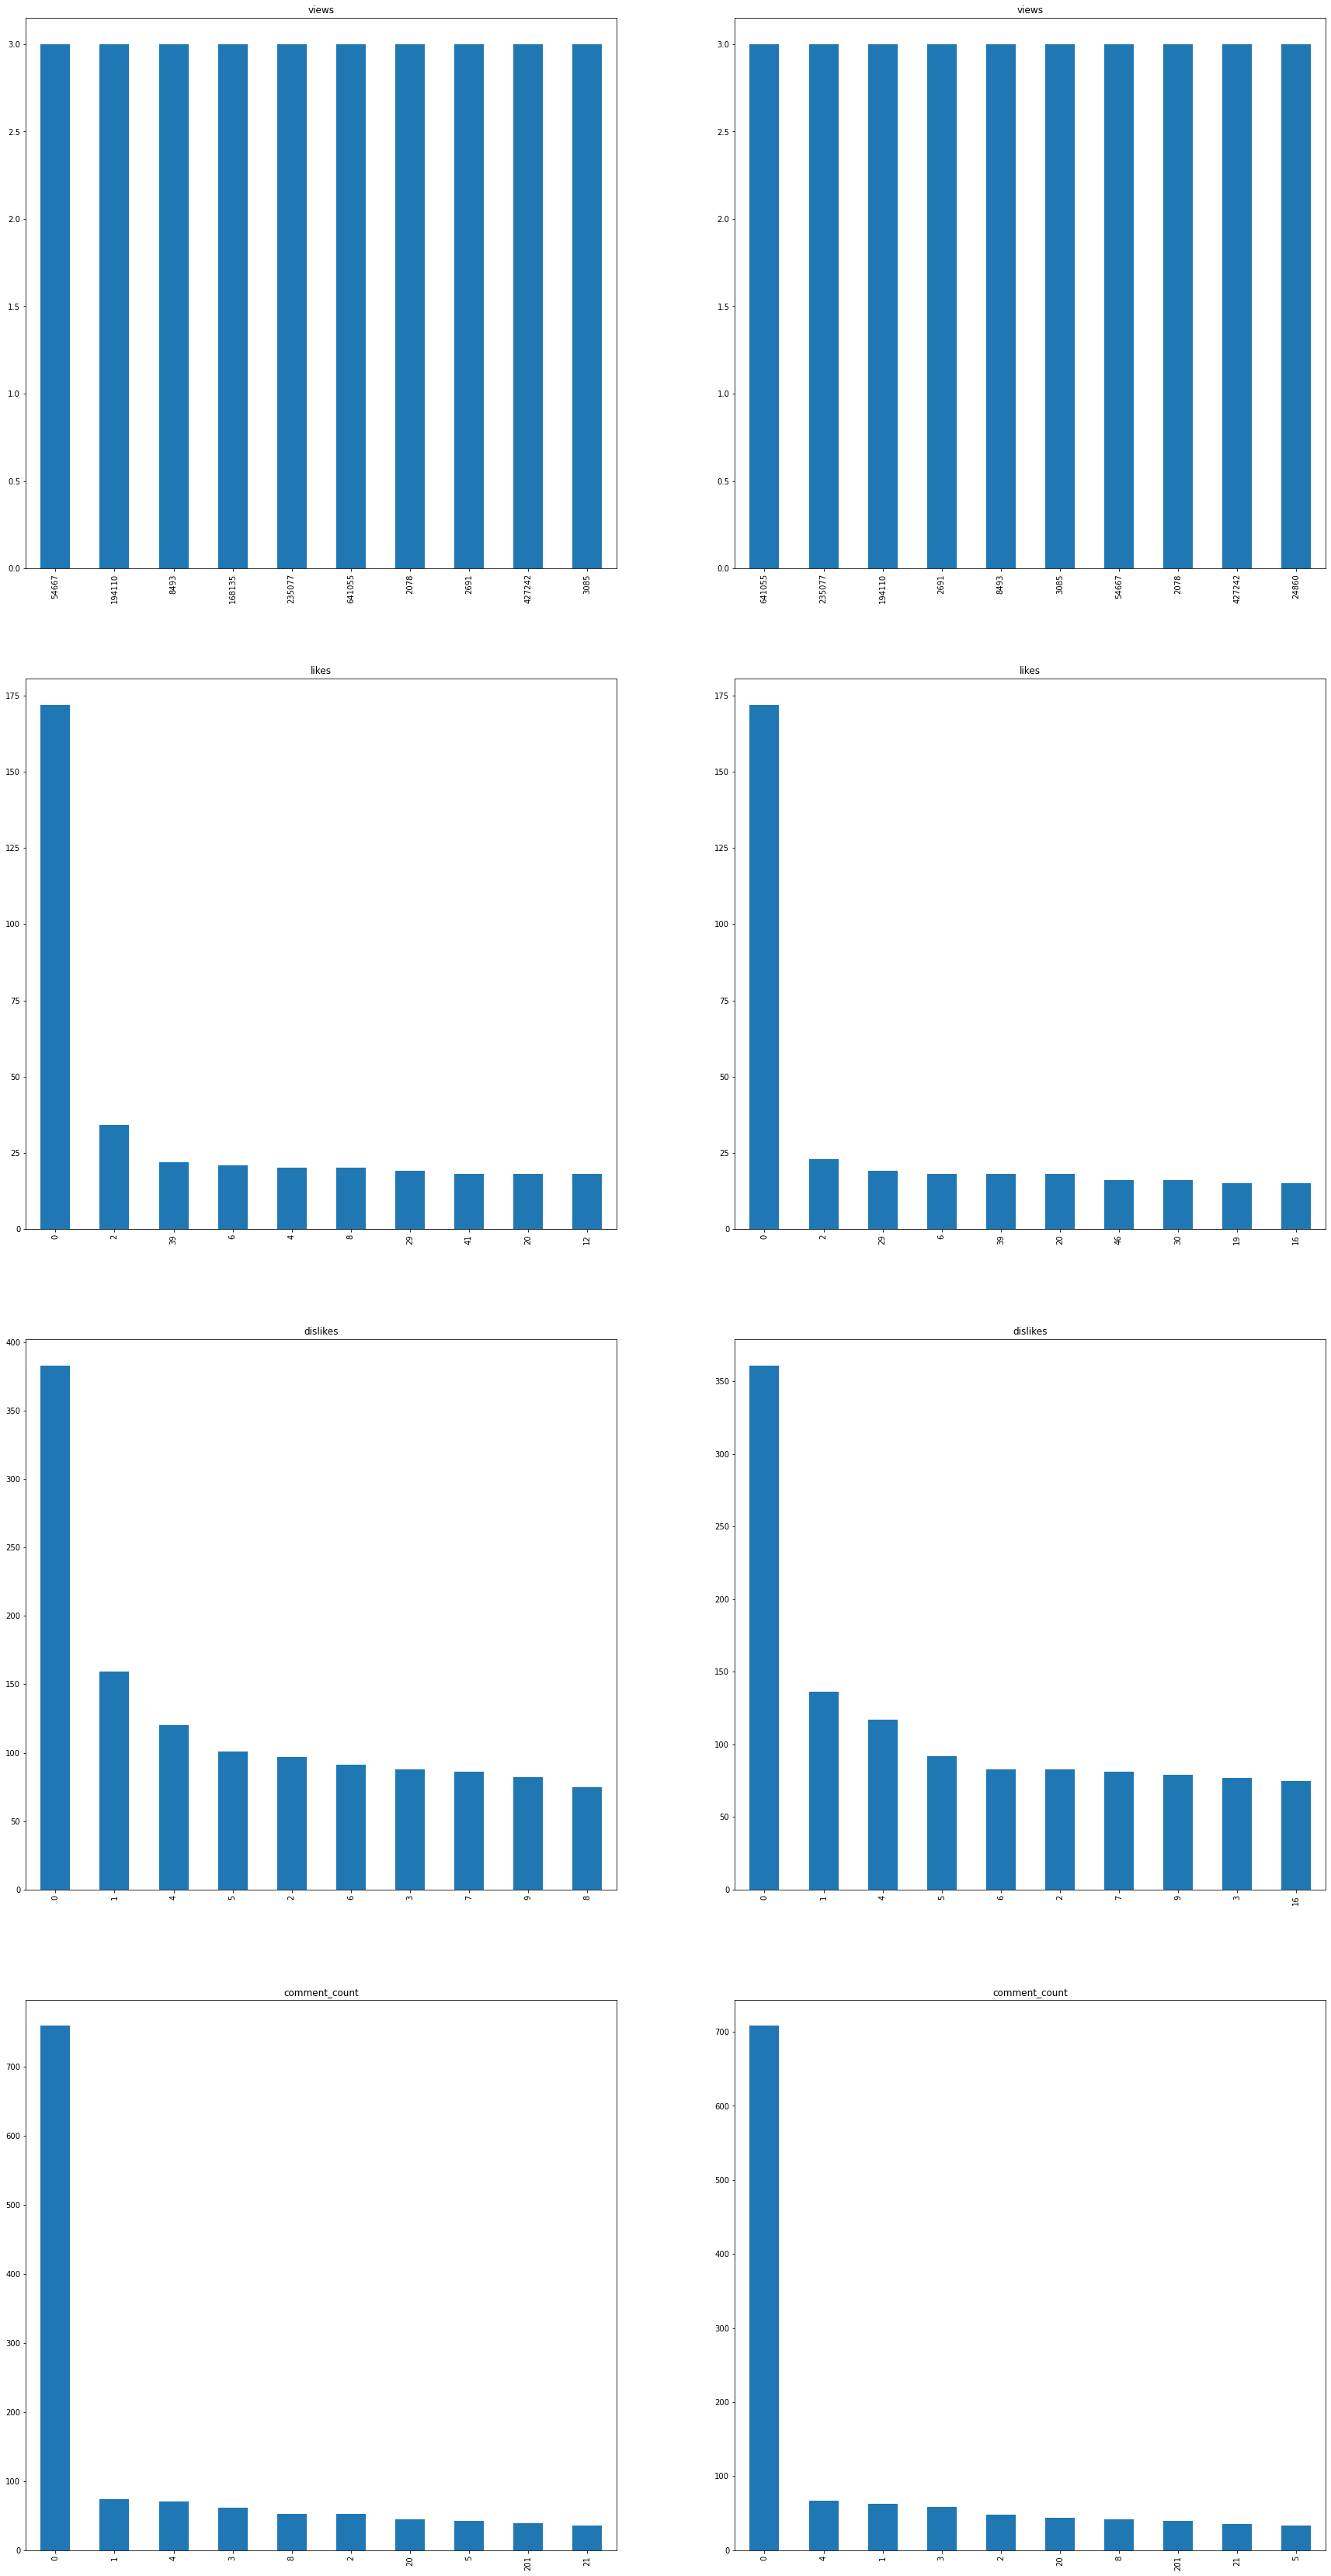

**********************************************************************************************************************************


In [17]:
for i in range(file_num):
    video_data_1 = video_dict[name_list[i]].dropna(axis=0,how='any')
    print(f"在{name_list[i]}数据集中:")
    compareNominalData(video_dict[name_list[i]], video_data_1, numeric_columns, figsize=(30, 60))
    plt.show()
    print('*' * 130)

### 利用title字段填充缺失的description字段

In [18]:
for i in range(file_num):
    video_data_2 = copy.deepcopy(video_dict[name_list[i]])
    video_data_2["description"].fillna(video_data_2["title"], inplace=True)
    print(f'{name_list[i]}的数据缺失情况为:')
    print(video_data_2.isnull().sum())
    for column in video_data_2.columns:
        idx = video_data_2[column].isnull()
        if idx.any():
            print('-' * 60, column, '-' * 60)
            display(video_data_2.head(2))
    print('*' * 130)

CAvideos的数据缺失情况为:
video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64
**********************************************************************************************************************************
DEvideos的数据缺失情况为:
video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_